## Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [74]:
# Reading the dataset
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### So, there are 10000 records in the dataset and 18 columns out of which some are continuous numerical and some are categorical.

The description of the above dataset can be described as follows:

- **RowNumber :** corresponds to the record (row) number and has no effect on the output.
- **CustomerId :** contains random values and has no effect on customer leaving the bank.
- **Surname :** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore :** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography :** a customer’s location can affect their decision to leave the bank.
- **Gender :** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age :** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure :** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance :** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts :** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard :** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember :** active customers are less likely to leave the bank.
- **EstimatedSalary :** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited :** whether or not the customer left the bank.
- **Complain :** customer has complaint or not.
- **Satisfaction Score :** Score provided by the customer for their complaint resolution.
- **Card Type :** type of card hold by the customer.
- **Points Earned :** the points earned by the customer for using credit card.


In [76]:
# Checking for duplicate values
data.duplicated().sum()

0

In [77]:
# Checking for null values
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**There's nothing much with data cleaning as the duplicate values and null values are not present in the dataset.**

In [78]:
# Checking for no. of unique values in each column
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [79]:
# Unique values in categorical columns
print('Geography          : ', data['Geography'].unique())
print('Gender             : ', data['Gender'].unique())
print('Tenure             : ', data['Tenure'].unique())
print('No. of Products    : ', data['NumOfProducts'].unique())
print('Has Credit Card?   : ', data['HasCrCard'].unique())
print('Is Active Member?  : ', data['IsActiveMember'].unique())
print('Is Exited?         : ', data['Exited'].unique())
print('Complain           : ', data['Complain'].unique())
print('Satisfaction Score : ', data['Satisfaction Score'].unique())
print('Card Type          : ', data['Card Type'].unique())

Geography          :  ['France' 'Spain' 'Germany']
Gender             :  ['Female' 'Male']
Tenure             :  [ 2  1  8  7  4  6  3 10  5  9  0]
No. of Products    :  [1 3 2 4]
Has Credit Card?   :  [1 0]
Is Active Member?  :  [1 0]
Is Exited?         :  [1 0]
Complain           :  [1 0]
Satisfaction Score :  [2 3 5 4 1]
Card Type          :  ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [80]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

## Exploratory Data Analysis

In [81]:
plt.style.use('ggplot')
# Figure settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.facecolor'] = 'whitesmoke'
plt.rcParams['figure.dpi'] = 200

# Font settings
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times New Roman'

# Set the color cycle for multiple lines in the same plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Grid settings
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = '#d0d0d0'

# Axis label settings
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'black'

# Title settings
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'navy'

# Legend settings
plt.rcParams['legend.fontsize'] = 8

# Legend transparency
plt.rcParams['legend.framealpha'] = 0.8

# Tick label settings
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Border and background settings
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['axes.facecolor'] = '#f5f5f5'

# Layout adjustment
plt.tight_layout()

<Figure size 2400x1200 with 0 Axes>

**Plotting the correlation marix to check how the columns are related to each other.**

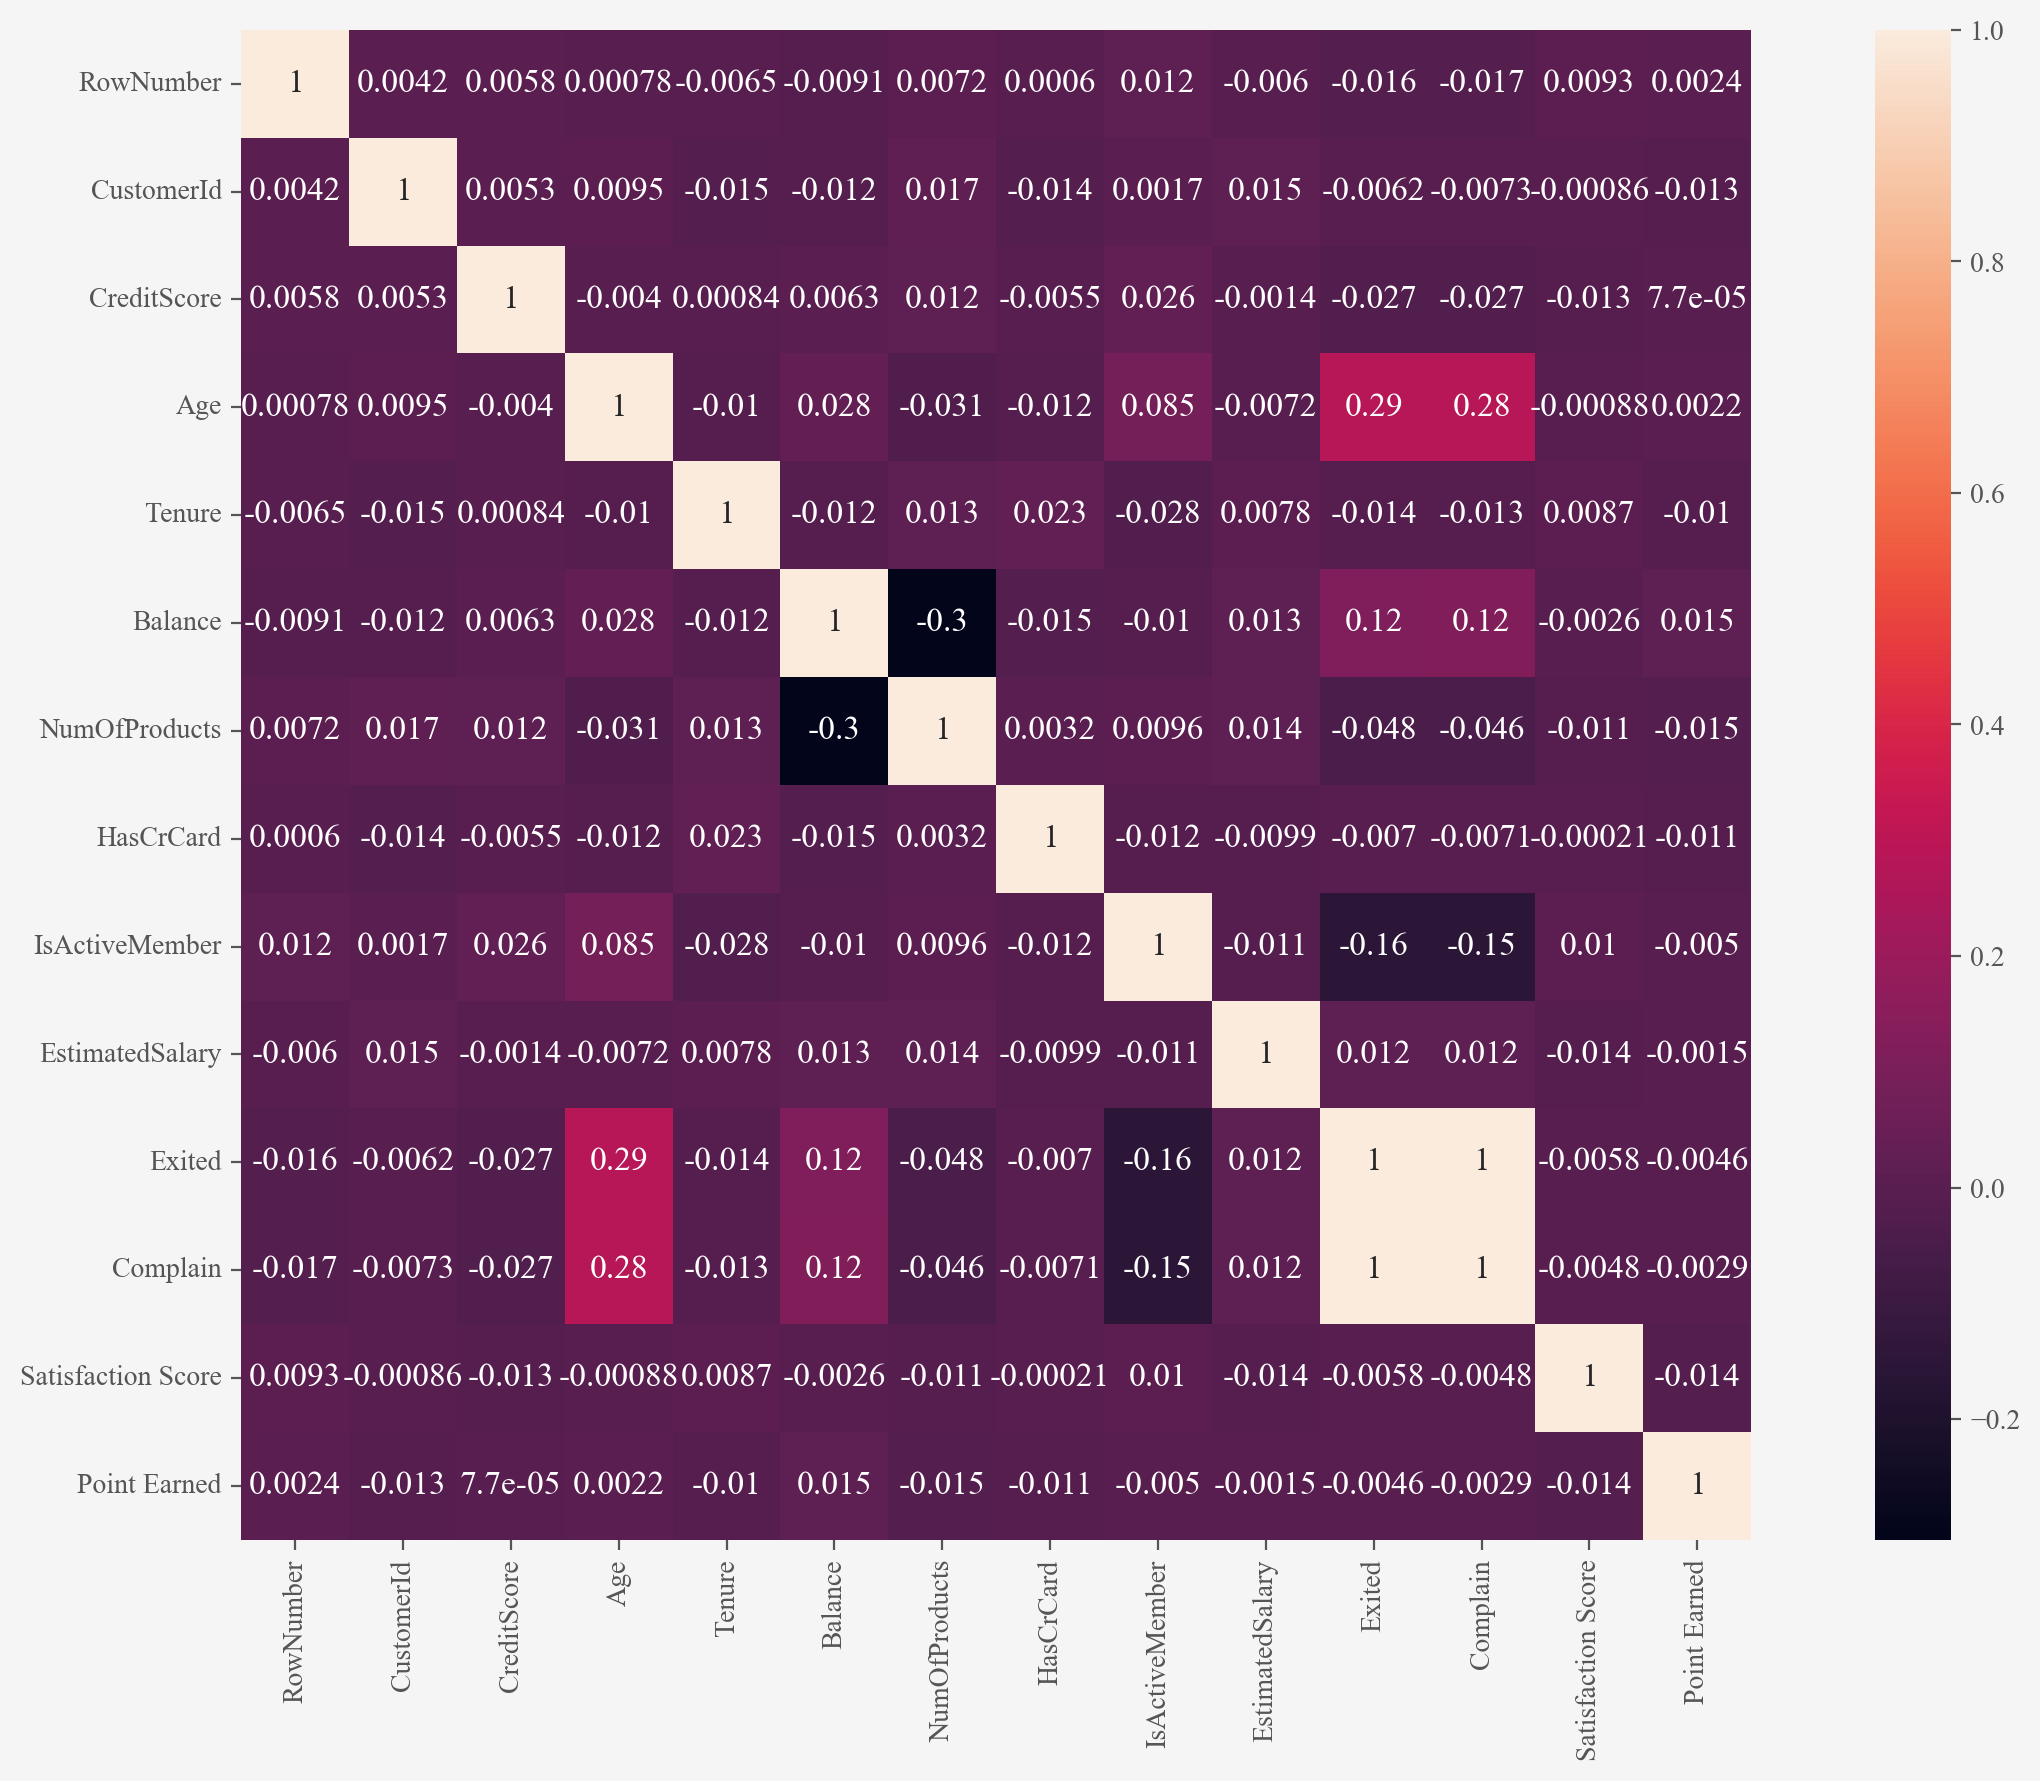

In [82]:
# Correlation Matrix
correlation_matrix = data.corr()

plt.figure(figsize = (16, 10), dpi = 200)
sns.heatmap(correlation_matrix, annot = True, square = True)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)

 Since our target column is **Exited** , let's see the data related with resect to that first.

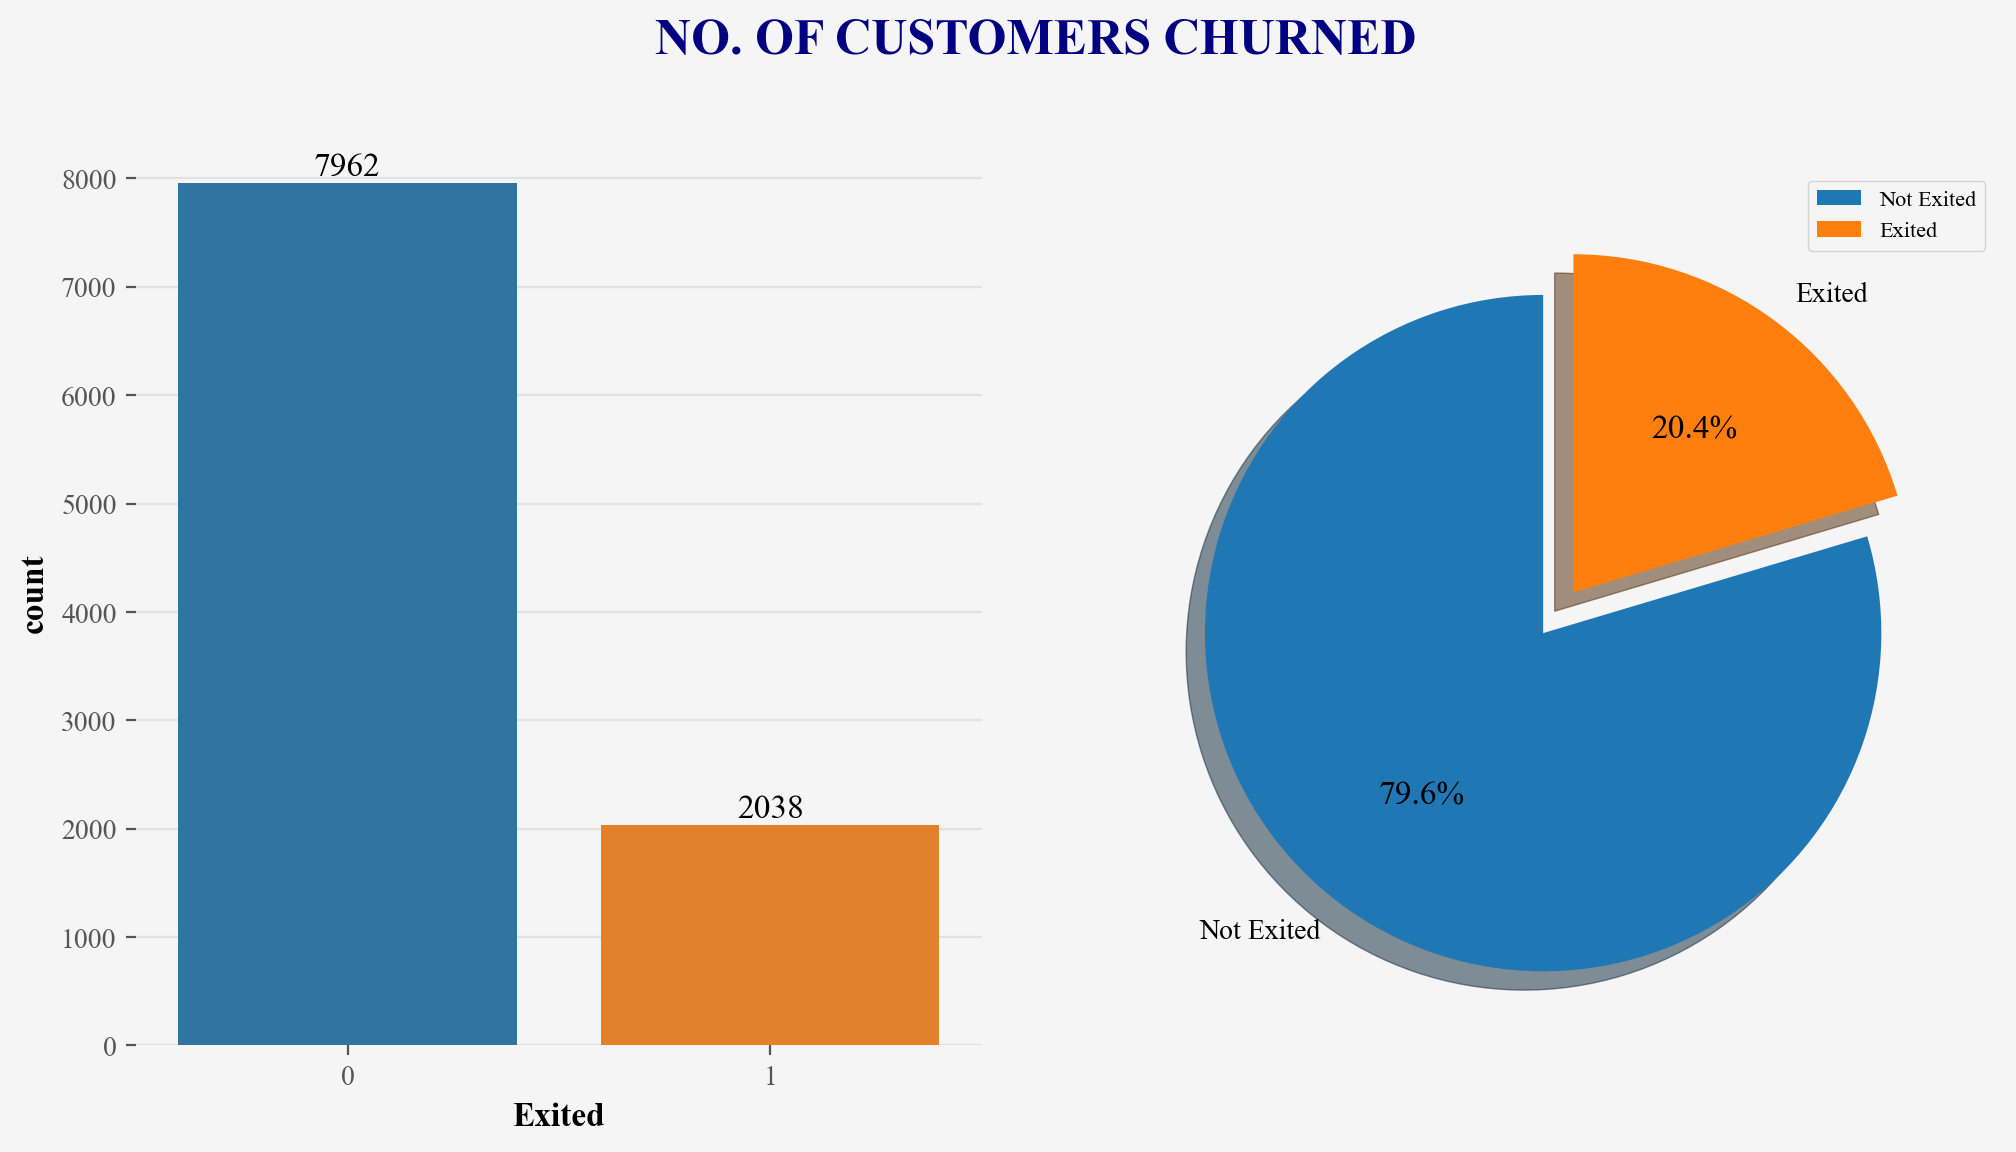

In [83]:
plt.suptitle('NO. OF CUSTOMERS CHURNED', fontsize = 18, color = 'navy', fontweight = 'bold')
plt.subplot(1,2,1)
ax = sns.countplot('Exited',  data = data)
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(1,2,2)
exited_data = data['Exited'].value_counts()
labels = ['Not Exited', 'Exited']
plt.pie(exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.legend()

plt.show()

- There are total 10000 customers out of which 2038 are churned.
- So, out of total customers, the **20% customers are churned** and 80% remain with the bank.


### Credit Score

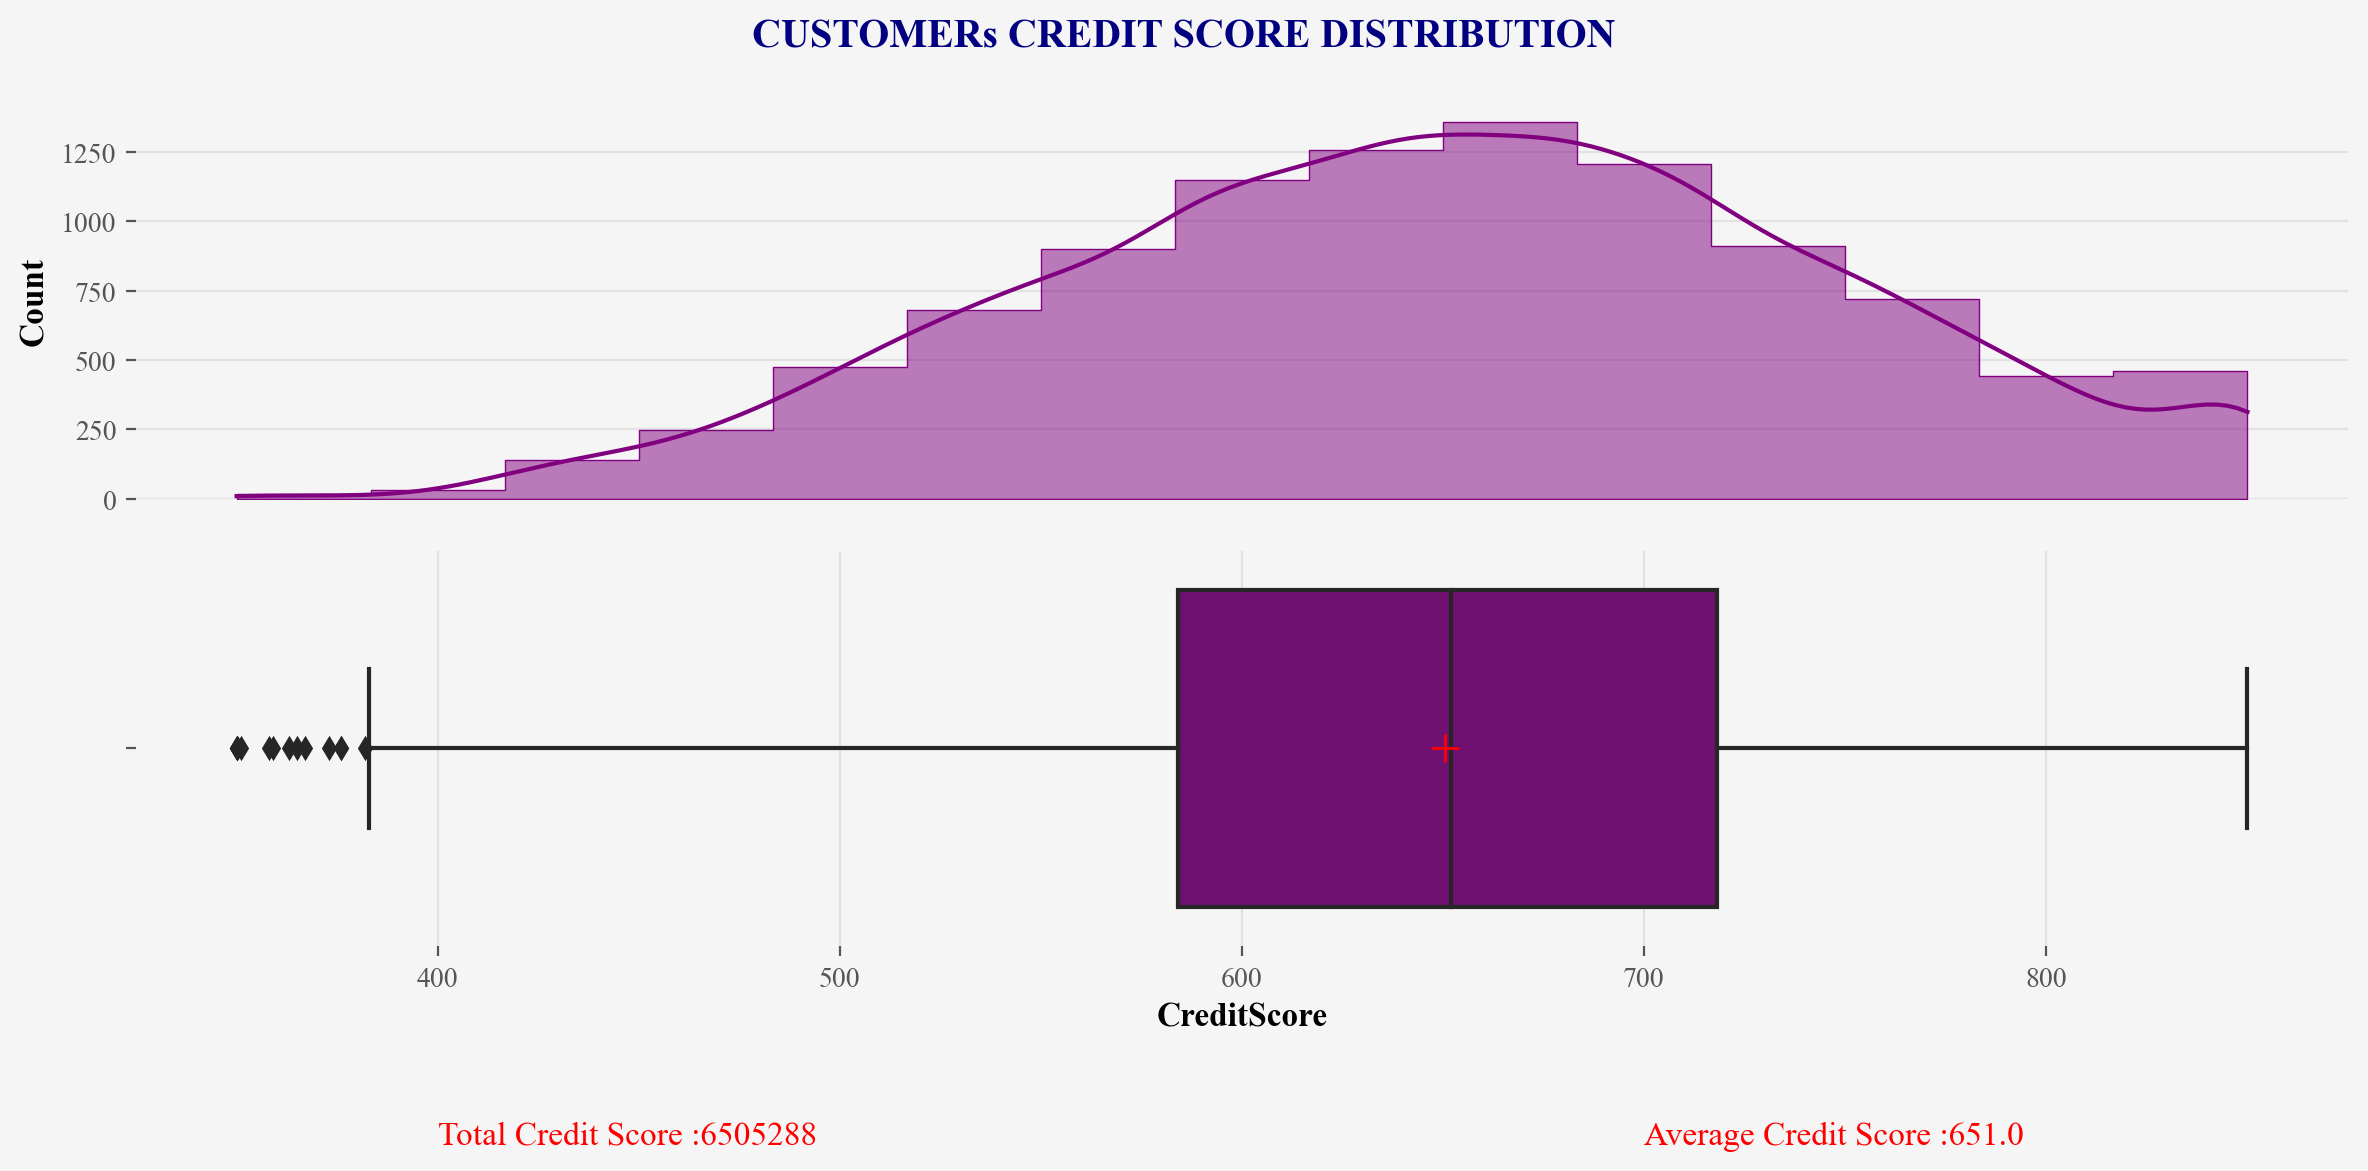

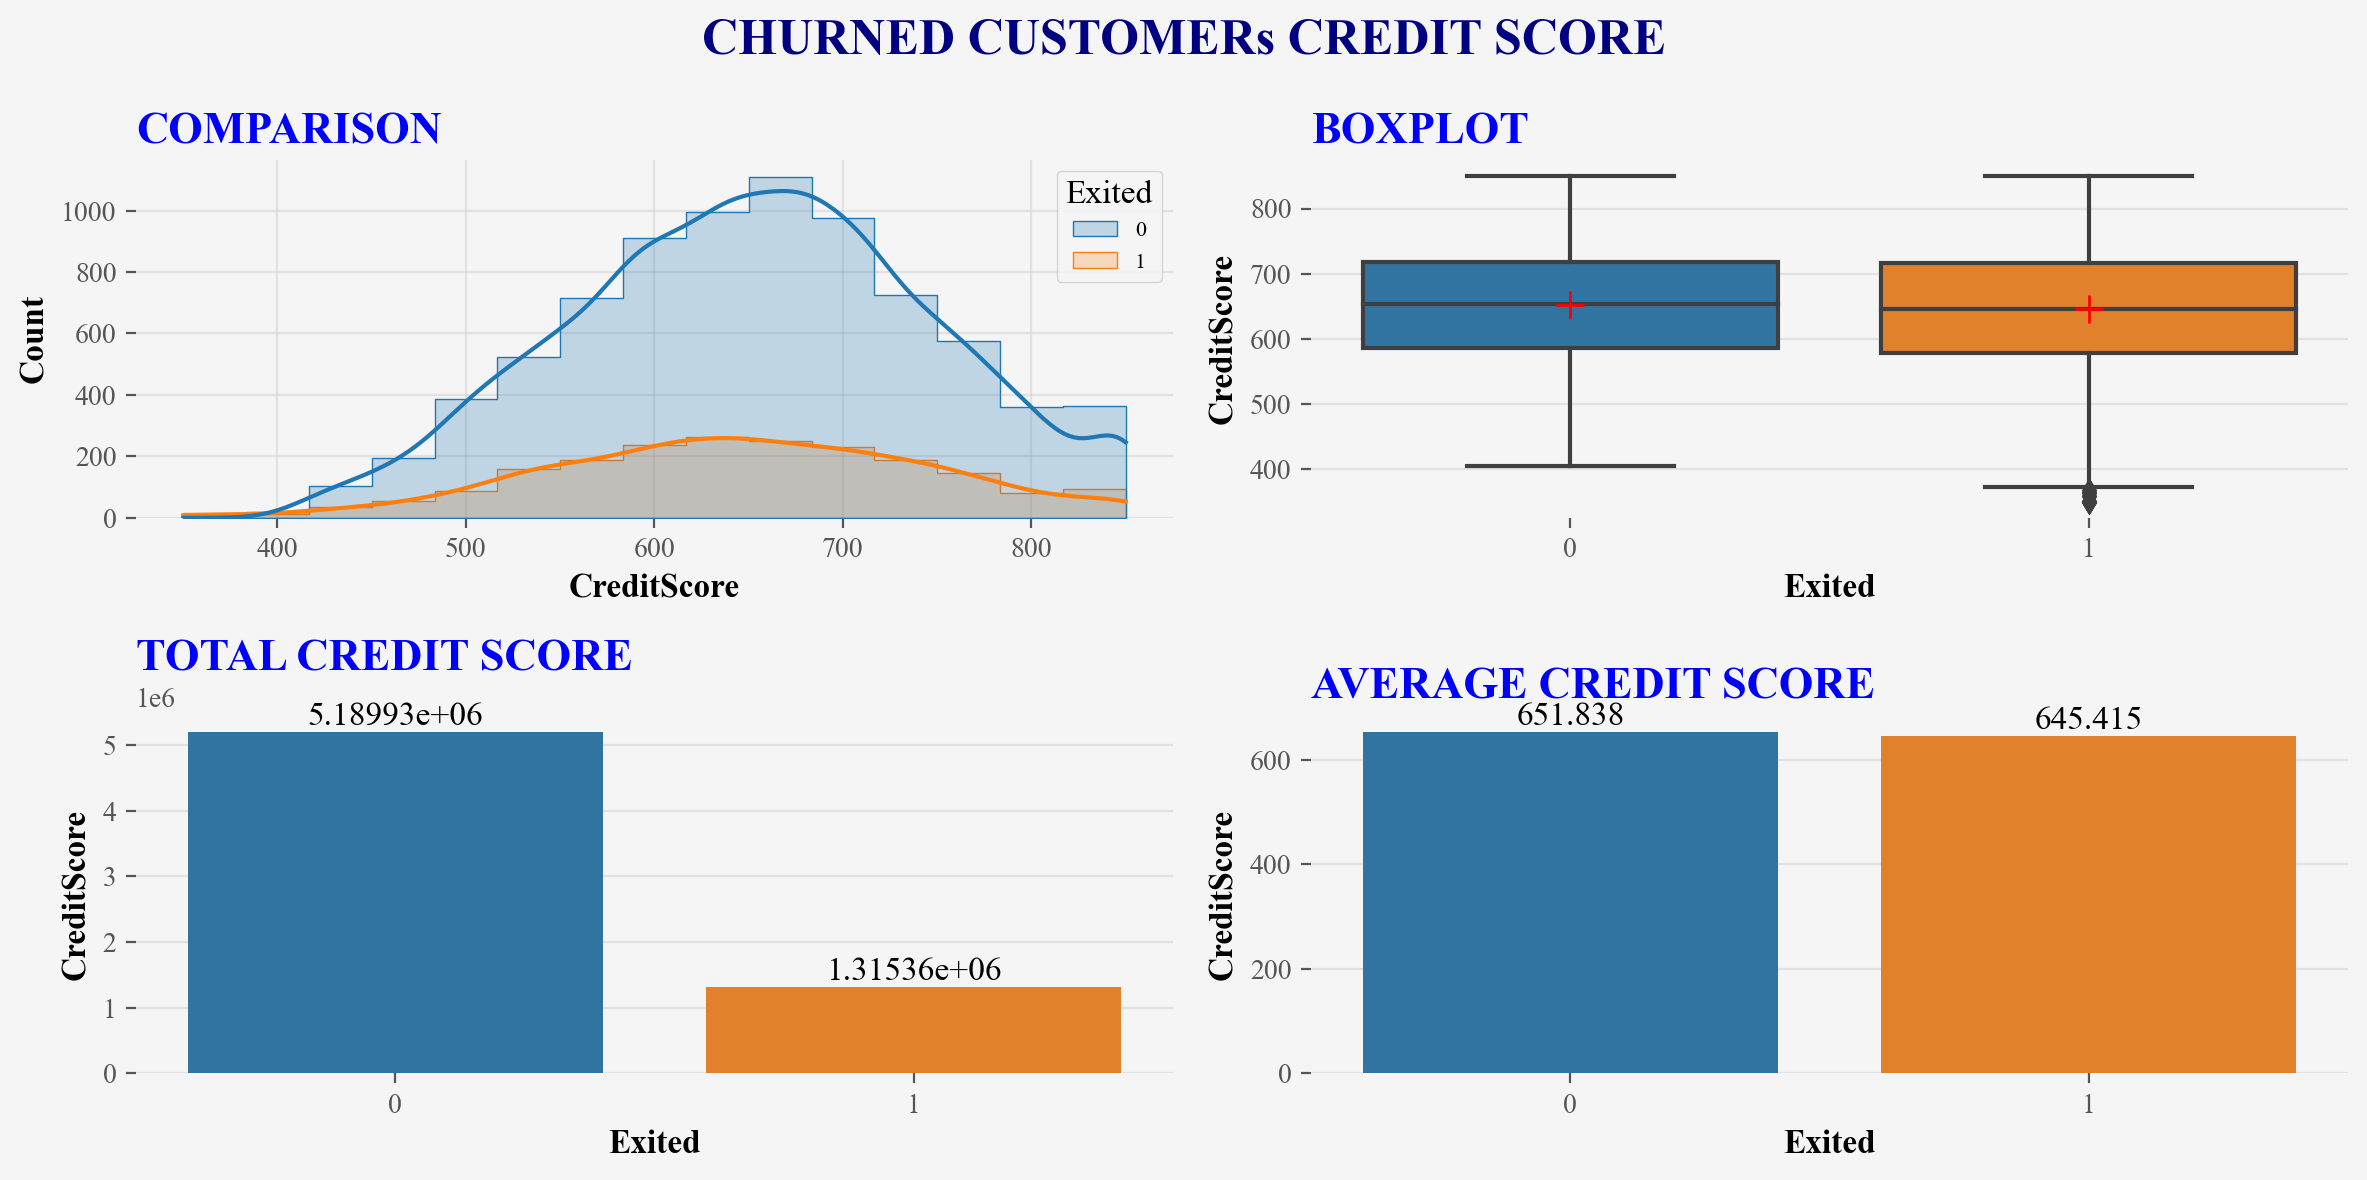

In [84]:
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CUSTOMERs CREDIT SCORE DISTRIBUTION', fontweight = 'bold', color = 'navy')

plt.subplot(2,1,1)
ax = sns.histplot(x = 'CreditScore', data = data, element = 'step', kde = True, color = 'purple', bins = 15)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel(None)
plt.xticks([])

plt.subplot(2,1,2)
avg_crscore = data['CreditScore'].mean().round()
total_crscore = data['CreditScore'].sum().round()

sns.boxplot(x = 'CreditScore', data = data, showmeans = True,  color = 'purple',
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.text(400, 1, f'Total Credit Score :{total_crscore}', color = 'red', )
plt.text(700, 1, f'Average Credit Score :{avg_crscore}', color = 'red', )

plt.show()

#---------------------------------------------------------------------------------------------

plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CHURNED CUSTOMERs CREDIT SCORE', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(2,2,1)
ax = sns.histplot(x = 'CreditScore', data = data, hue = 'Exited', element = 'step', kde = True, bins = 15)
plt.title('COMPARISON', loc = 'left', color = 'blue')

plt.subplot(2,2,2)
sns.boxplot('Exited', 'CreditScore', data = data, showmeans = True, 
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.title('BOXPLOT', loc = 'left', color = 'blue')

plt.subplot(2,2,3)
ax = sns.barplot( 'Exited', 'CreditScore',data = data, ci = None, estimator = sum)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('TOTAL CREDIT SCORE', loc = 'left', color = 'blue')
    
plt.subplot(2,2,4)
ax = sns.barplot( 'Exited', 'CreditScore',data = data, ci = None)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('AVERAGE CREDIT SCORE', loc = 'left', color = 'blue')

plt.show()

- 

### Geography

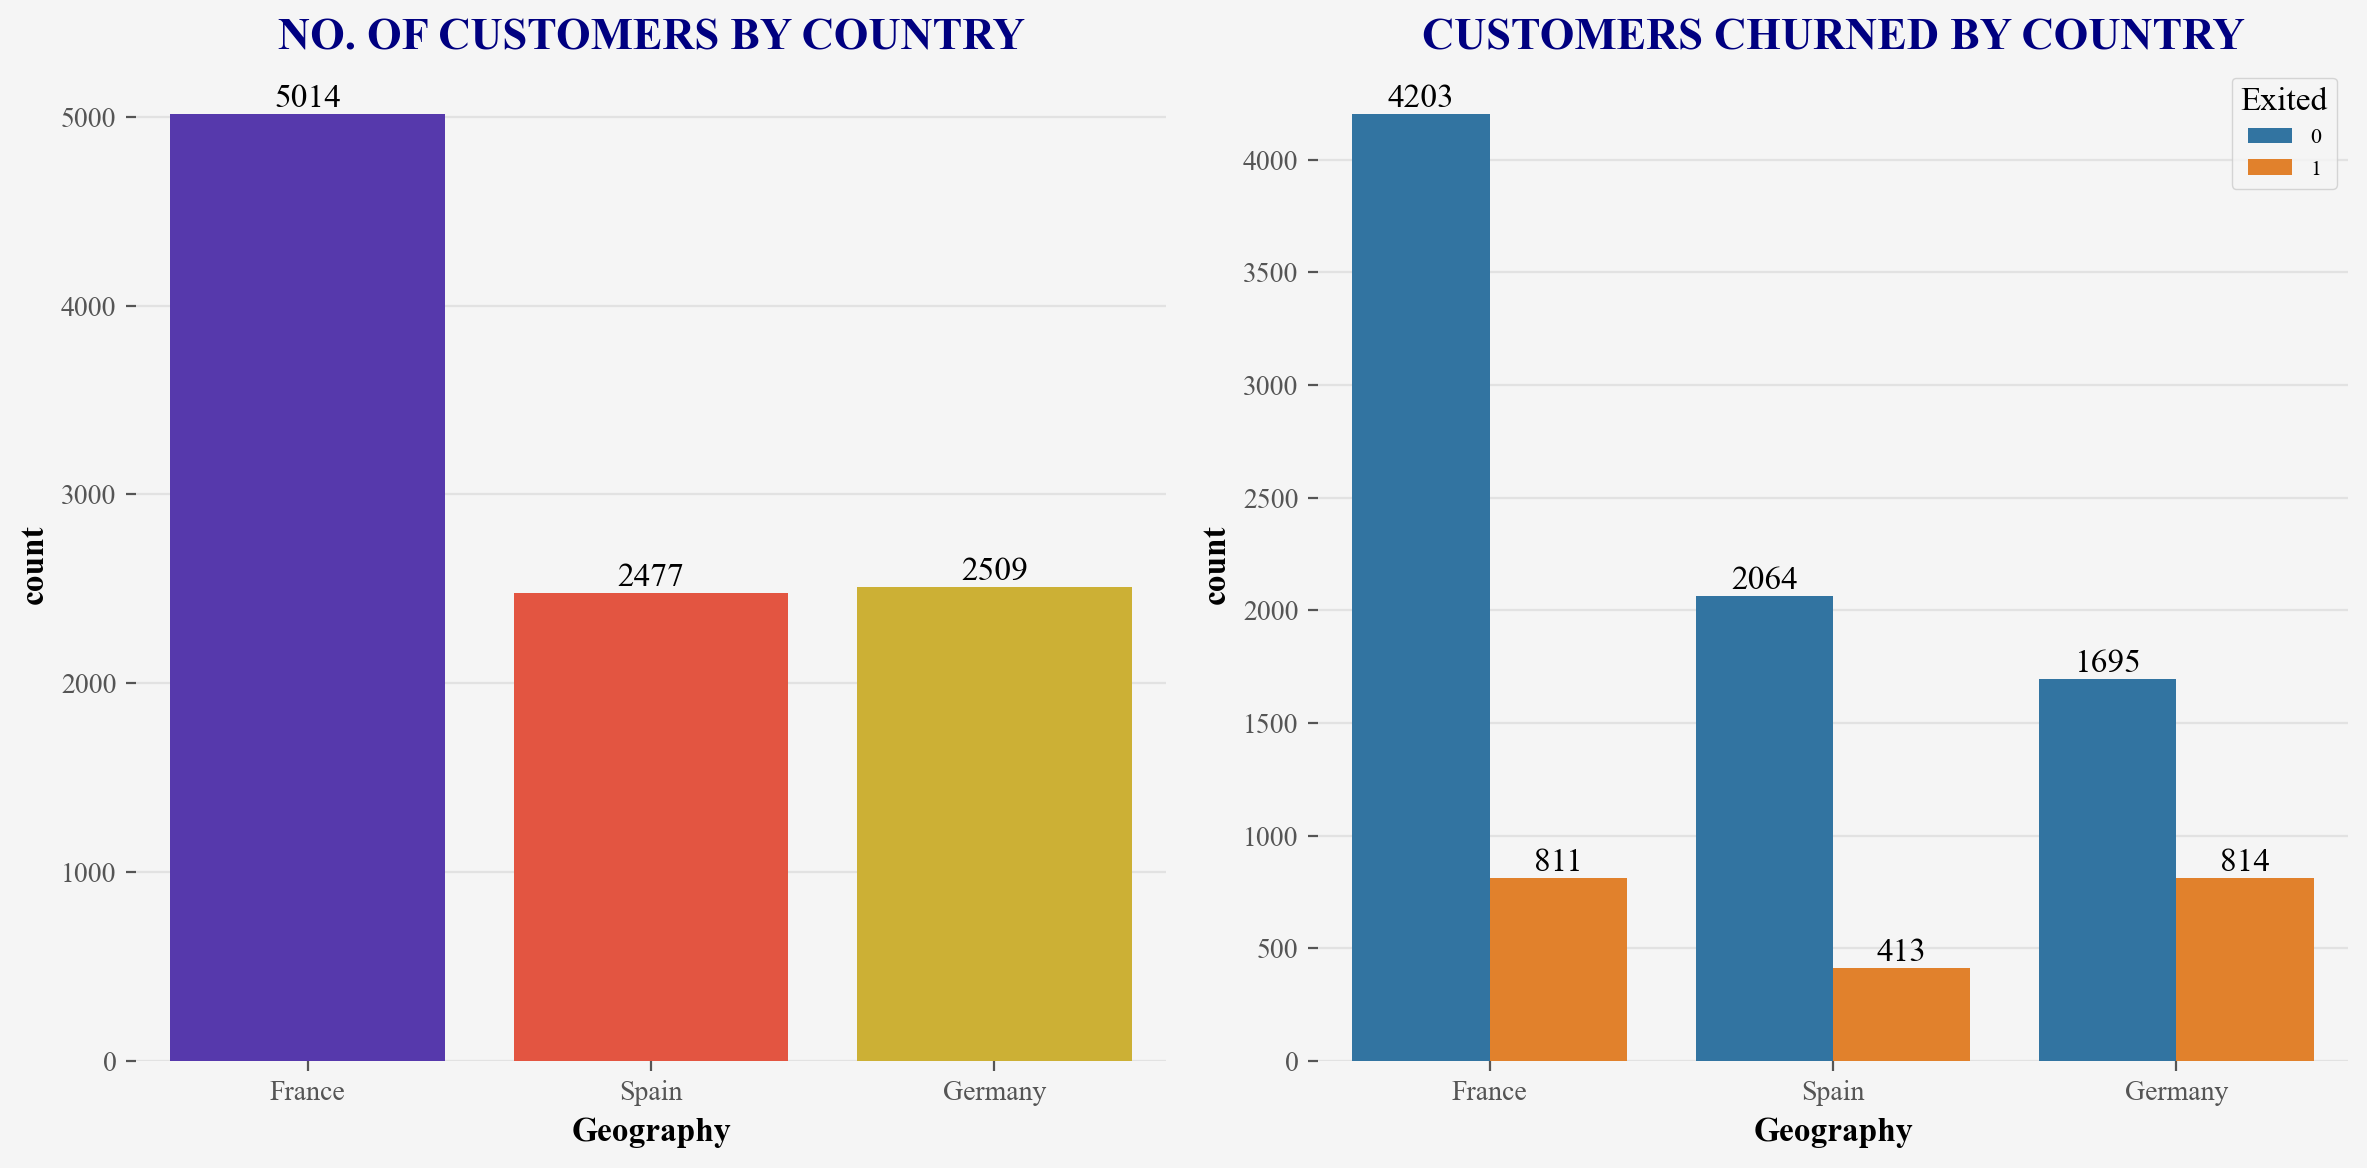

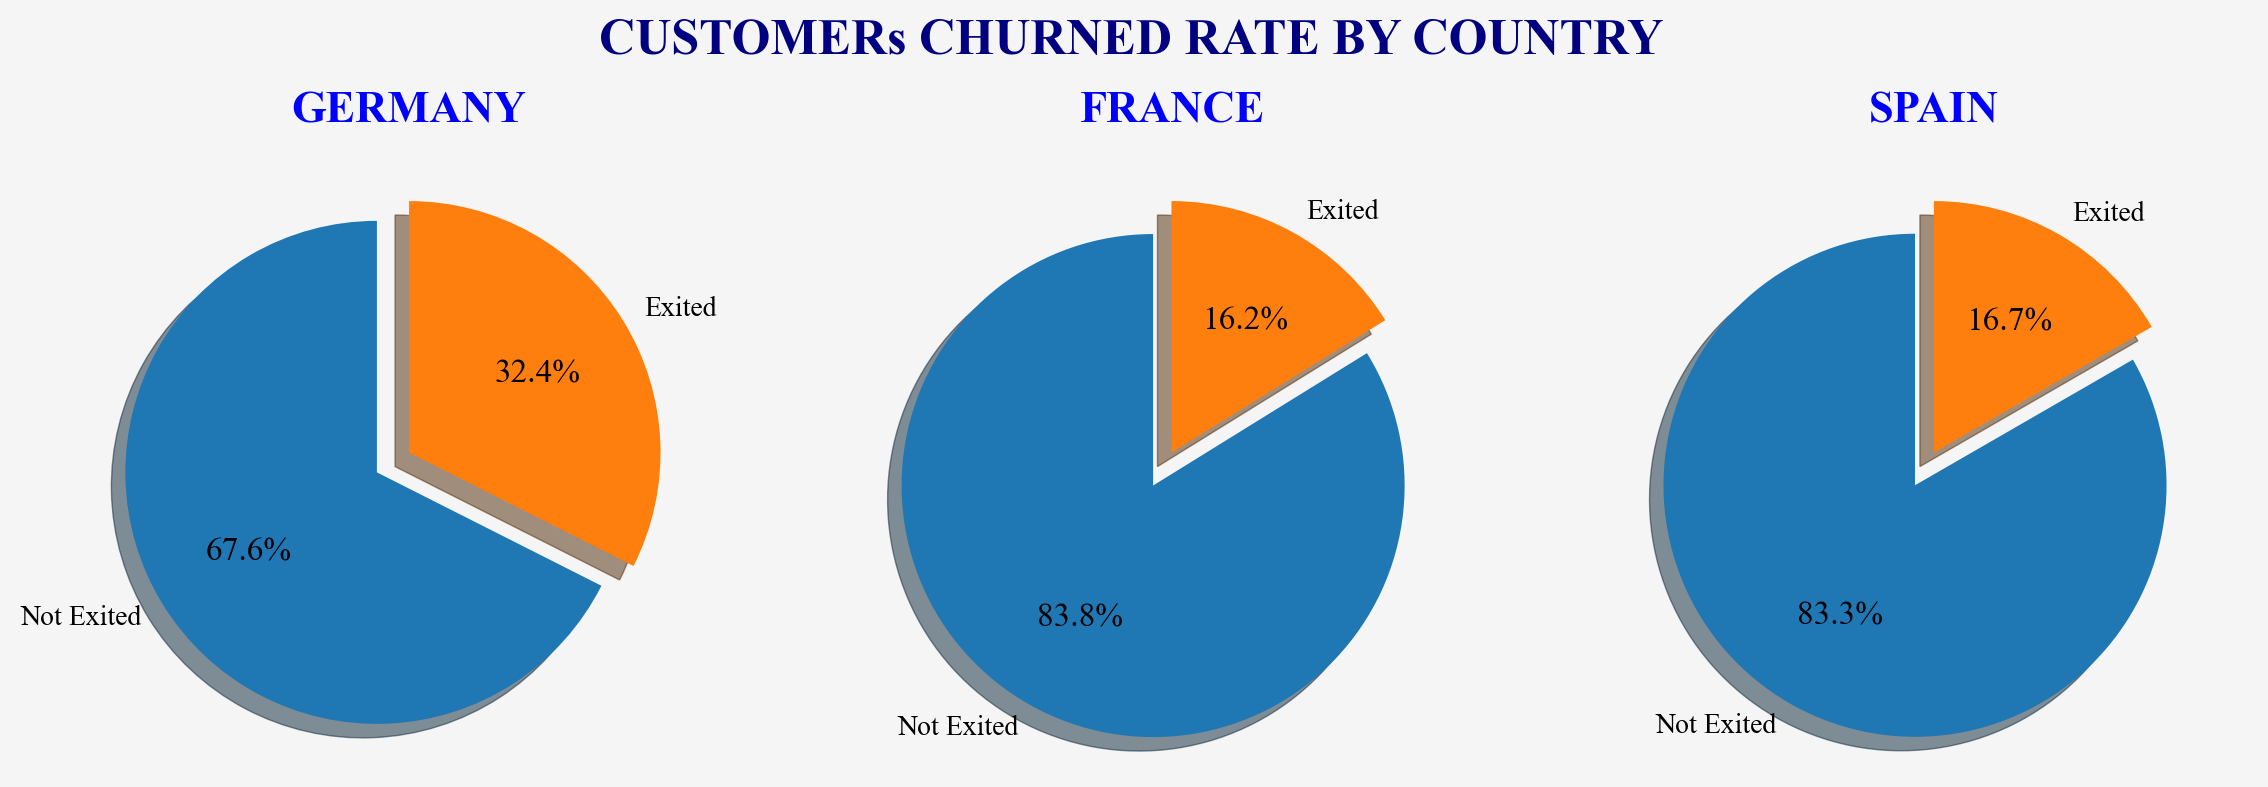

In [85]:
plt.figure(figsize = (12,6), layout = 'tight')

plt.subplot(1,2,1)
ax1 = sns.countplot('Geography', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF CUSTOMERS BY COUNTRY')

plt.subplot(1,2,2)
ax2 = sns.countplot('Geography', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)

plt.title('CUSTOMERS CHURNED BY COUNTRY')
plt.show()

# ------------------------------------------------------------------------------------------------------------------ 

plt.figure(figsize = (12,4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY COUNTRY', fontweight = 'bold', fontsize = 18, color = 'navy')

# Germany
plt.subplot(1,3,1)
germany_exited_data = data[data['Geography'] == 'Germany']['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(germany_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('GERMANY', color = 'blue')

# France
plt.subplot(1,3,2)
france_exited_data = data[data['Geography'] == 'France']['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(france_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('FRANCE', color = 'blue')

# Spain
plt.subplot(1,3,3)
spain_exited_data = data[data['Geography'] == 'Spain']['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(spain_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SPAIN', color = 'blue')
plt.show()


- Most no. of customers are from France while Spain and Germany have nearly equal customers.
- Spain has the least no. of customers exited which are almost half of the customers exited from France and Germany.
- Although Germany has less no. of customers, the churned rate is almost double of France and Spain.

### Gender

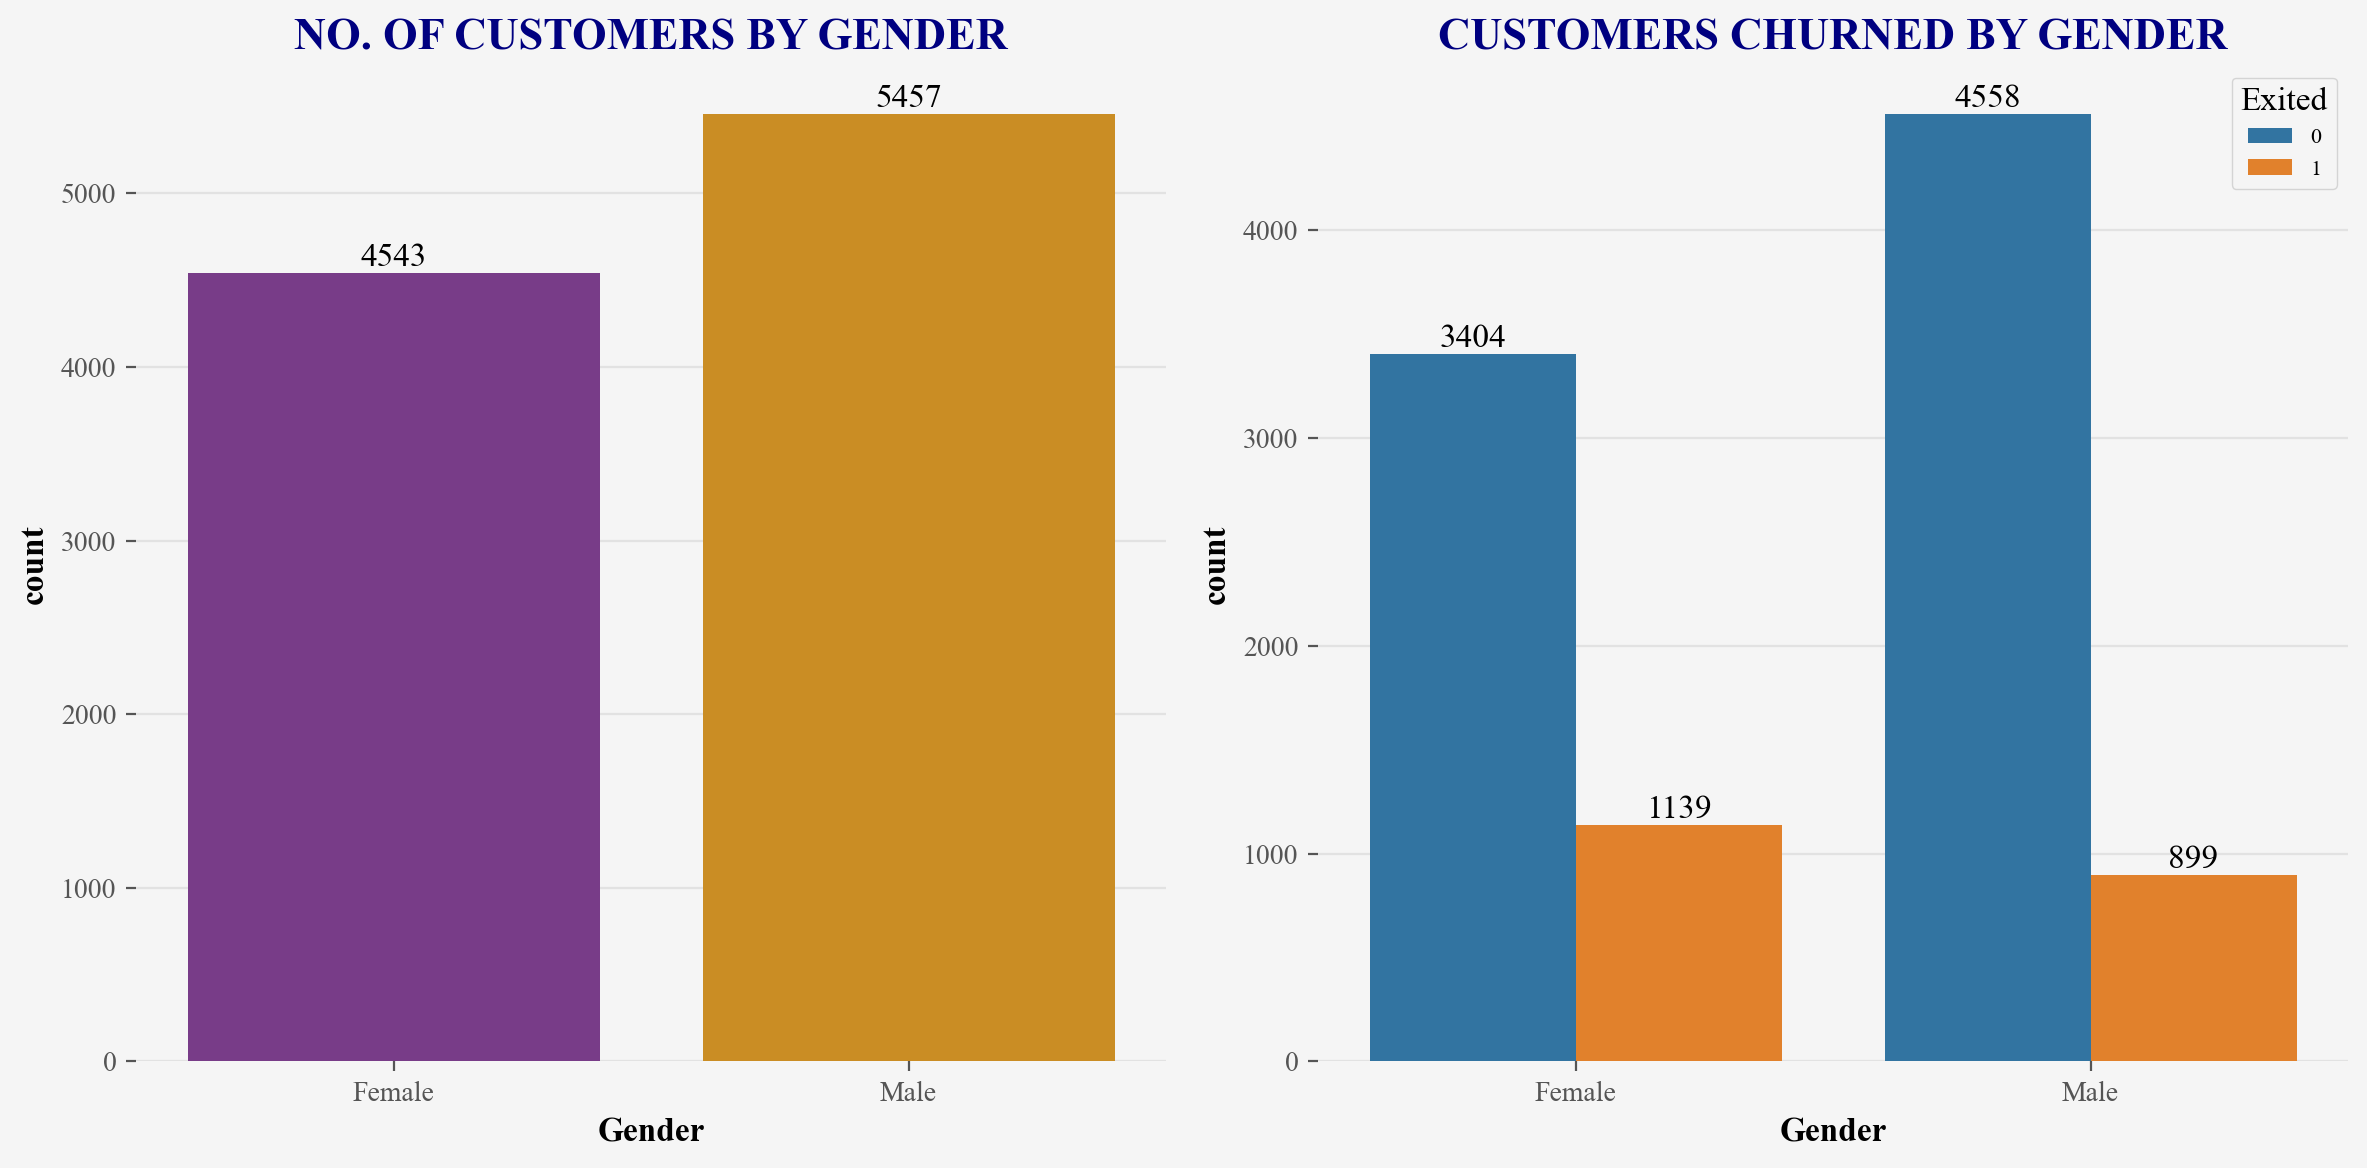

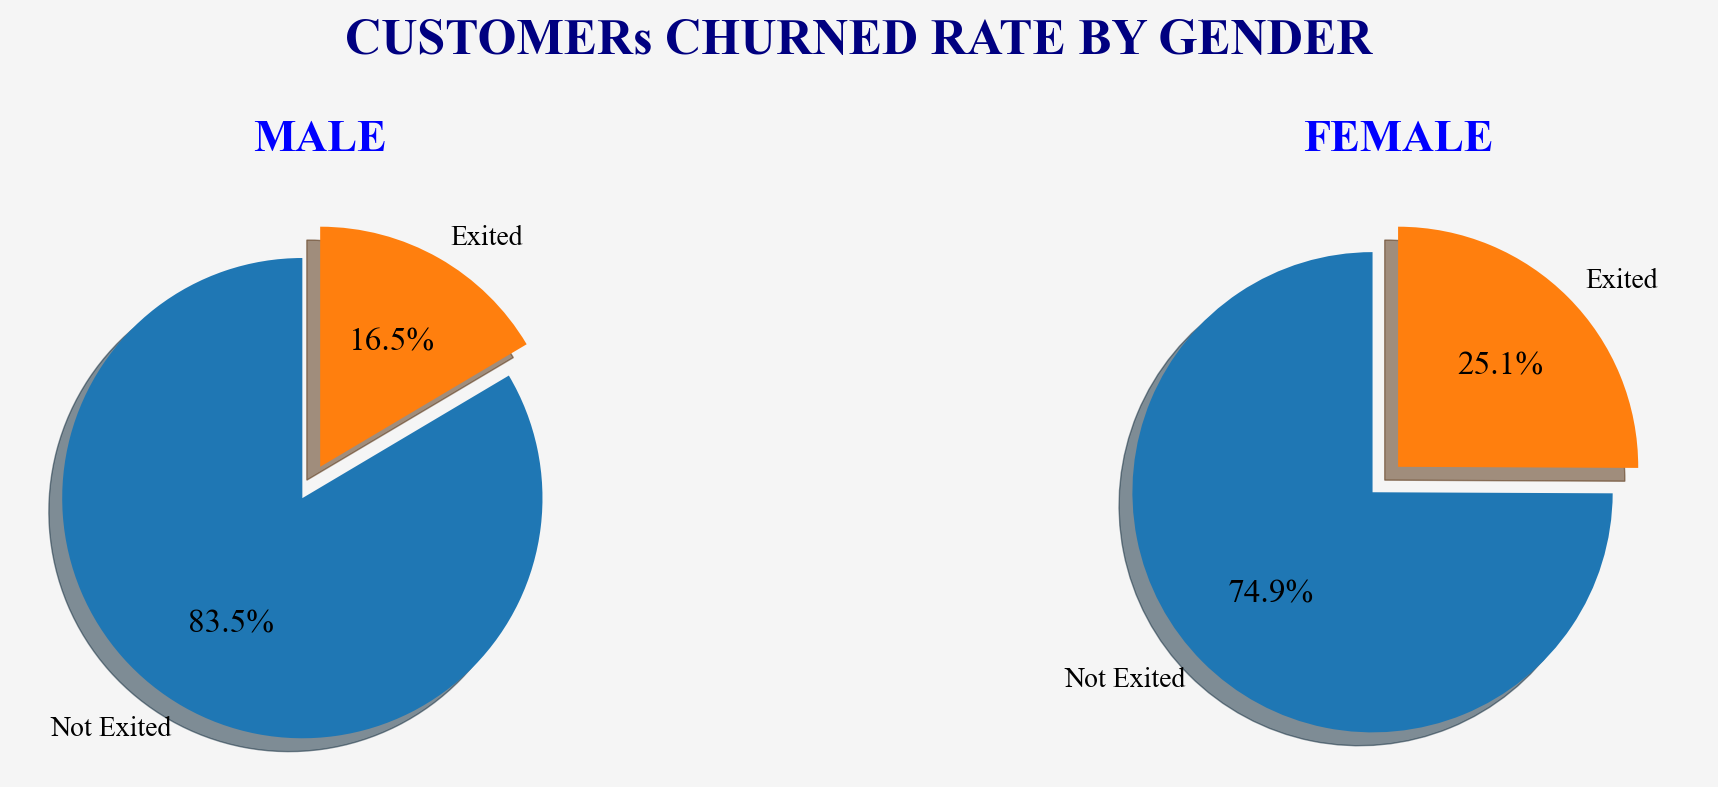

In [86]:
plt.figure(figsize = (12, 6), layout = 'tight')

plt.subplot(1,2,1)
ax1 = sns.countplot('Gender', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF CUSTOMERS BY GENDER')

plt.subplot(1,2,2)
ax2 = sns.countplot('Gender', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)

plt.title('CUSTOMERS CHURNED BY GENDER')
plt.show()

#---------------------------------------------------------------------------------------------------------------------------

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY GENDER', fontweight = 'bold', fontsize = 18, color = 'navy')

# Male
plt.subplot(1,2,1)
male_exited_data = data[data['Gender'] == 'Male']['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(male_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('MALE', color = 'blue')

# Female
plt.subplot(1,2,2)
female_exited_data = data[data['Gender'] == 'Female']['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(female_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('FEMALE', color = 'blue')
plt.show()

- There are more Male customers than Females.
- Even though having more no. of male customers, the female customers have left the bank more oftenly.
- Almost one quarter (25%) female customers have churned, whereas the churning rate for male customers is 17%.

### Age

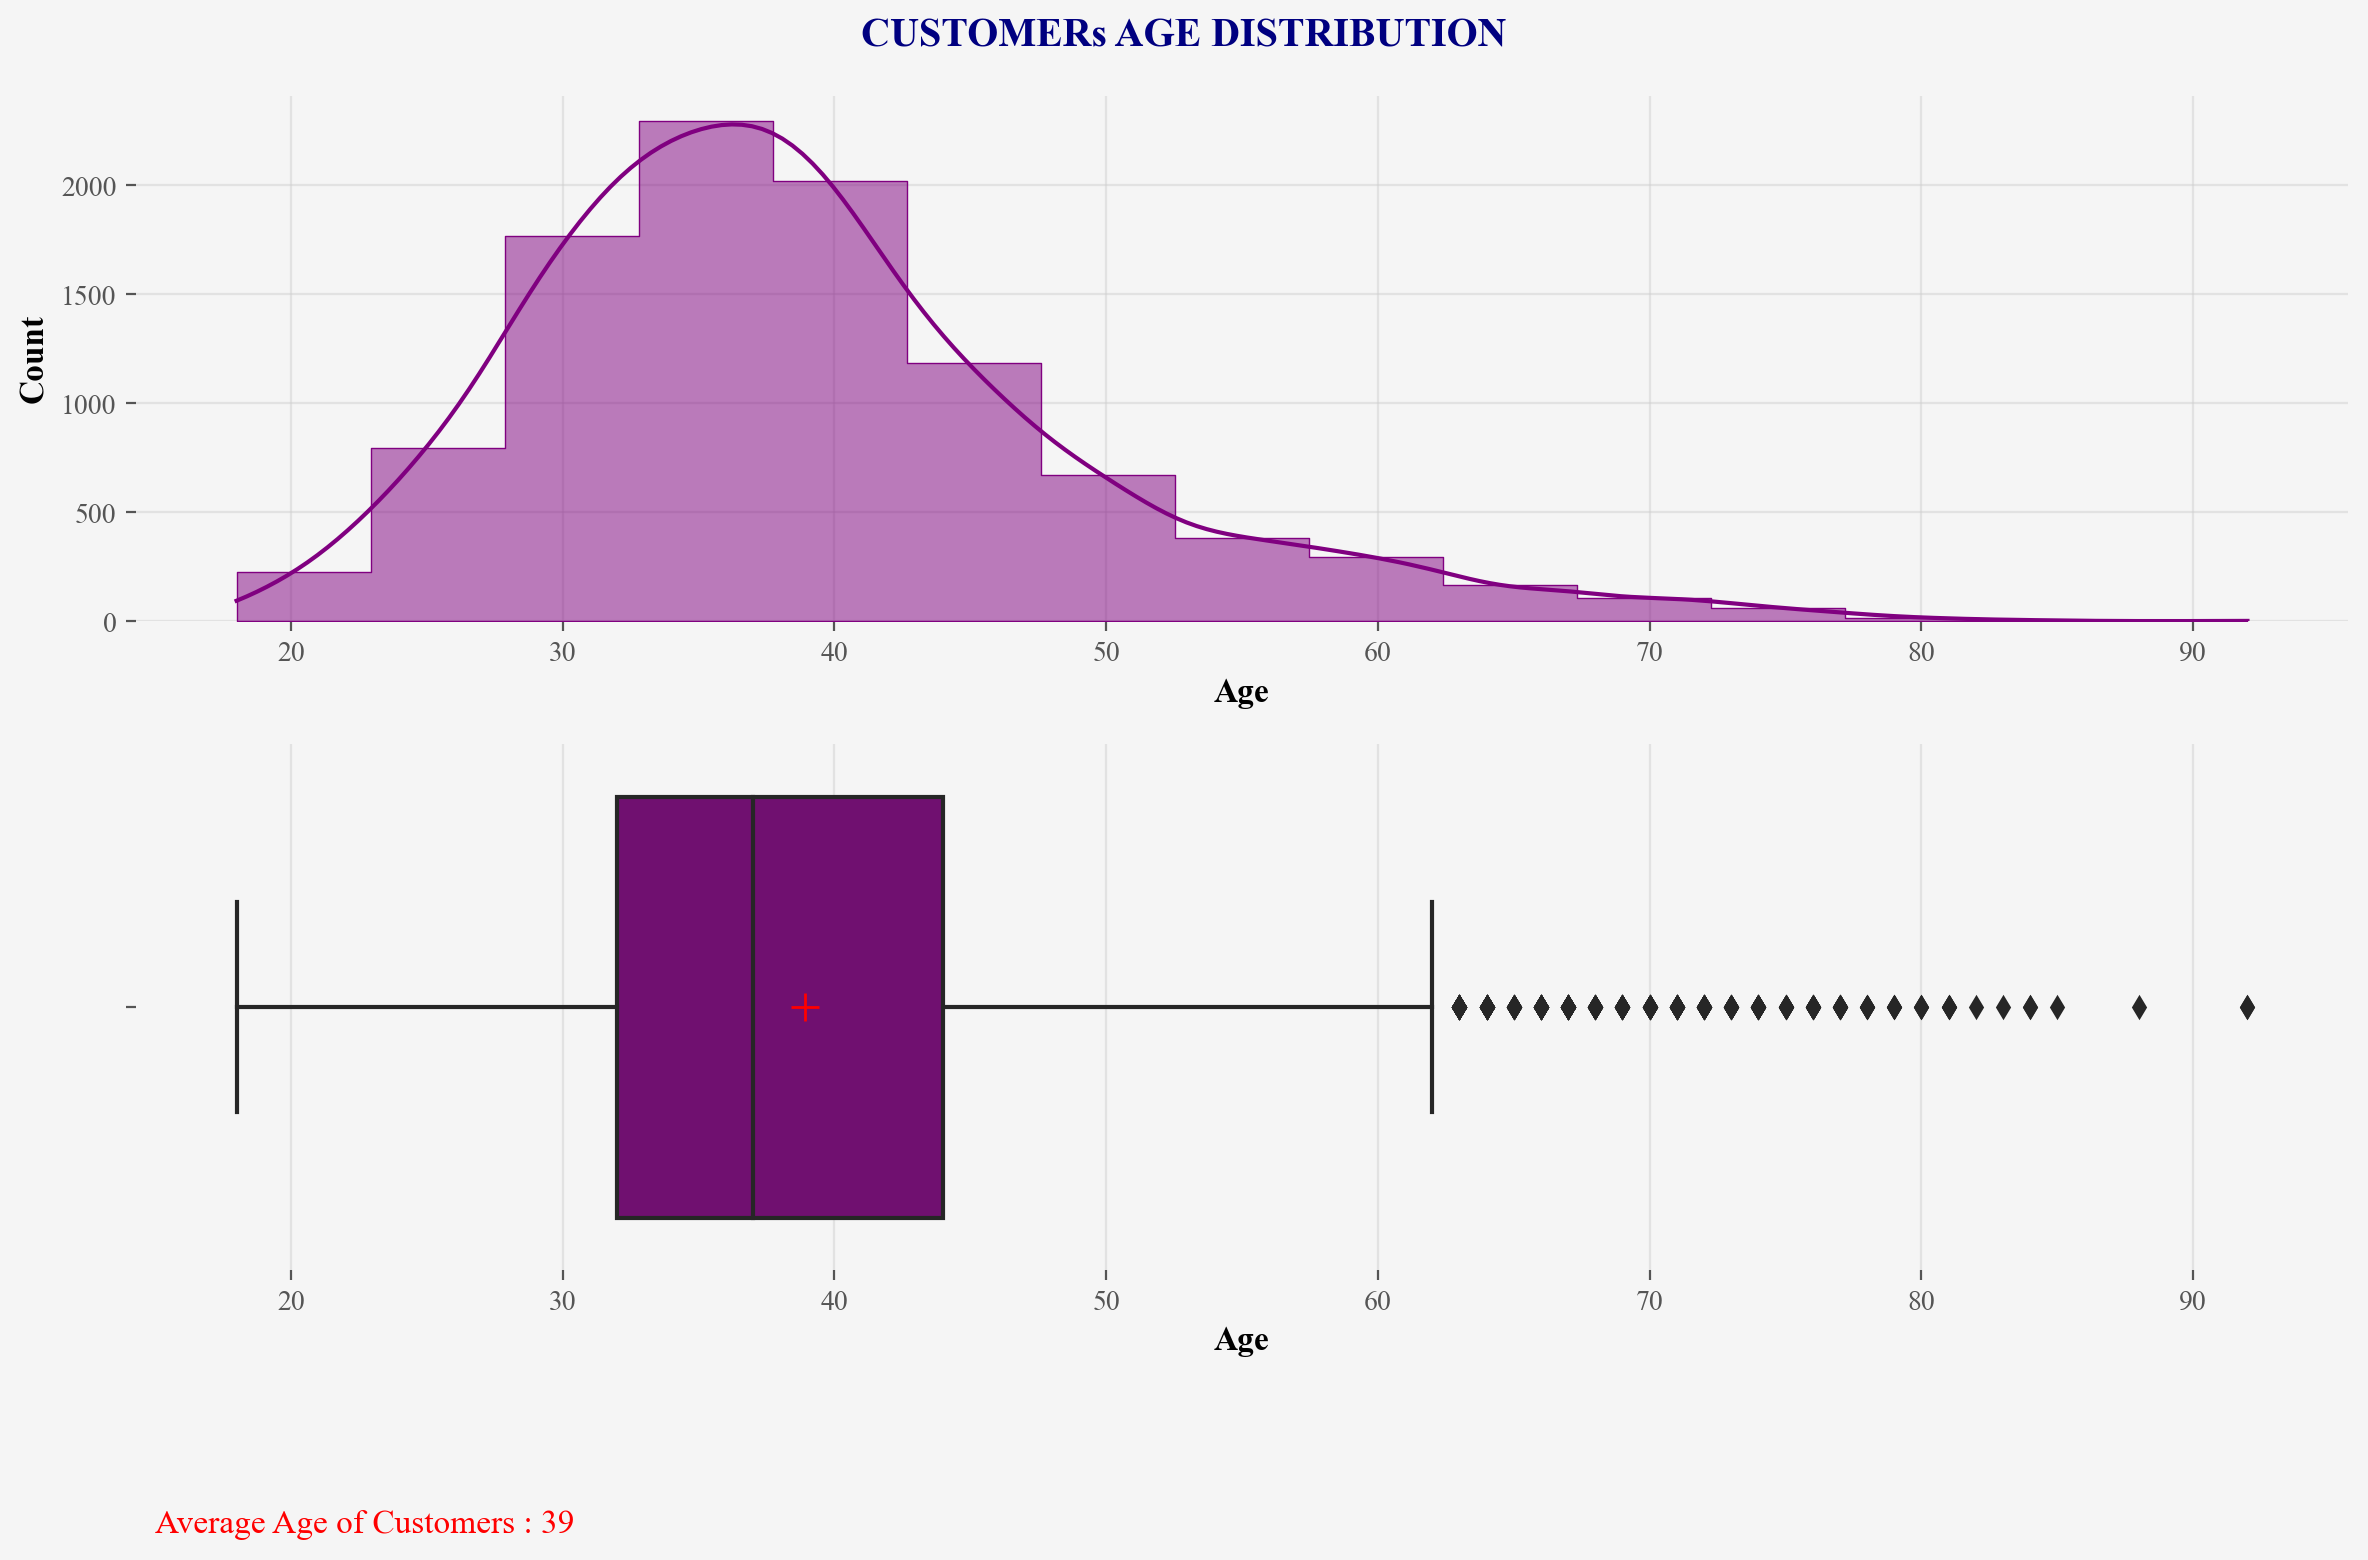

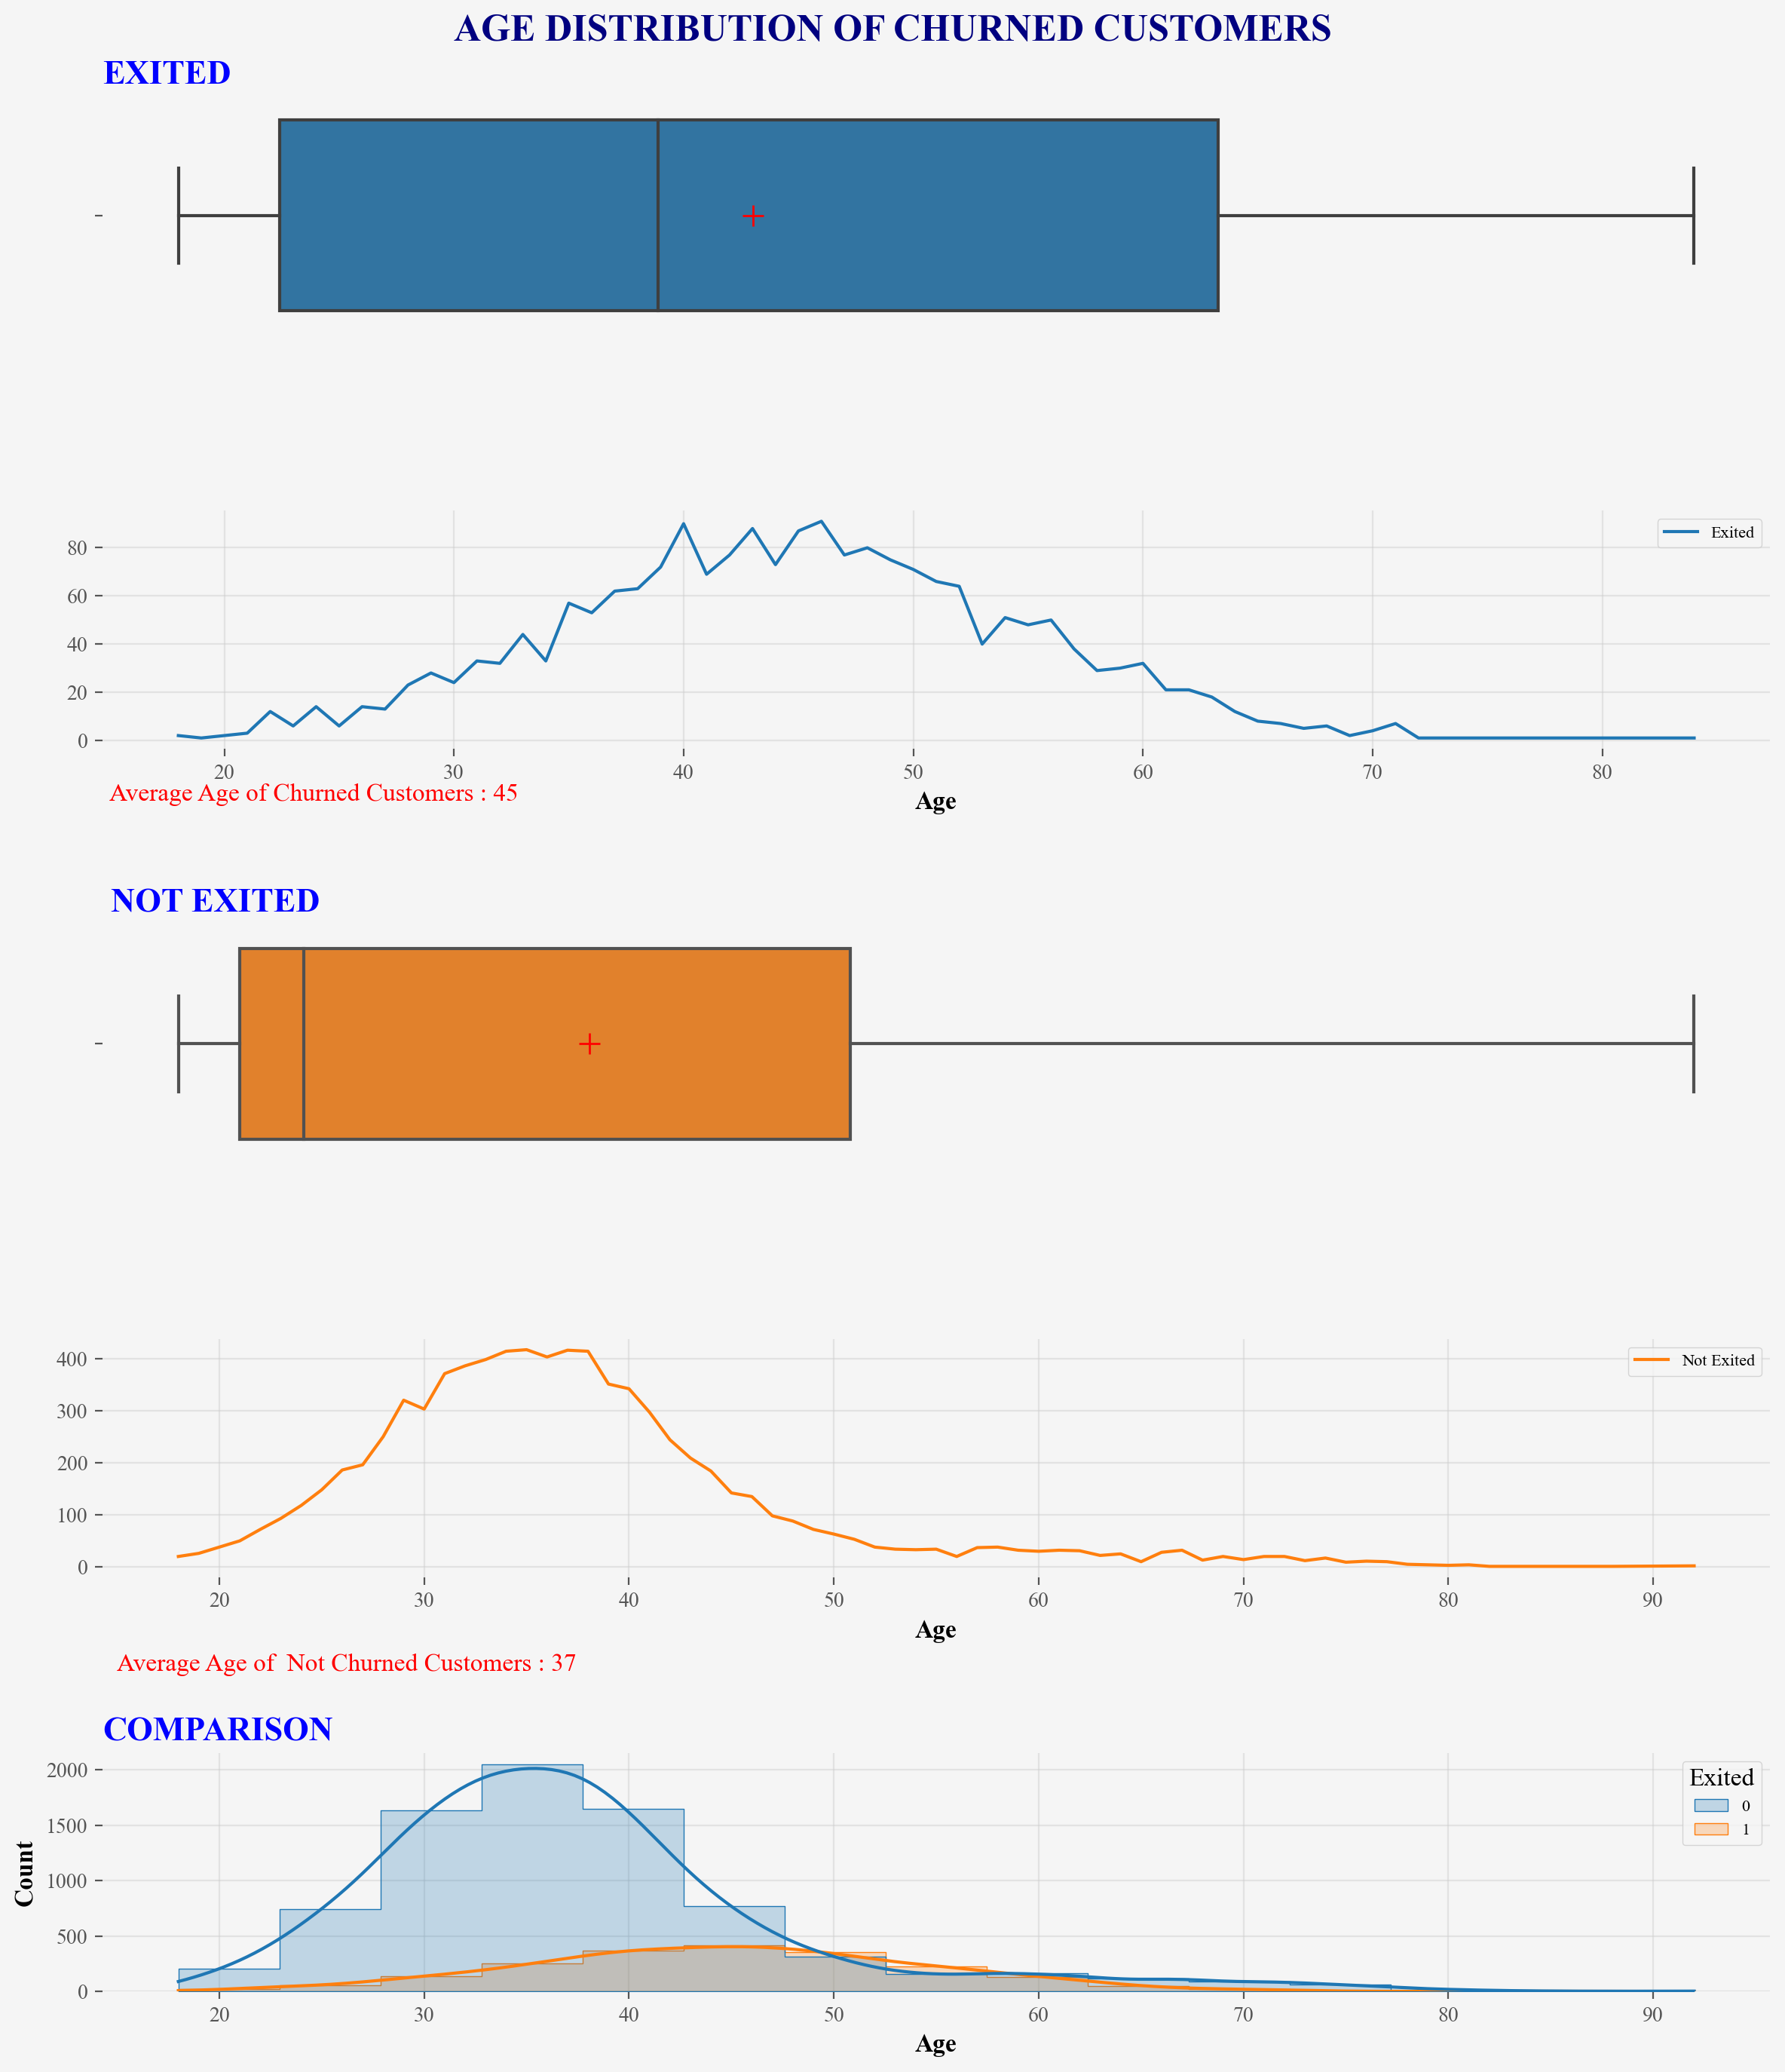

In [87]:
plt.figure(figsize = (12, 8), layout = 'tight')
plt.suptitle('CUSTOMERs AGE DISTRIBUTION', fontweight = 'bold', color = 'navy')

plt.subplot(2,1,1)
ax = sns.histplot(x = 'Age', data = data, element = 'step', kde = True, color = 'purple', bins = 15)

plt.subplot(2,1,2)
sns.boxplot(x = 'Age', data = data, showmeans = True,  color = 'purple',
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.text(15, 1, 'Average Age of Customers : 39', color = 'red', )

plt.show()

# ----------------------------------------------------------------------

plt.figure(figsize = (12, 14), layout = 'tight')
plt.suptitle('AGE DISTRIBUTION OF CHURNED CUSTOMERS', fontweight = 'bold', fontsize = 18, color = 'navy')

age_exited_data = data[data['Exited'] == 1]['Age'].value_counts()
plt.subplot(5,1,1)
sns.boxplot(age_exited_data, orient = 'h',showmeans = True,  
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.xticks([])
plt.xlabel(None)
plt.title('EXITED', loc = 'left', color = 'blue')

plt.subplot(5,1,2)
sns.lineplot(x = age_exited_data.index, y = age_exited_data.values, data = age_exited_data, label = 'Exited',)
plt.xlabel('Age')
plt.text(15, -25, 'Average Age of Churned Customers : 45', color = 'red', )

age_not_exited_data = data[data['Exited'] == 0]['Age'].value_counts()
plt.subplot(5,1,3)
sns.boxplot(age_not_exited_data, orient = 'h',showmeans = True, color = '#ff7f0e', 
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.xticks([])
plt.xlabel(None)
plt.title(' NOT EXITED', loc = 'left', color = 'blue')

plt.subplot(5,1,4)
sns.lineplot(x = age_not_exited_data.index, y = age_not_exited_data.values, data = age_not_exited_data, label = 'Not Exited',color = '#ff7f0e')
plt.xlabel('Age')
plt.text(15, -200, 'Average Age of  Not Churned Customers : 37', color = 'red', )


plt.subplot(5,1,5)
ax = sns.histplot(x = 'Age', data = data, hue = 'Exited', element = 'step', kde = True, bins = 15 )
plt.title('COMPARISON', loc = 'left', color = 'blue')

plt.show()

- From **total customers**, around **50% customers** are having age **between 32 and 45** and the **Average Age** of customers is **39**. 
- From **all churned customers**, around **50% customers** are having age **between 22 and 63** and the **Average Age** of churned customers is **45**.
- From **all not churned customers**, around **50% customers** are having age **between 21 and 51** and the **Average Age** of not churned customers is **37**.

### Tenure

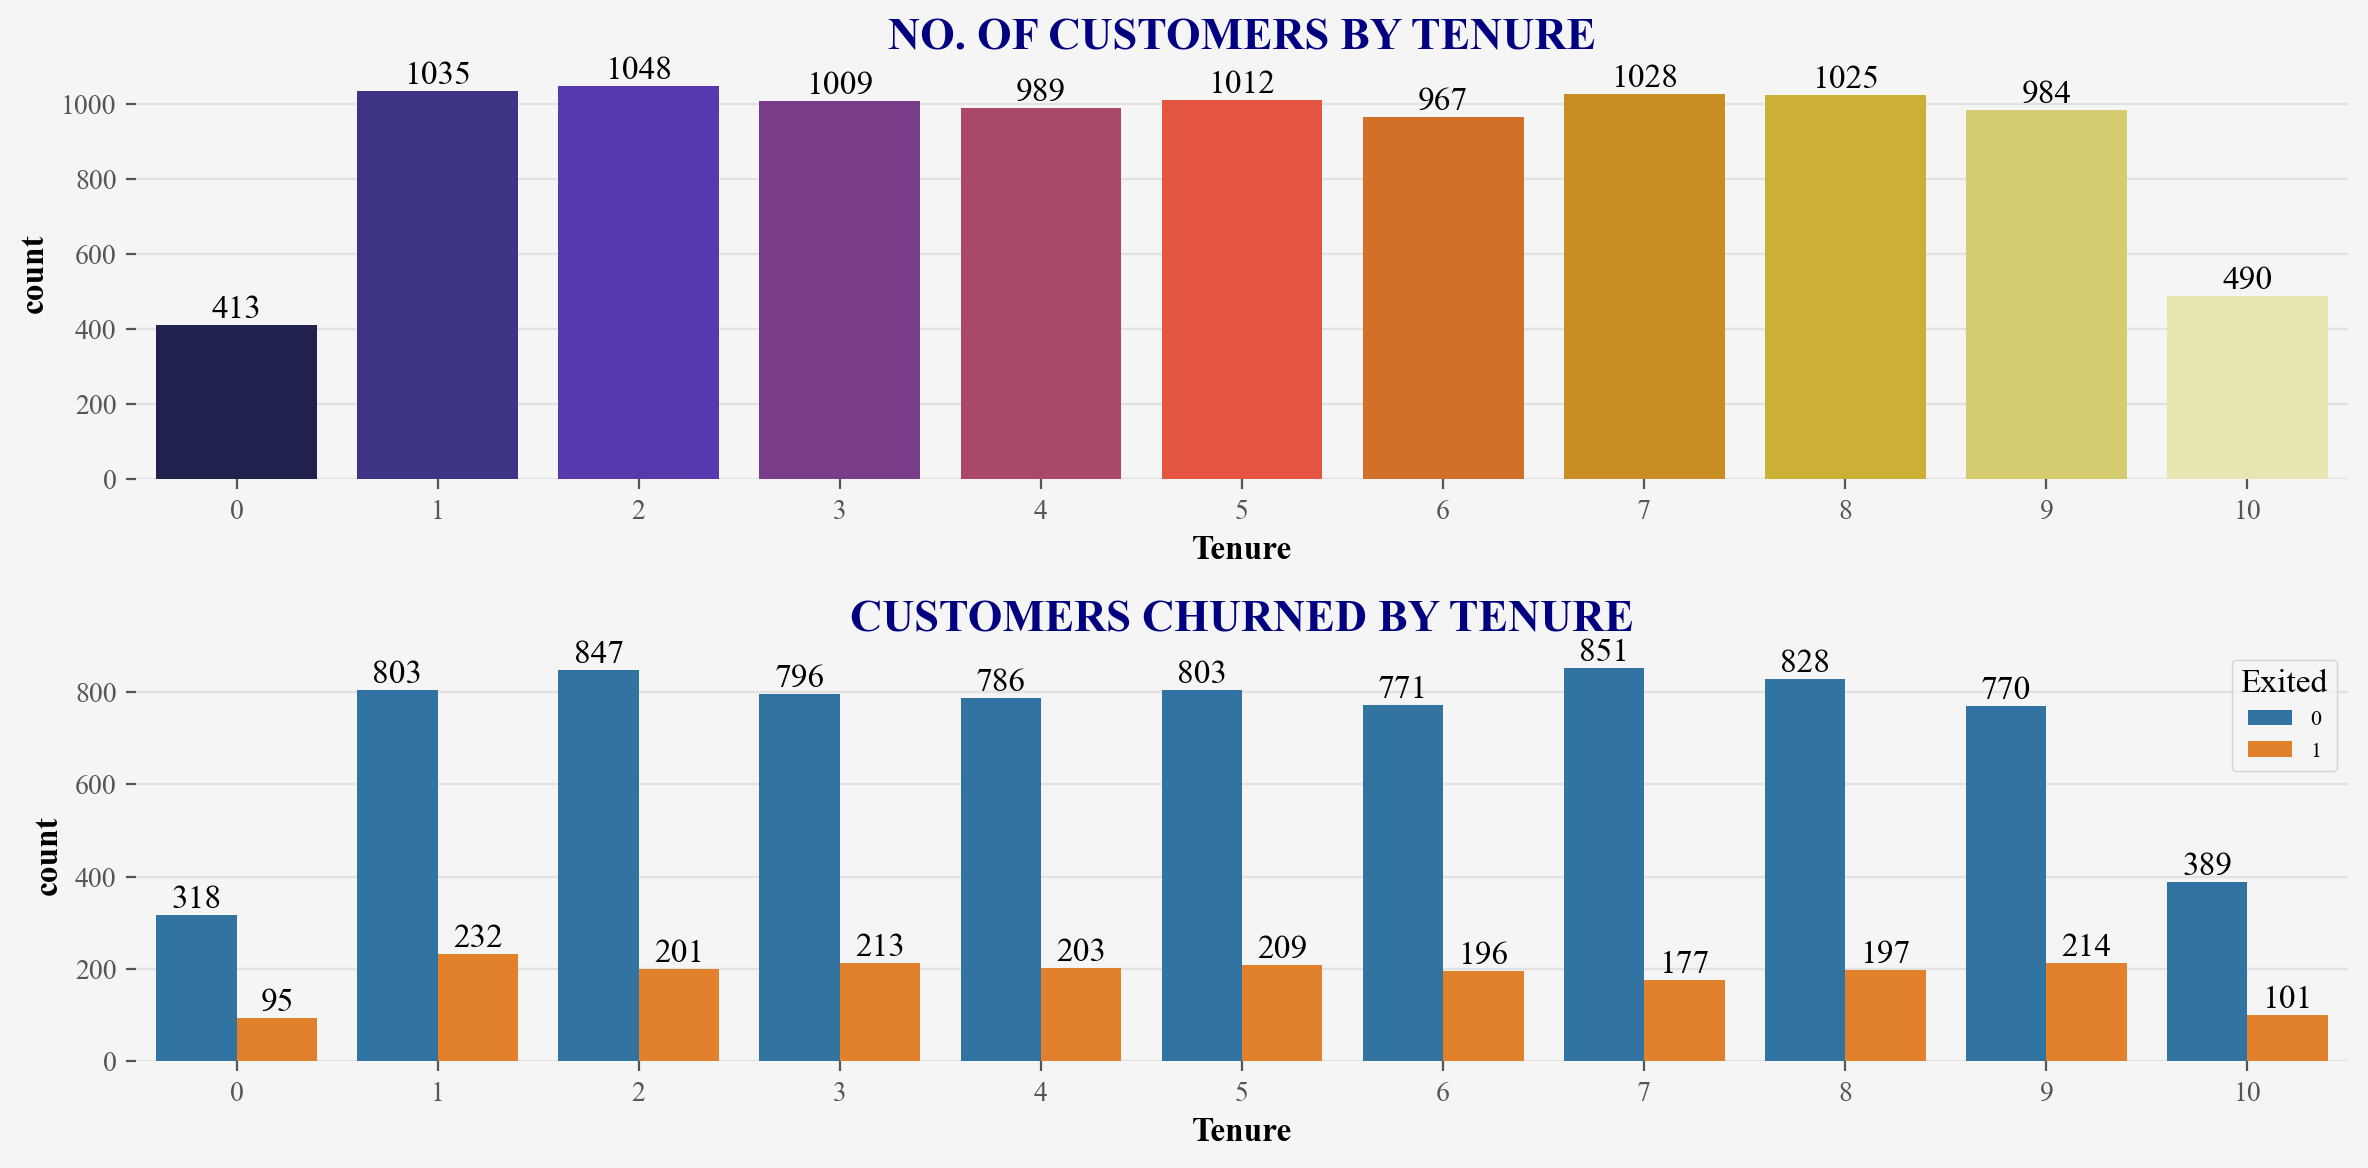

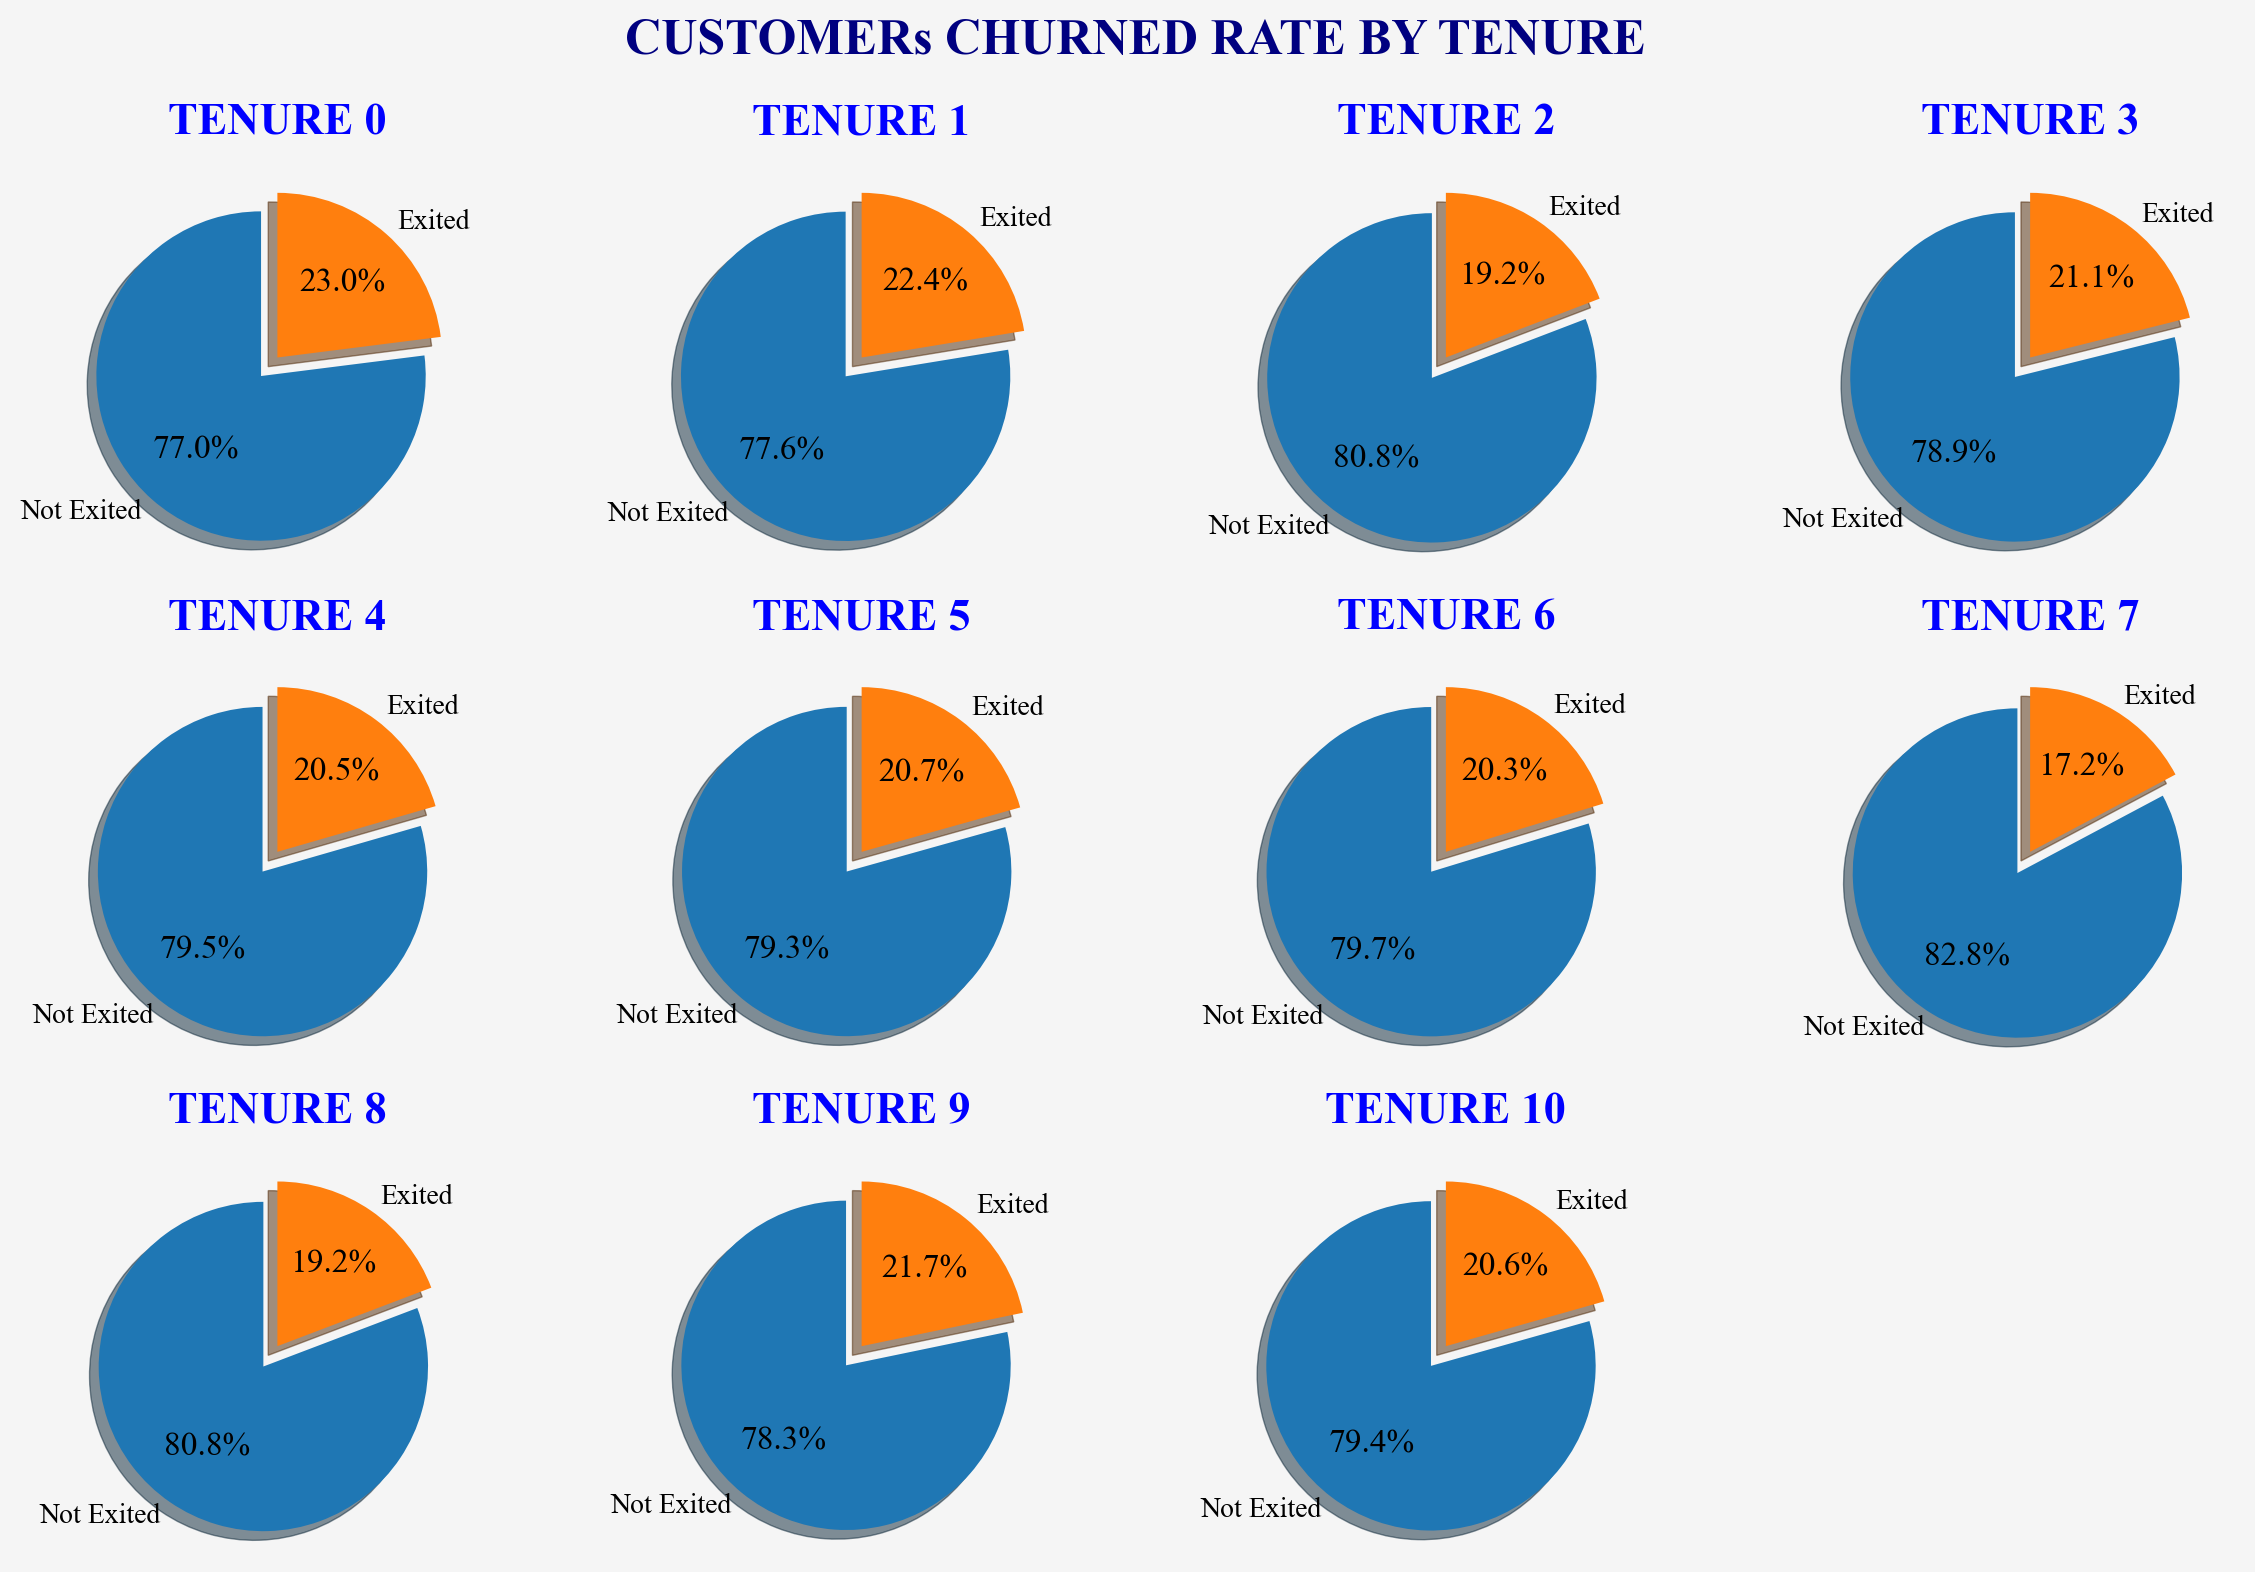

In [100]:
plt.figure(figsize = (12, 6), layout = 'tight')

plt.subplot(2,1,1)
ax1 = sns.countplot('Tenure', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF CUSTOMERS BY TENURE')

plt.subplot(2,1,2)
ax2 = sns.countplot('Tenure', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)
plt.title('CUSTOMERS CHURNED BY TENURE')
plt.show()

#----------------------------------------------------------------------------------------------------------------

tenure_data = {}
plt.figure(figsize = (12,8), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY TENURE', fontweight = 'bold', fontsize = 18, color = 'navy')

for i in range(1, 12):
    plt.subplot(3, 4, i)
    tenure_data[i-1] = data[data['Tenure'] == i-1]['Exited'].value_counts()
    labels = ['Not Exited', 'Exited']
    
    plt.pie(tenure_data[i-1], labels=labels, explode=[0.15, 0], autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(f'TENURE {i-1}', color='blue')

plt.show()

- There are almost equal no. of customers per Tenure (except for Tenure 0 and Tenure 10).
- It is said that the customers having more no.of years with bank less likely to leave the bank, but from the data there is no any difference in the rate of customers leaving the bank.
- The churned rate is almost same for all the customers with different Tenures .

### Balance

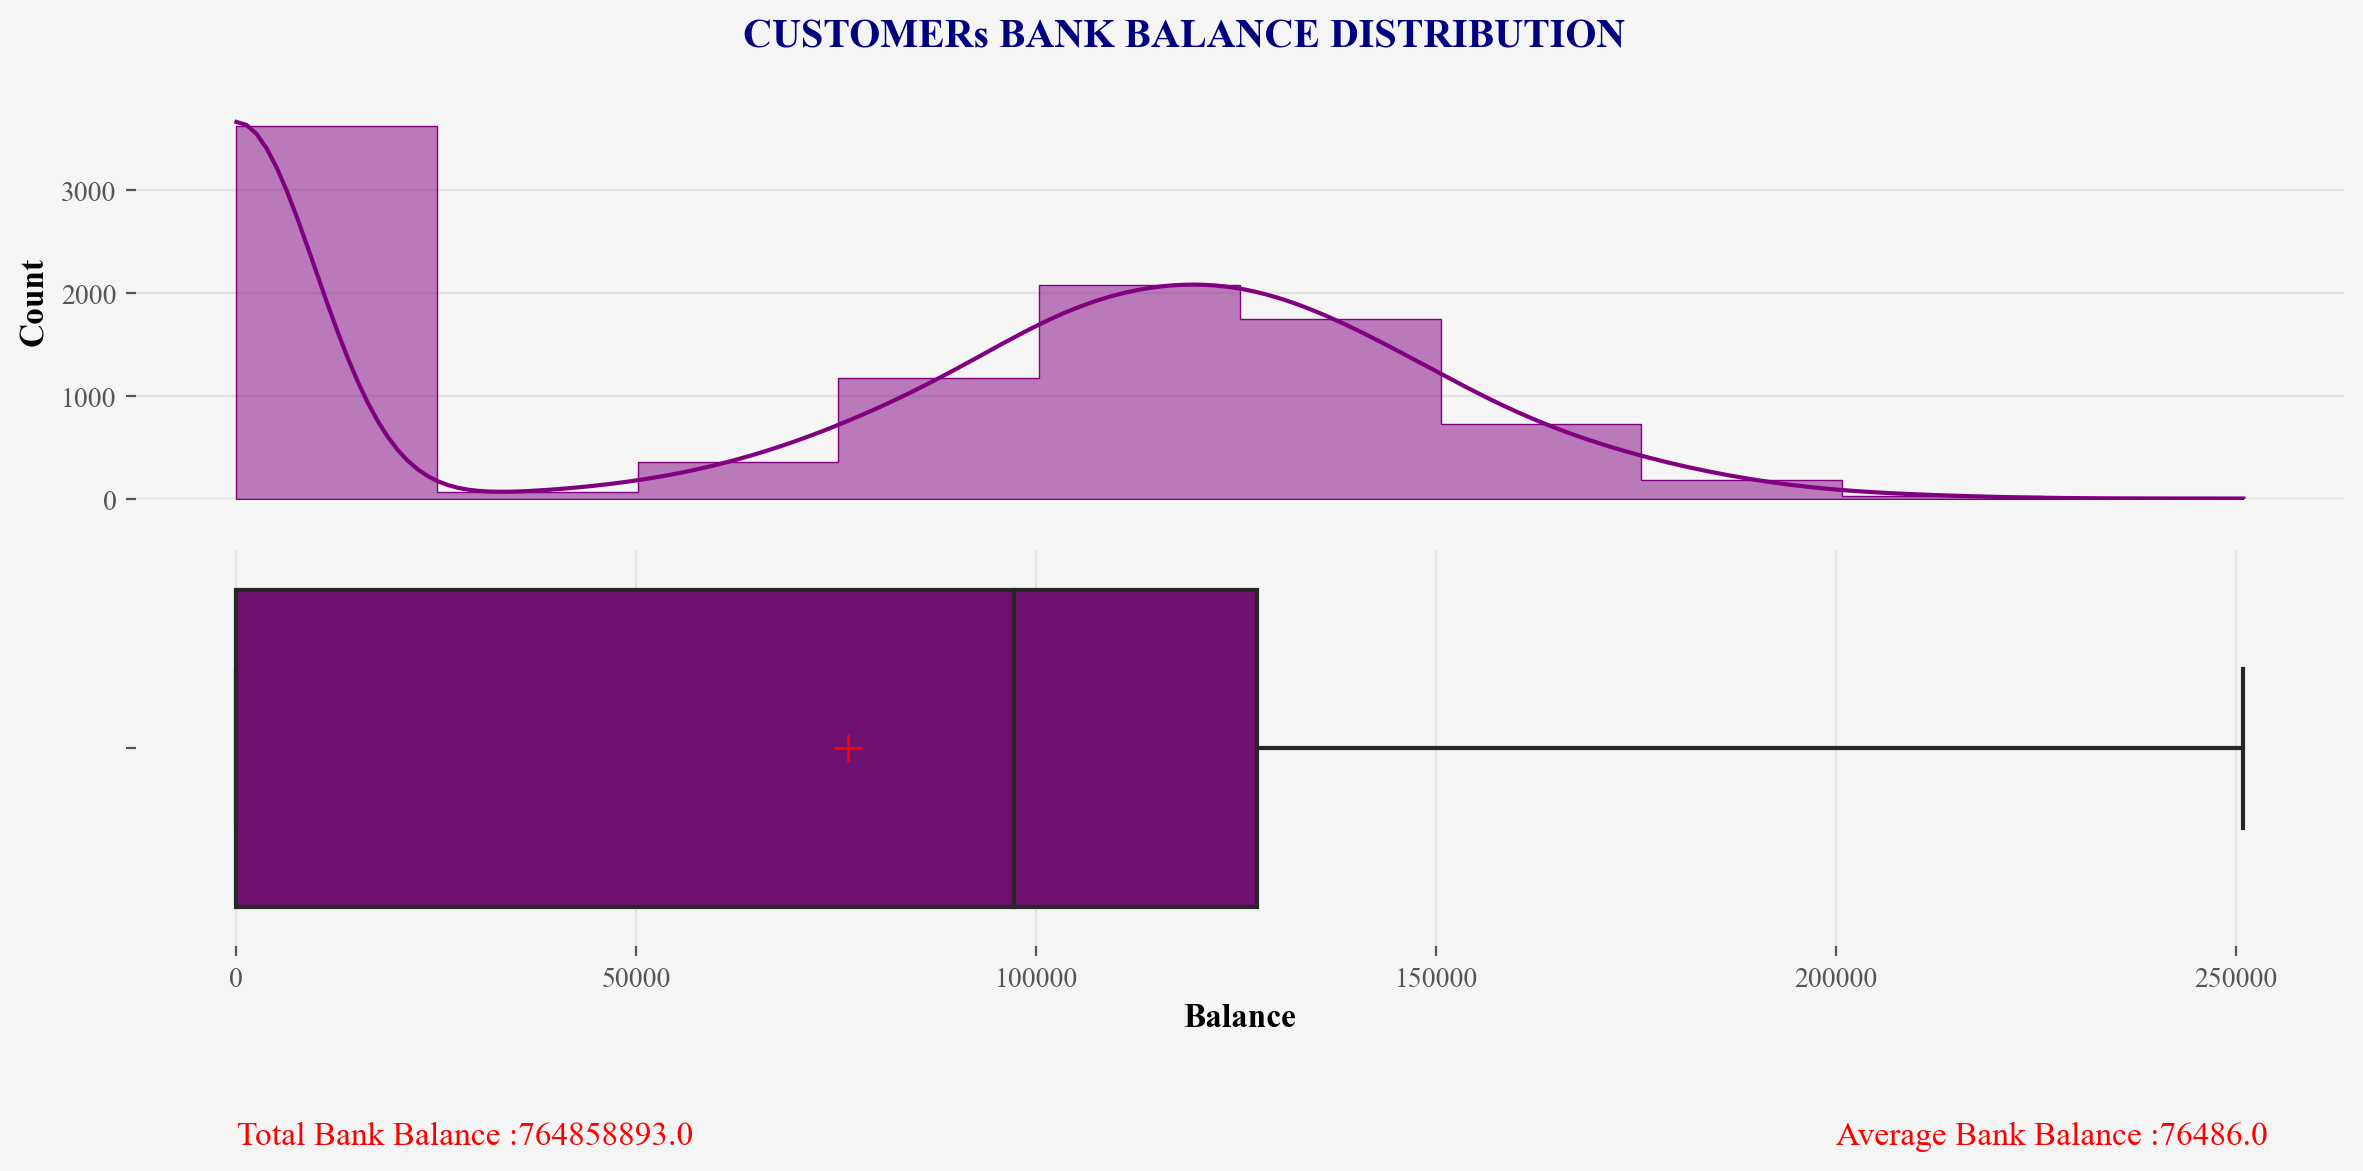

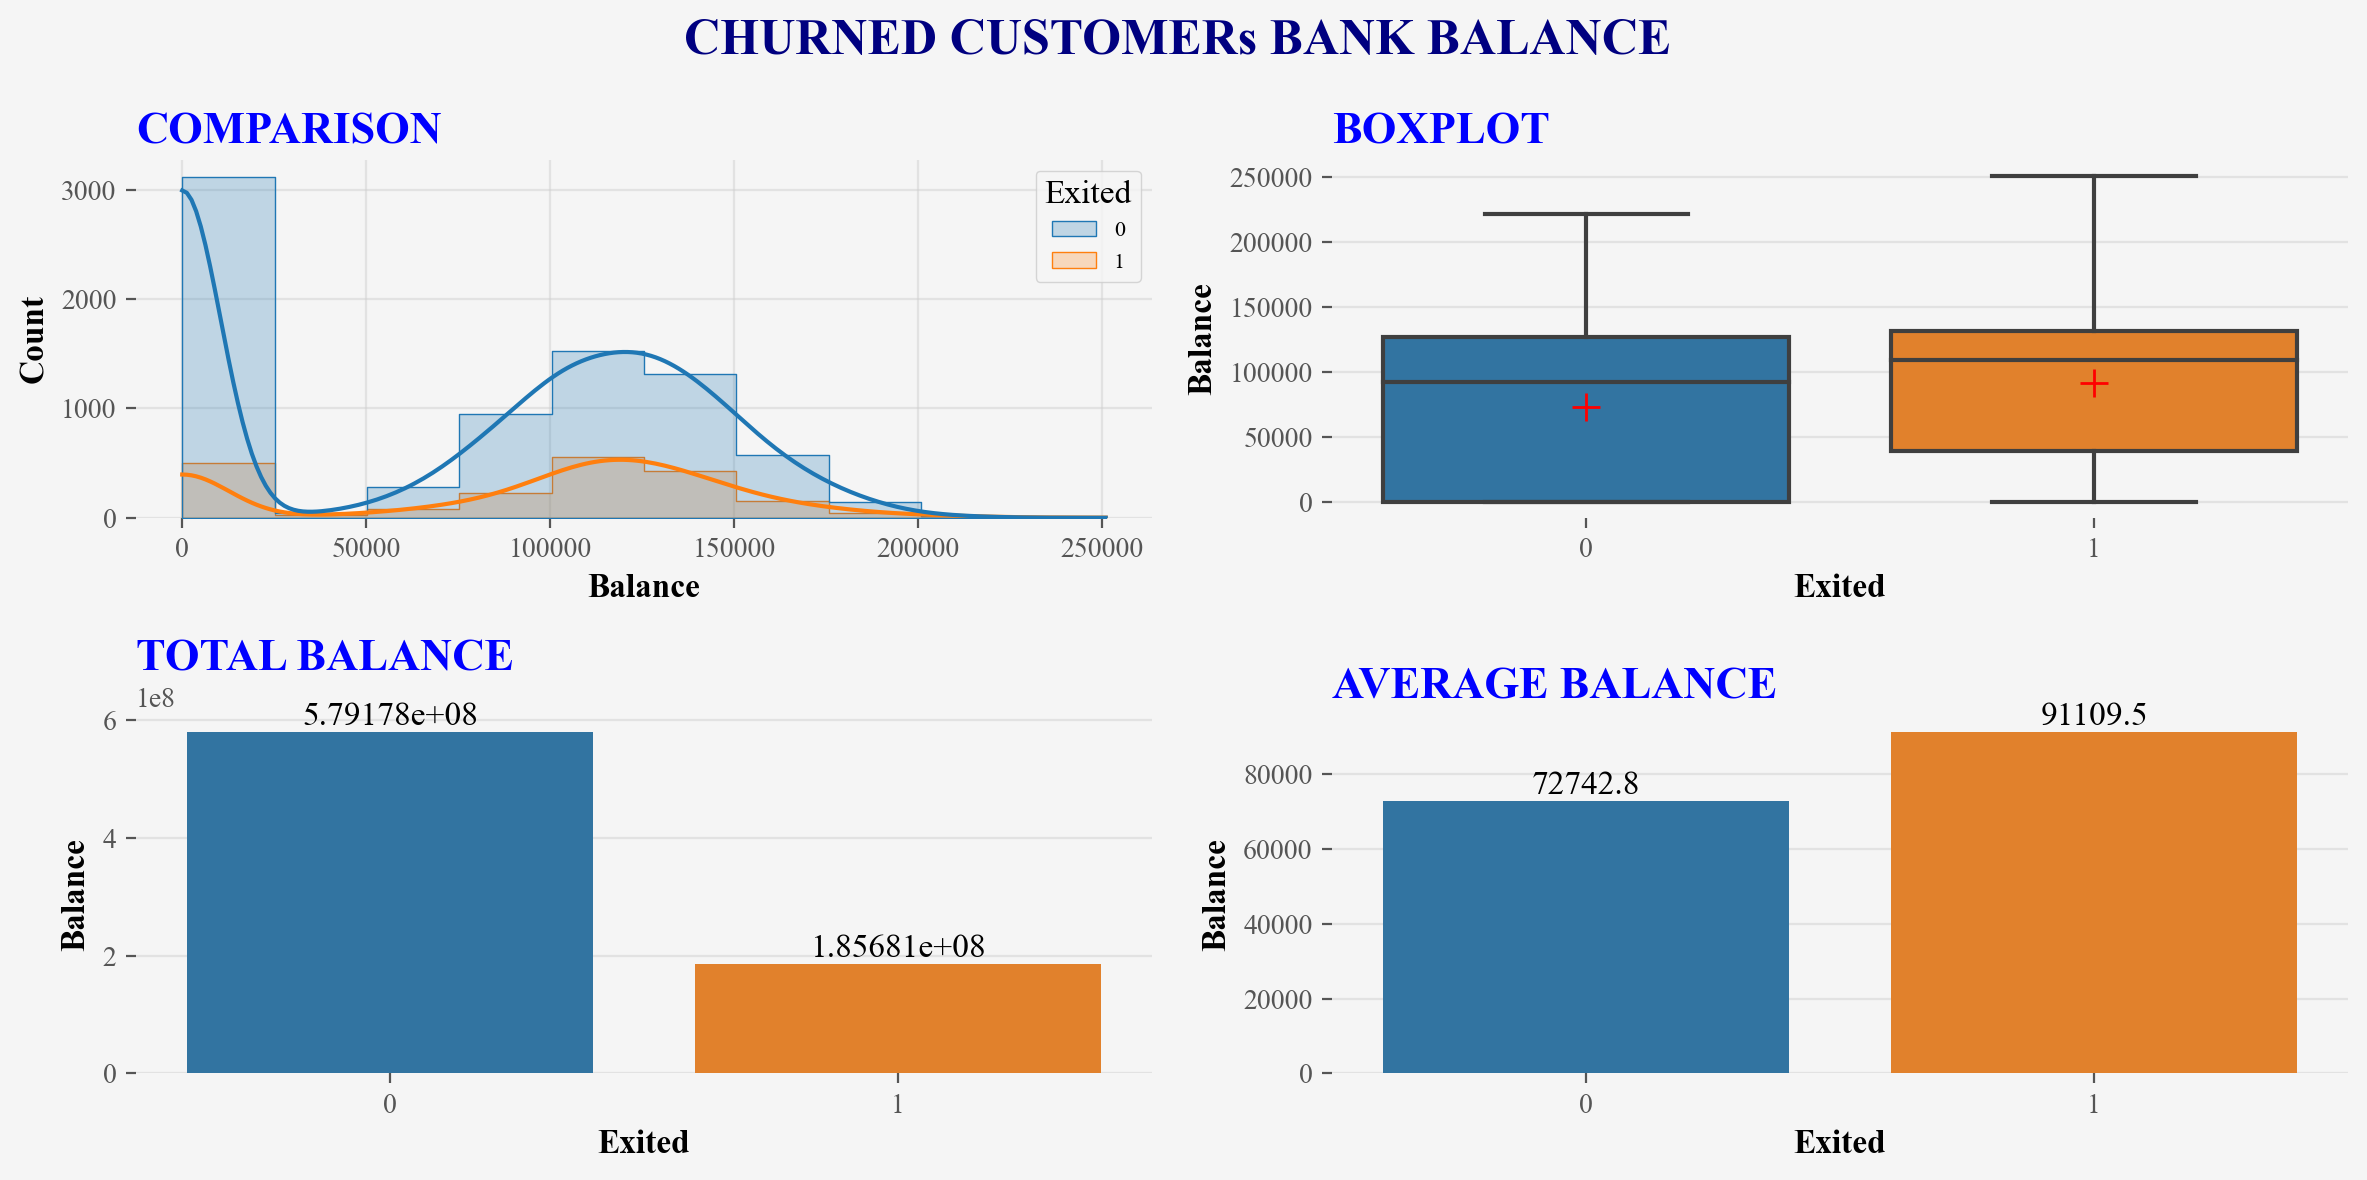

In [89]:
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CUSTOMERs BANK BALANCE DISTRIBUTION', fontweight = 'bold', color = 'navy')

plt.subplot(2,1,1)
ax = sns.histplot(x = 'Balance', data = data, element = 'step', kde = True, color = 'purple', bins = 10)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel(None)
plt.xticks([])

plt.subplot(2,1,2)
avg_balance = data['Balance'].mean().round()
total_balance = data['Balance'].sum().round()

sns.boxplot(x = 'Balance', data = data, showmeans = True,  color = 'purple',
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.text(15, 1, f'Total Bank Balance :{total_balance}', color = 'red', )
plt.text(200000, 1, f'Average Bank Balance :{avg_balance}', color = 'red', )

plt.show()

#---------------------------------------------------------------------------------------------

plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CHURNED CUSTOMERs BANK BALANCE ', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(2,2,1)
ax = sns.histplot(x = 'Balance', data = data, hue = 'Exited', element = 'step', kde = True, bins = 10)
plt.title('COMPARISON', loc = 'left', color = 'blue')

plt.subplot(2,2,2)
sns.boxplot('Exited', 'Balance', data = data, showmeans = True, 
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.title('BOXPLOT', loc = 'left', color = 'blue')

plt.subplot(2,2,3)
ax = sns.barplot( 'Exited', 'Balance',data = data, ci = None, estimator = sum)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('TOTAL BALANCE', loc = 'left', color = 'blue')
    
plt.subplot(2,2,4)
ax = sns.barplot( 'Exited', 'Balance',data = data, ci = None)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('AVERAGE BALANCE', loc = 'left', color = 'blue')

plt.show()

- The total bank balance is 764,858,893 and the average balance is around 76,486.
- Out of all customers around 1/3rd customers have zero bank balance.
- The average bank balance of churned customers is 91,130 whereas for the regular customers the average bank balance is 72,742.
- Non-churned customers have the total bank balance of about 579,177,781 and for churned customers it is 185,681,112.

### NumOfProducts

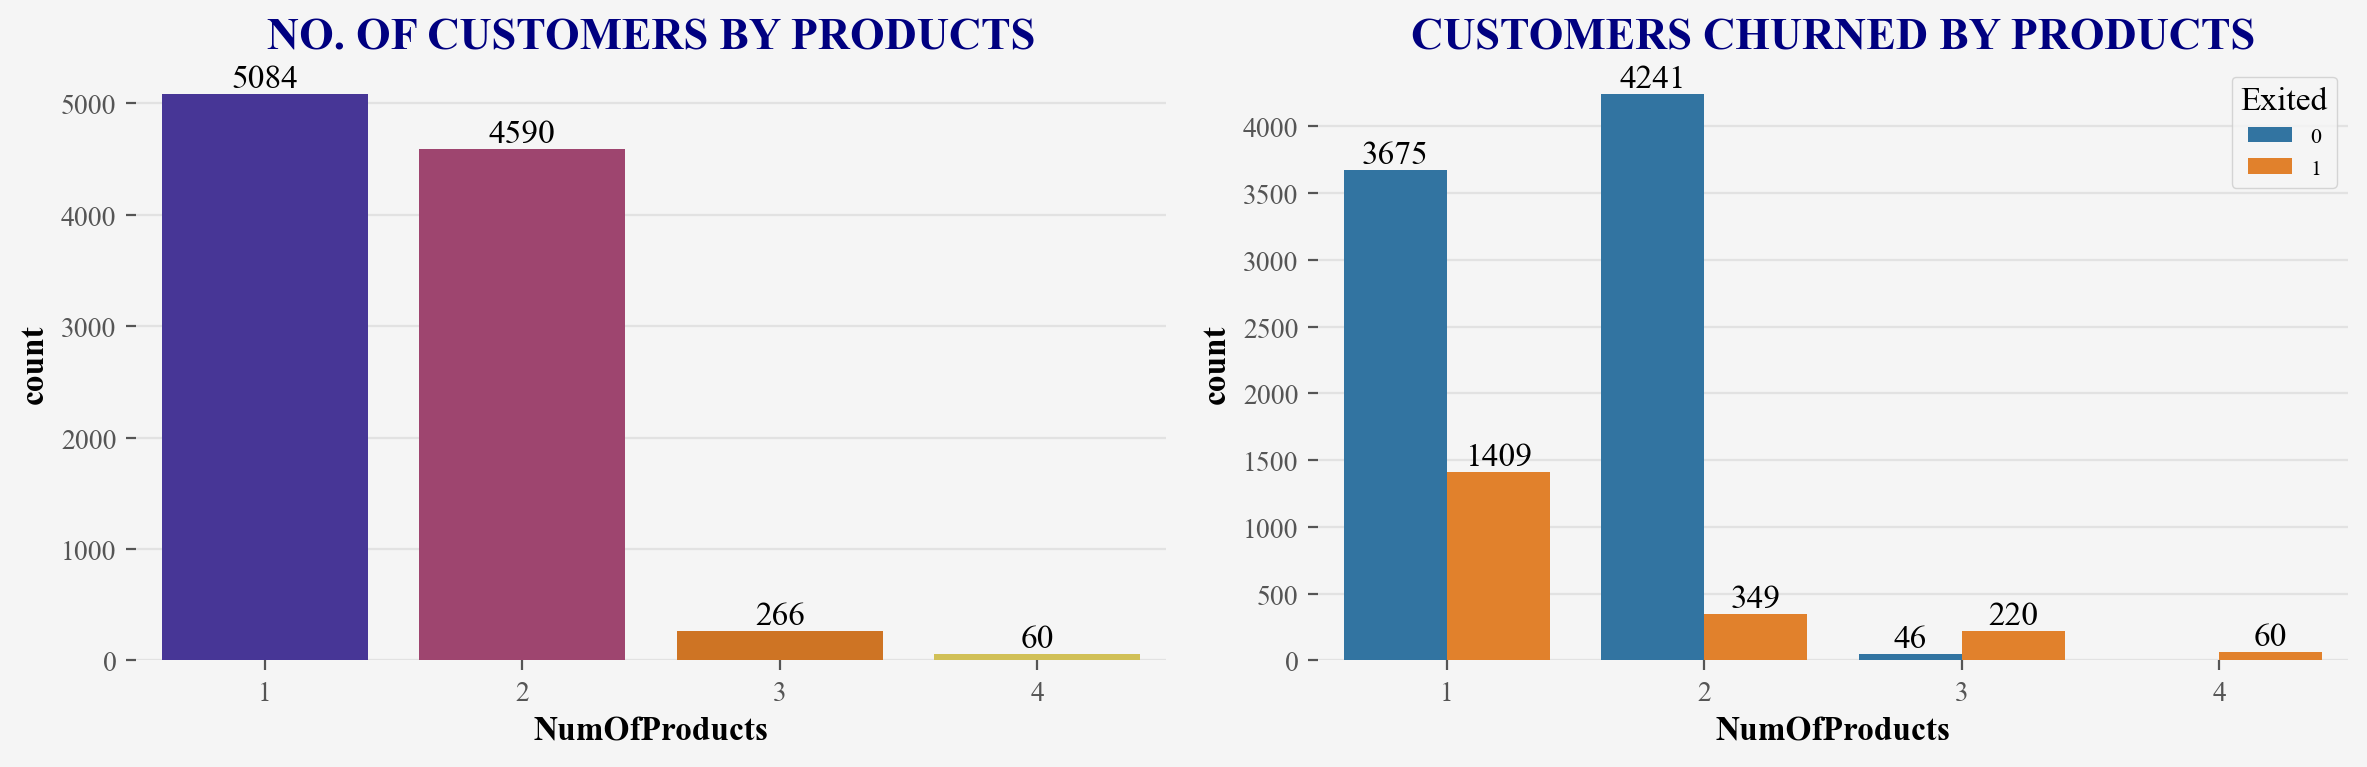

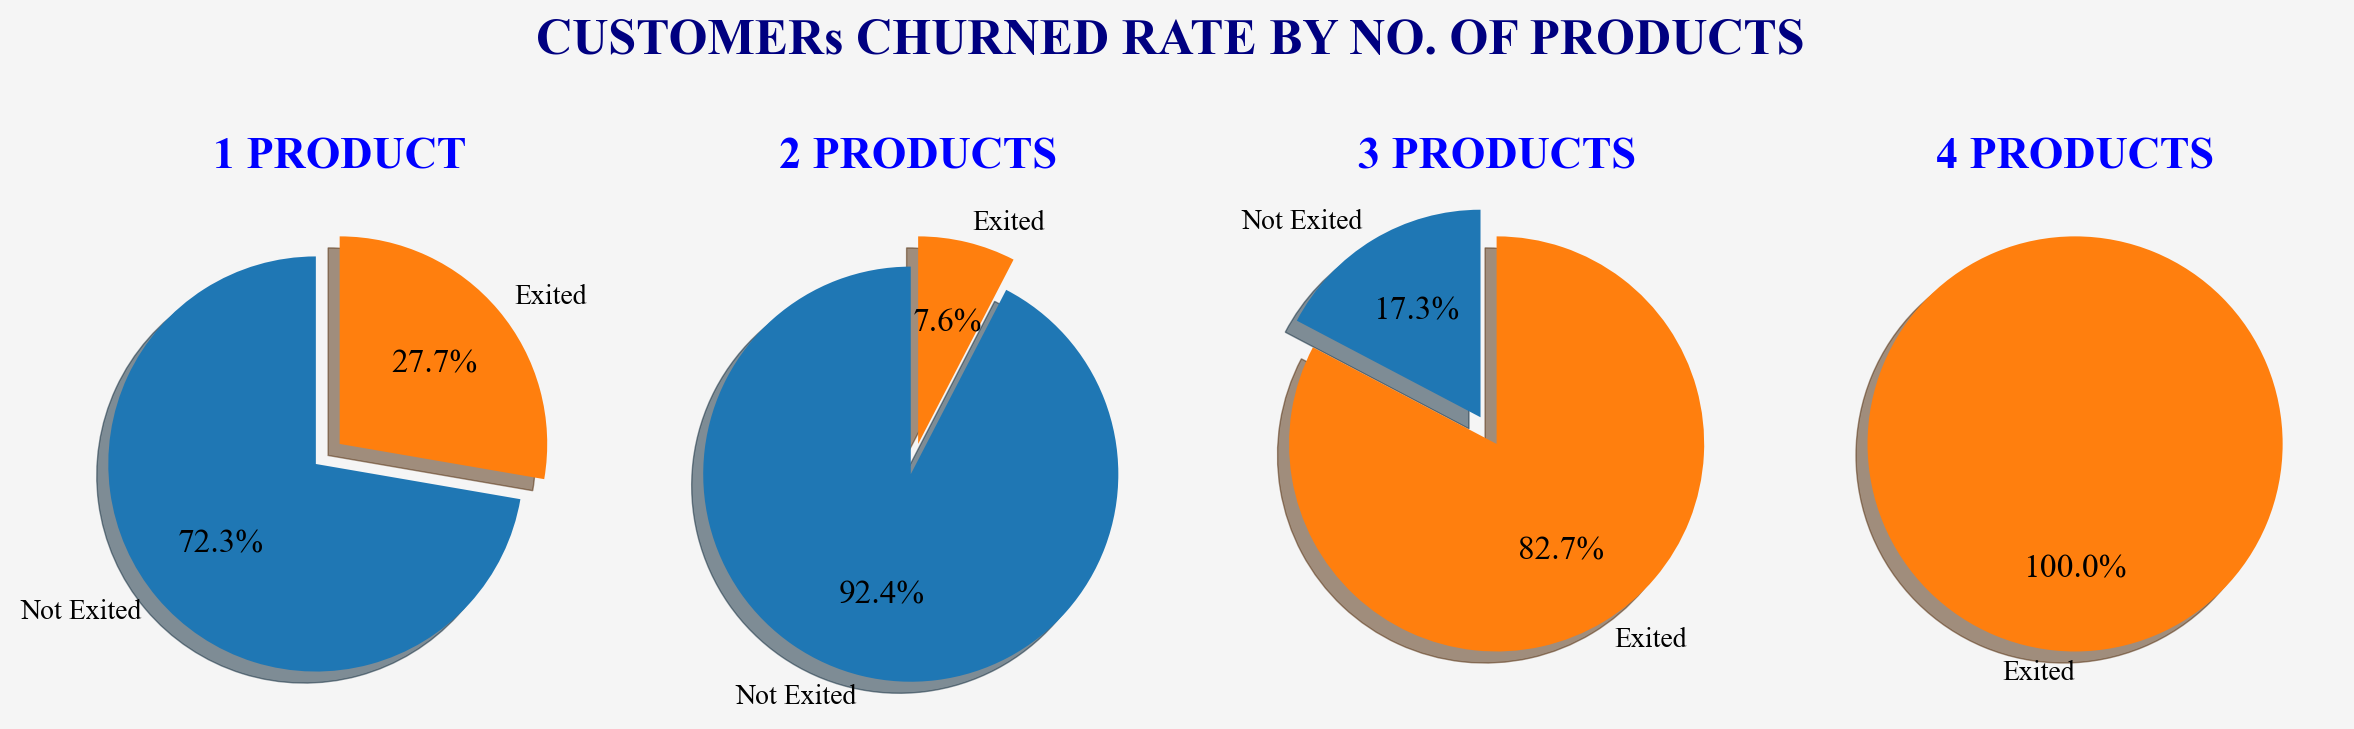

In [101]:
plt.figure(figsize = (12, 4), layout = 'tight')
plt.subplot(1,2,1)
ax = sns.countplot('NumOfProducts', data = data, palette = 'CMRmap')
for i in ax.containers:
    ax.bar_label(i)
plt.title('NO. OF CUSTOMERS BY PRODUCTS')
    
plt.subplot(1,2,2)
ax = sns.countplot('NumOfProducts', hue = 'Exited', data = data,)
for i in ax.containers:
    ax.bar_label(i)
plt.title('CUSTOMERS CHURNED BY PRODUCTS')
plt.show()    

#---------------------------------------------------------------------------------------------

products1_exited_data = data[data['NumOfProducts'] == 1]['Exited'].value_counts().sort_index()
products2_exited_data = data[data['NumOfProducts'] == 2]['Exited'].value_counts().sort_index()
products3_exited_data = data[data['NumOfProducts'] == 3]['Exited'].value_counts().sort_index()
products4_exited_data = data[data['NumOfProducts'] == 4]['Exited'].value_counts().sort_index()

labels = ['Not Exited', 'Exited']

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY NO. OF PRODUCTS', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,4,1)
plt.pie(products1_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('1 PRODUCT', color = 'blue')

plt.subplot(1,4,2)
plt.pie(products2_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('2 PRODUCTS', color = 'blue')

plt.subplot(1,4,3)
plt.pie(products3_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('3 PRODUCTS', color = 'blue')

plt.subplot(1,4,4)
plt.pie(products4_exited_data, labels = ['Exited'], explode = [0], autopct = '%1.1f%%', colors = ['#ff7f0e'],
        shadow = True, startangle = 90)
plt.title('4 PRODUCTS', color = 'blue')

plt.show()


- Most of the bank customers are having 1 or 2 bank products while there are only 60 customers having 4 bank products.
- The general understanding is that the customers having more products are less likely to leave the bank, but the data shows exact reverse of this conception. 
- Customers having 1 or 2 products have very low churning rate (28% and 8% respectively) while most of the customers with 3 and 4 products left the bank.(82% and 100%)

### Has Credit Card

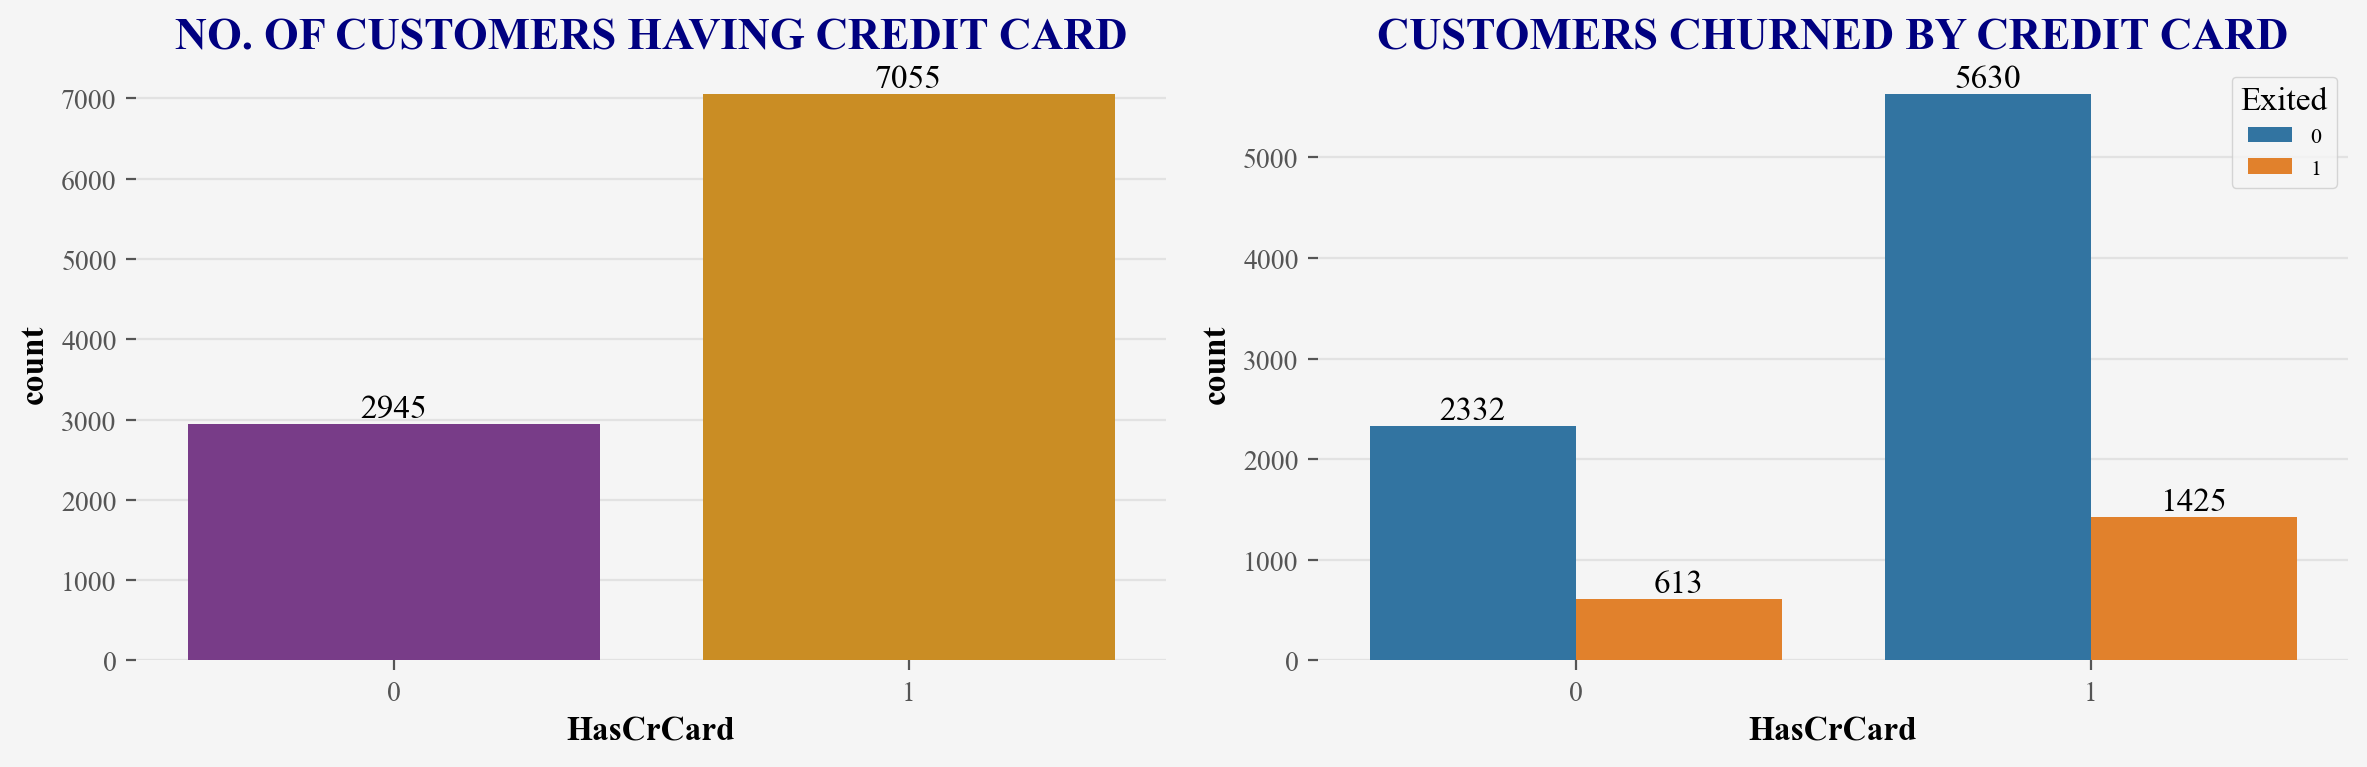

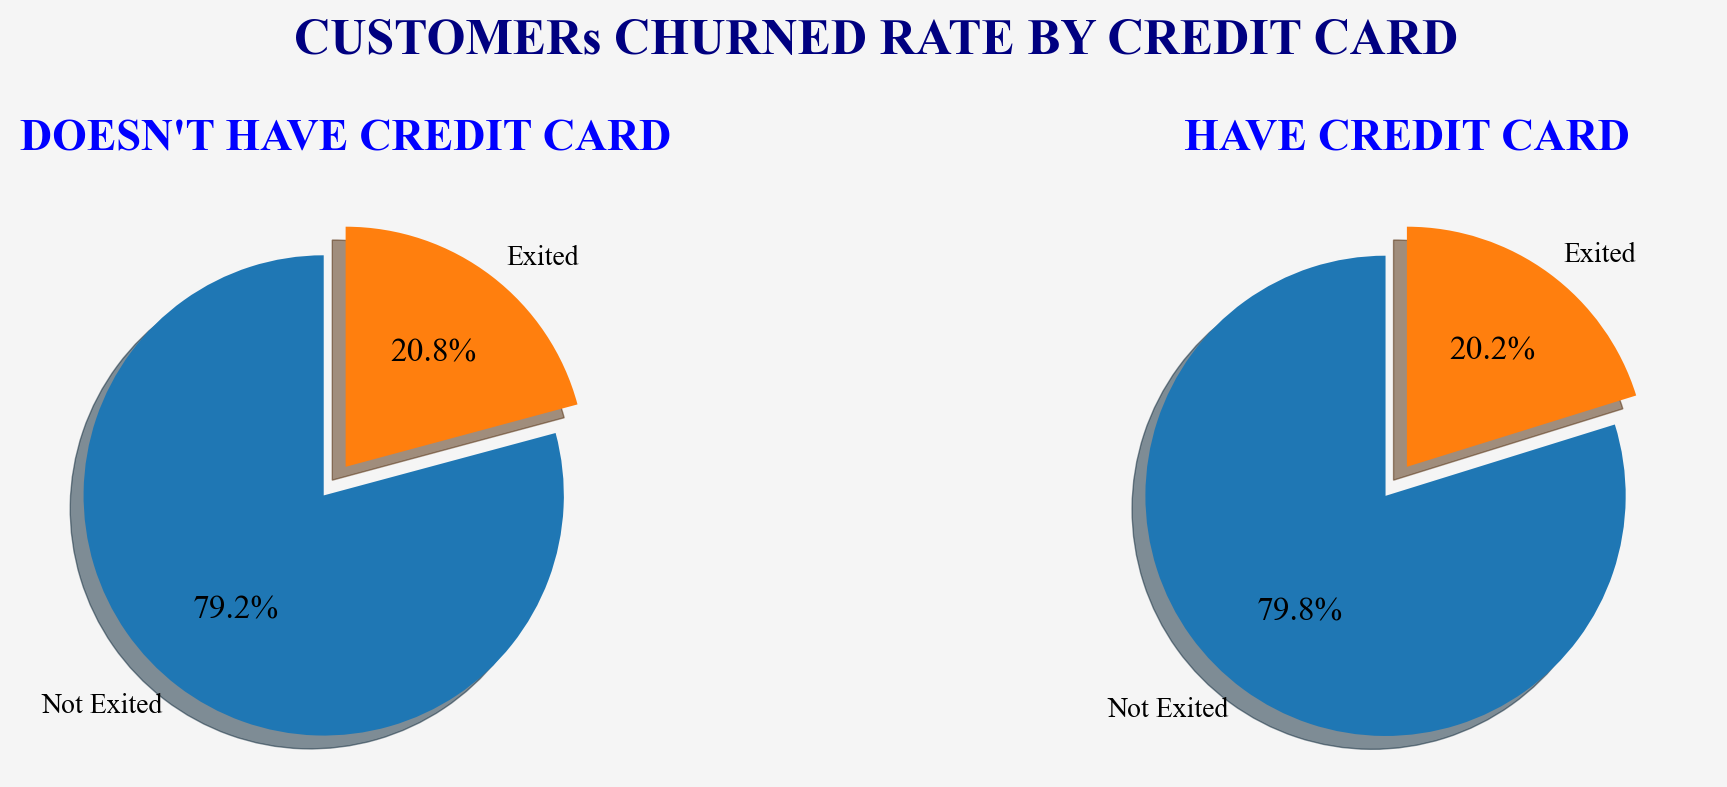

In [102]:
plt.figure(figsize = (12, 4), layout = 'tight')

plt.subplot(1,2,1)
ax1 = sns.countplot('HasCrCard', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF CUSTOMERS HAVING CREDIT CARD')

plt.subplot(1,2,2)
ax2 = sns.countplot('HasCrCard', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)

plt.title('CUSTOMERS CHURNED BY CREDIT CARD')
plt.show()

#---------------------------------------------------------------------------------------------------------------------------

card_exited_data = data[data['HasCrCard'] == 1]['Exited'].value_counts()
no_card_exited_data = data[data['HasCrCard'] == 0]['Exited'].value_counts()

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY CREDIT CARD', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,2,1)
labels = ['Not Exited', 'Exited']

plt.pie(no_card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title("DOESN'T HAVE CREDIT CARD", color = 'blue')

plt.subplot(1,2,2)
labels = ['Not Exited', 'Exited']

plt.pie(card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('HAVE CREDIT CARD', color = 'blue')
plt.show()

- Total no. of customers with credit card is 7055 while 2945 customers do not have credit card.
- There is not much difference in churning rate of customers who posses the credit card and who do not have credit card.

### Is Active Member

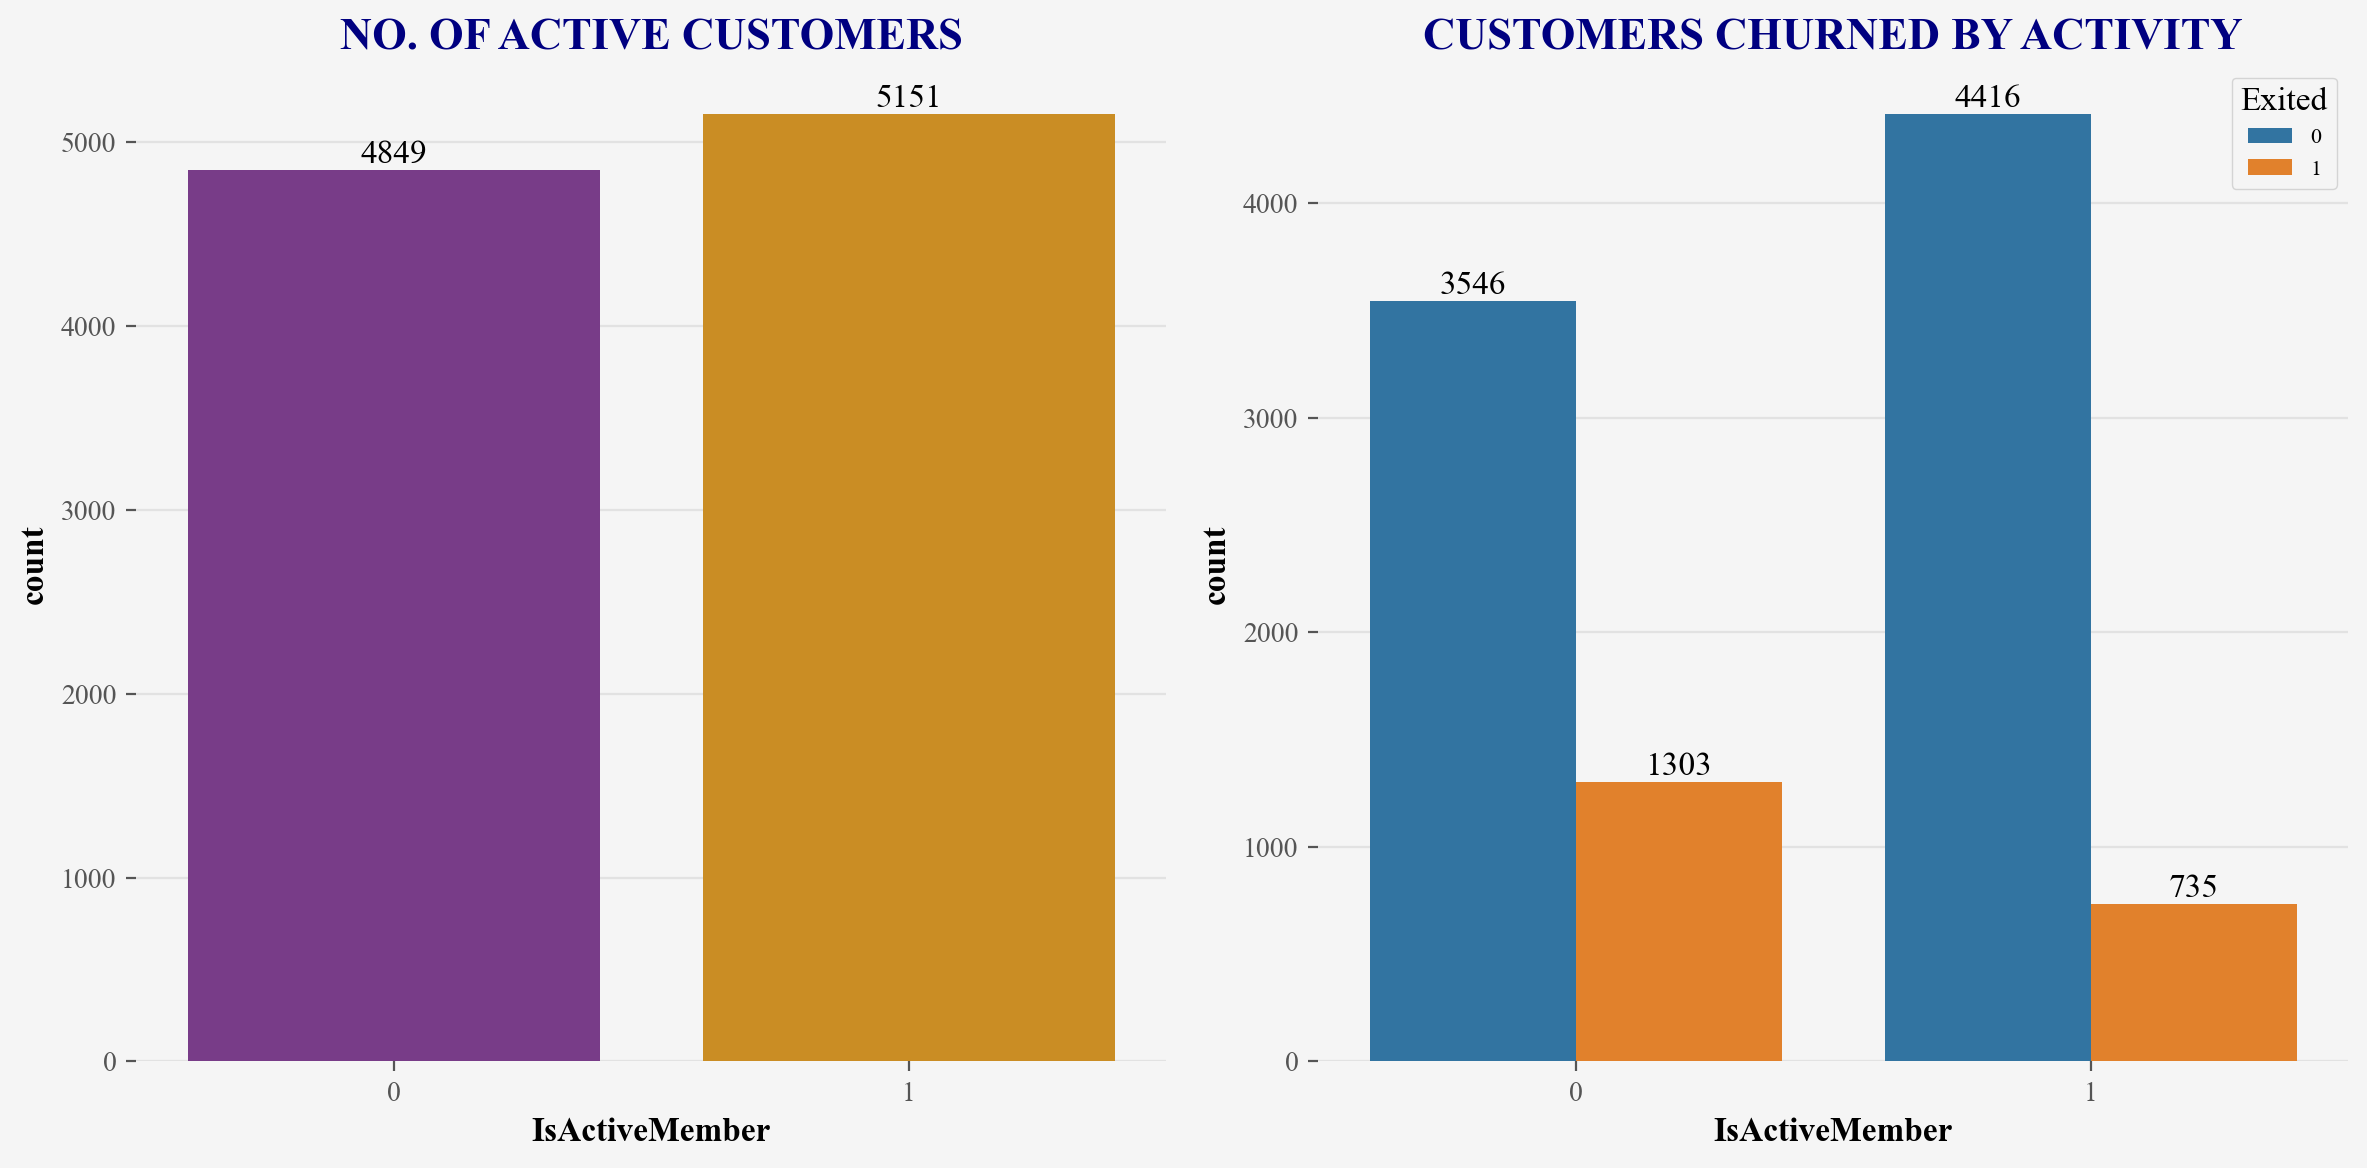

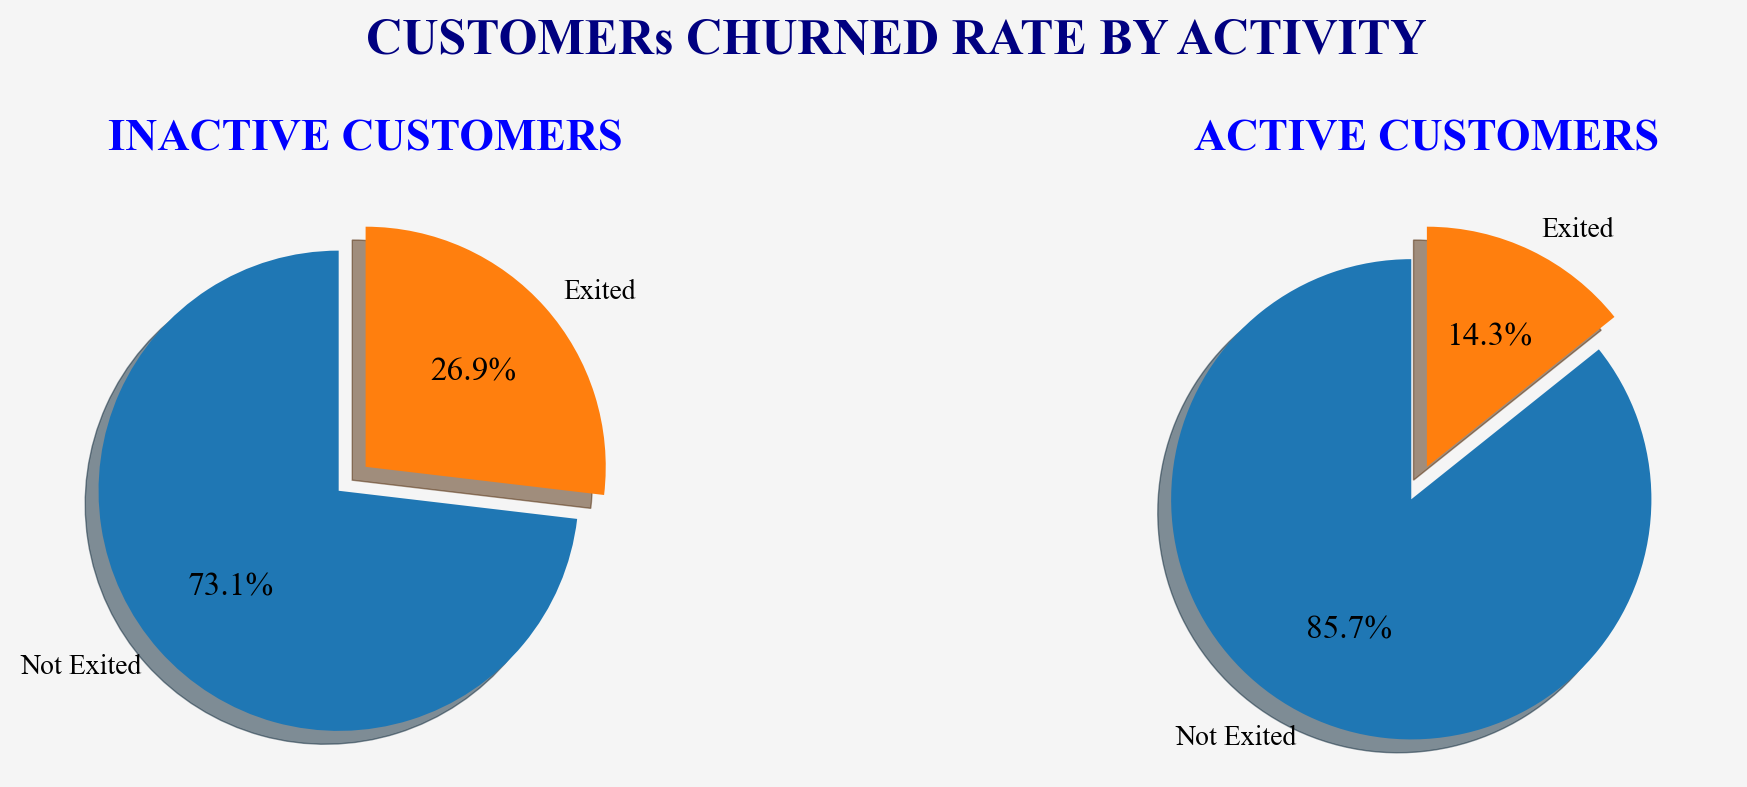

In [92]:
plt.figure(figsize = (12, 6), layout = 'tight')

plt.subplot(1,2,1)
ax1 = sns.countplot('IsActiveMember', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF ACTIVE CUSTOMERS')

plt.subplot(1,2,2)
ax2 = sns.countplot('IsActiveMember', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)

plt.title('CUSTOMERS CHURNED BY ACTIVITY')
plt.show()

#---------------------------------------------------------------------------------------------------------------------------

inactive_member_exited_data = data[data['IsActiveMember'] == 0]['Exited'].value_counts().sort_index()
active_member_exited_data = data[data['IsActiveMember'] == 1]['Exited'].value_counts().sort_index()


plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY ACTIVITY', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,2,1)
labels = ['Not Exited', 'Exited']

plt.pie(inactive_member_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title("INACTIVE CUSTOMERS", color = 'blue')

plt.subplot(1,2,2)
labels = ['Not Exited', 'Exited']

plt.pie(active_member_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('ACTIVE CUSTOMERS', color = 'blue')
plt.show()

- The no.of active and inactive customers are nearly same. 
- It is observed that inactive customers are more likely to leave the bank with churning rate of 27% than the active members.
- The churning rate of inactive customers is almost double that of active customers.

### Estimated Salary

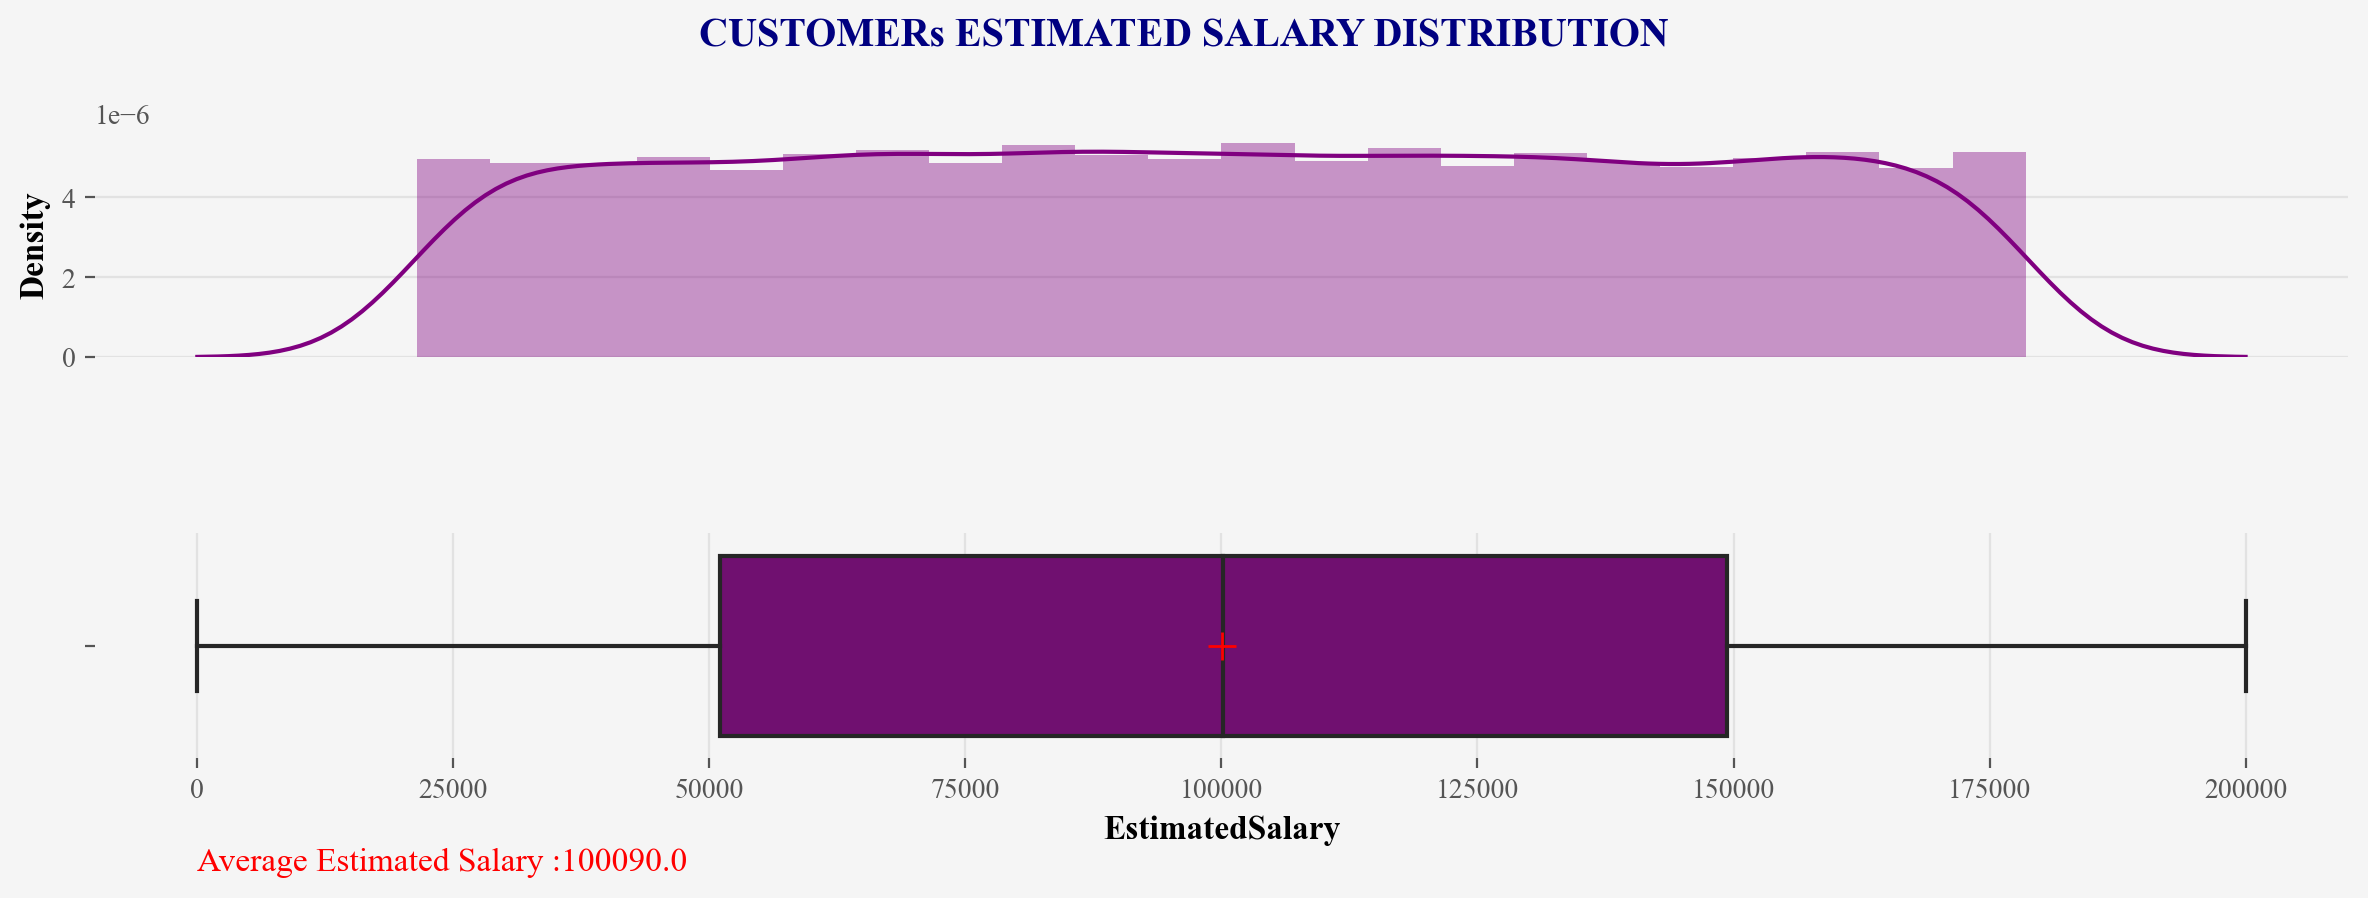

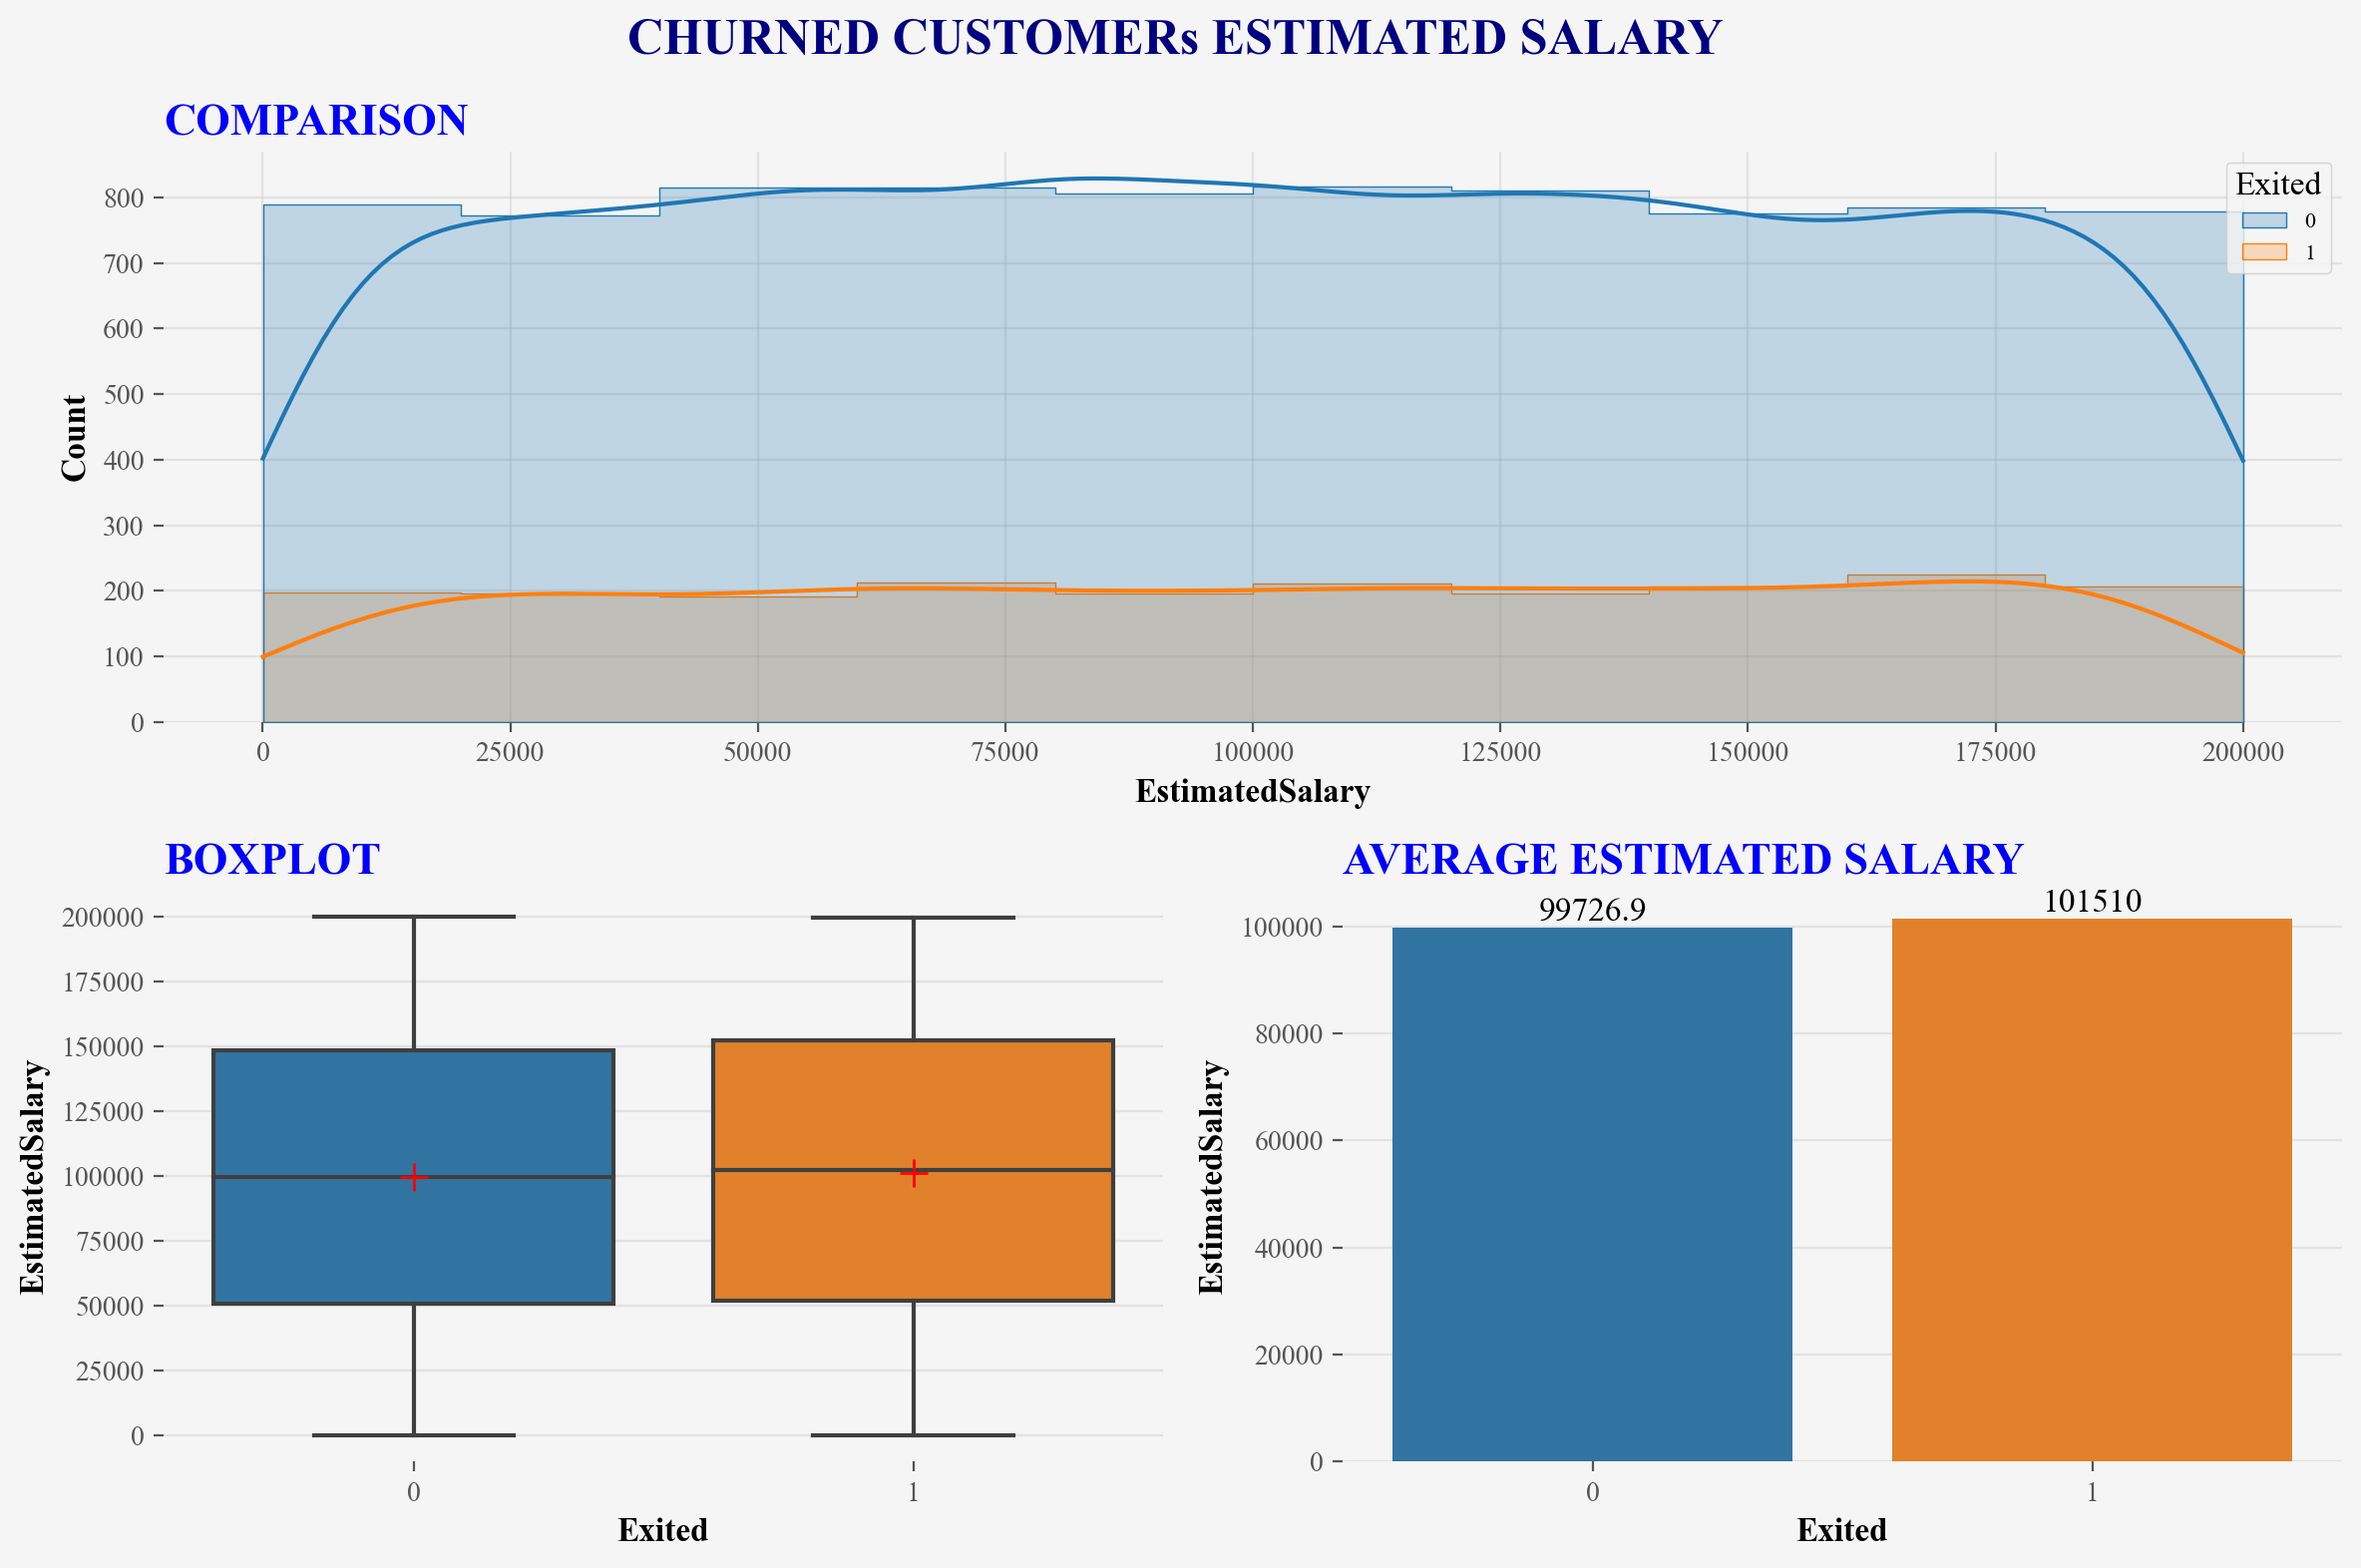

In [93]:
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CUSTOMERs ESTIMATED SALARY DISTRIBUTION', fontweight = 'bold', color = 'navy')

plt.subplot(3,1,1)
ax = sns.distplot(x = data['EstimatedSalary'], color = 'purple',)
plt.xlabel(None)
plt.xticks([])

plt.subplot(3,1,2)
avg_salary = data['EstimatedSalary'].mean().round()

sns.boxplot(x = 'EstimatedSalary', data = data, showmeans = True,  color = 'purple',
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.text(0, 1, f'Average Estimated Salary :{avg_salary}', color = 'red', )

plt.show()

#---------------------------------------------------------------------------------------------------------

plt.figure(figsize = (12, 8), layout = 'tight')
plt.suptitle('CHURNED CUSTOMERs ESTIMATED SALARY ', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(2,2,(1,2))
ax = sns.histplot(x = 'EstimatedSalary', data = data, hue = 'Exited', element = 'step', kde = True, bins = 10)
plt.title('COMPARISON', loc = 'left', color = 'blue')

plt.subplot(2,2,3)
sns.boxplot('Exited', 'EstimatedSalary', data = data, showmeans = True, 
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.title('BOXPLOT', loc = 'left', color = 'blue')

plt.subplot(2,2,4)
ax = sns.barplot( 'Exited', 'EstimatedSalary',data = data, ci = None)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('AVERAGE ESTIMATED SALARY', loc = 'left', color = 'blue')

plt.show()

- Estimated salary is normally distributed throughout the data and the average estimated salary is 100,090.
- There is no effect of churning rate on estimated salary as the average salaries of both exited and not exited customers is almost same.

### Complain

In [94]:
data.Complain.unique()

array([1, 0], dtype=int64)

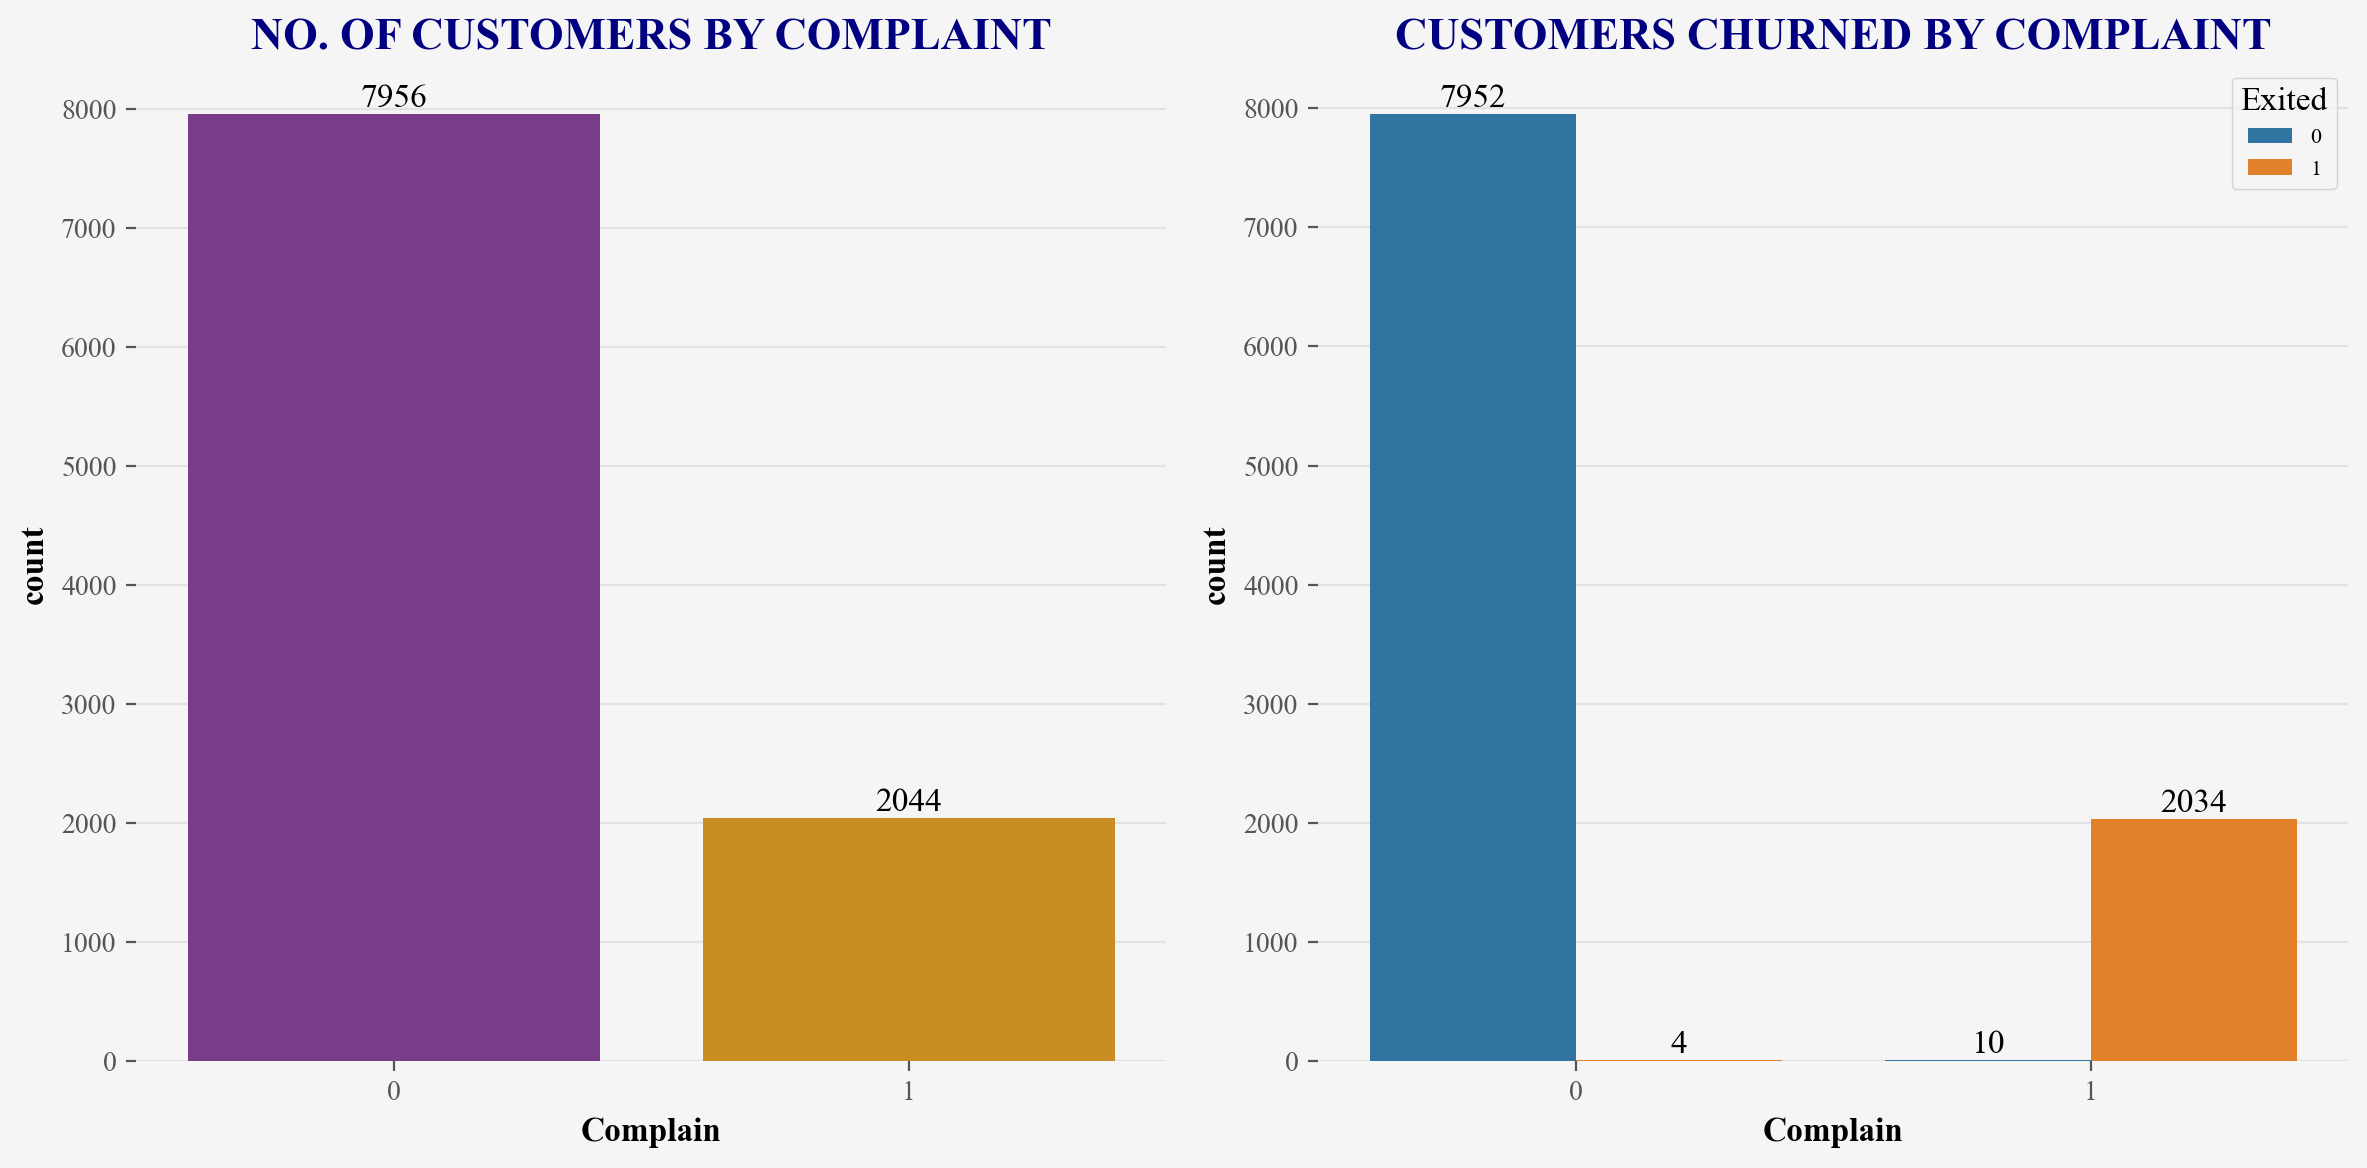

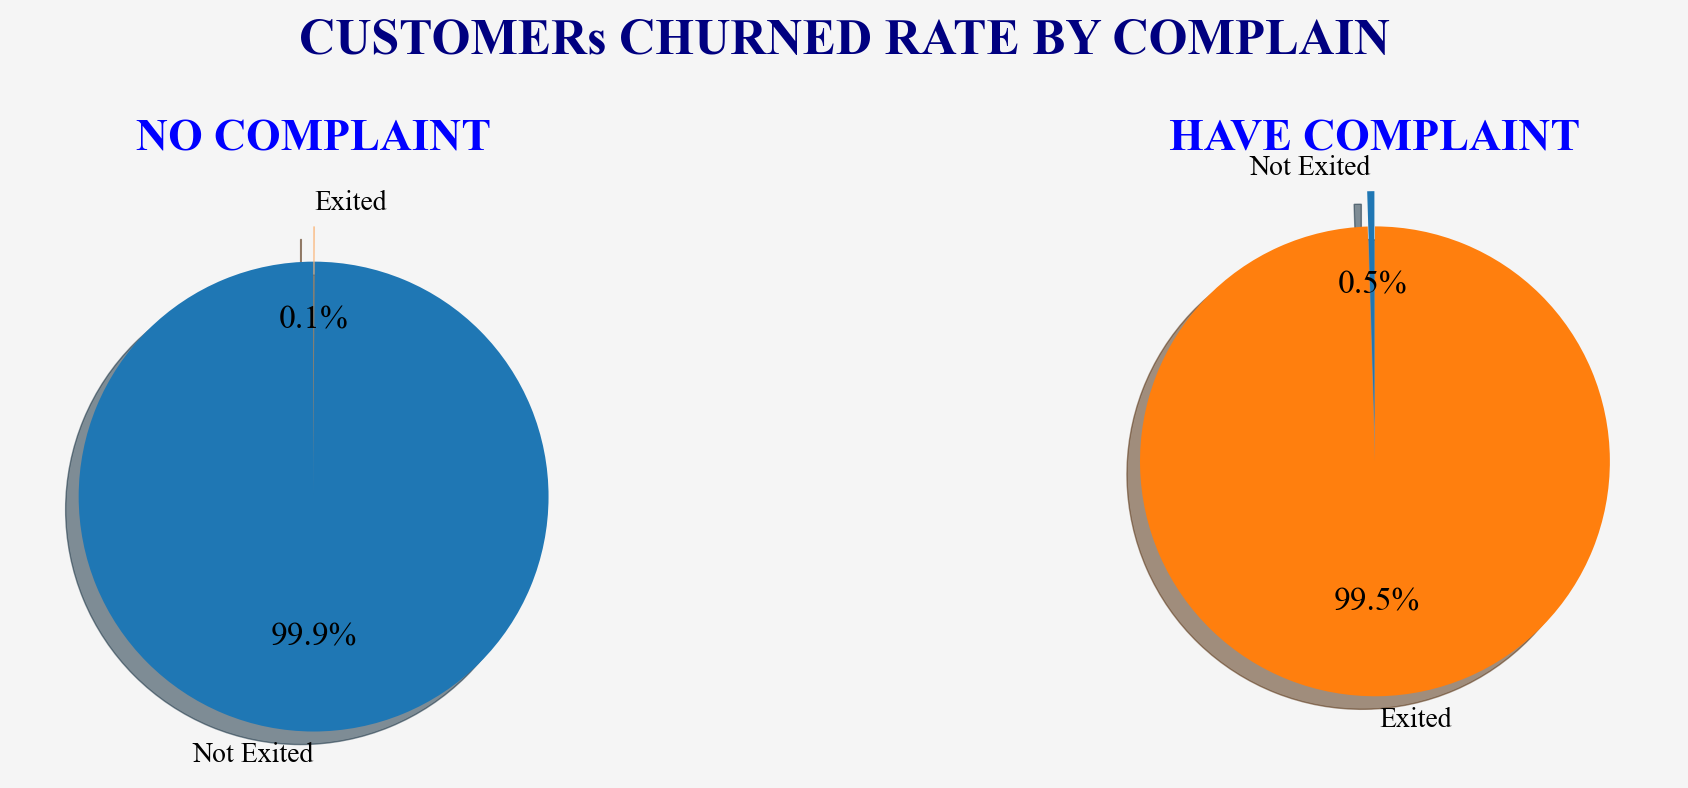

In [95]:
plt.figure(figsize = (12, 6), layout = 'tight')

plt.subplot(1,2,1)
ax1 = sns.countplot('Complain', data = data, palette = 'CMRmap')

for i in ax1.containers:
    ax1.bar_label(i)
plt.title('NO. OF CUSTOMERS BY COMPLAINT')

plt.subplot(1,2,2)
ax2 = sns.countplot('Complain', hue = 'Exited', data = data)

for i in ax2.containers:
    ax2.bar_label(i)

plt.title('CUSTOMERS CHURNED BY COMPLAINT')
plt.show()

#---------------------------------------------------------------------------------------------------------------------------

no_complain_exited_data = data[data['Complain'] == 0]['Exited'].value_counts().sort_index()
complain_exited_data = data[data['Complain'] == 1]['Exited'].value_counts().sort_index()

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY COMPLAIN', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,2,1)
labels = ['Not Exited', 'Exited']

plt.pie(no_complain_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title("NO COMPLAINT", color = 'blue')

plt.subplot(1,2,2)
labels = ['Not Exited', 'Exited']

plt.pie(complain_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('HAVE COMPLAINT', color = 'blue')
plt.show()

- Out of all customers around 1/4th customers have the complaint about the bank services and 99.5% of customers facing issues with the bank have left the bank.
- The bank needs to put some extra efforts to resolve the customers compaints in order to prevent them from quitting their bank account.


### Satisfaction Score

In [96]:
data['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

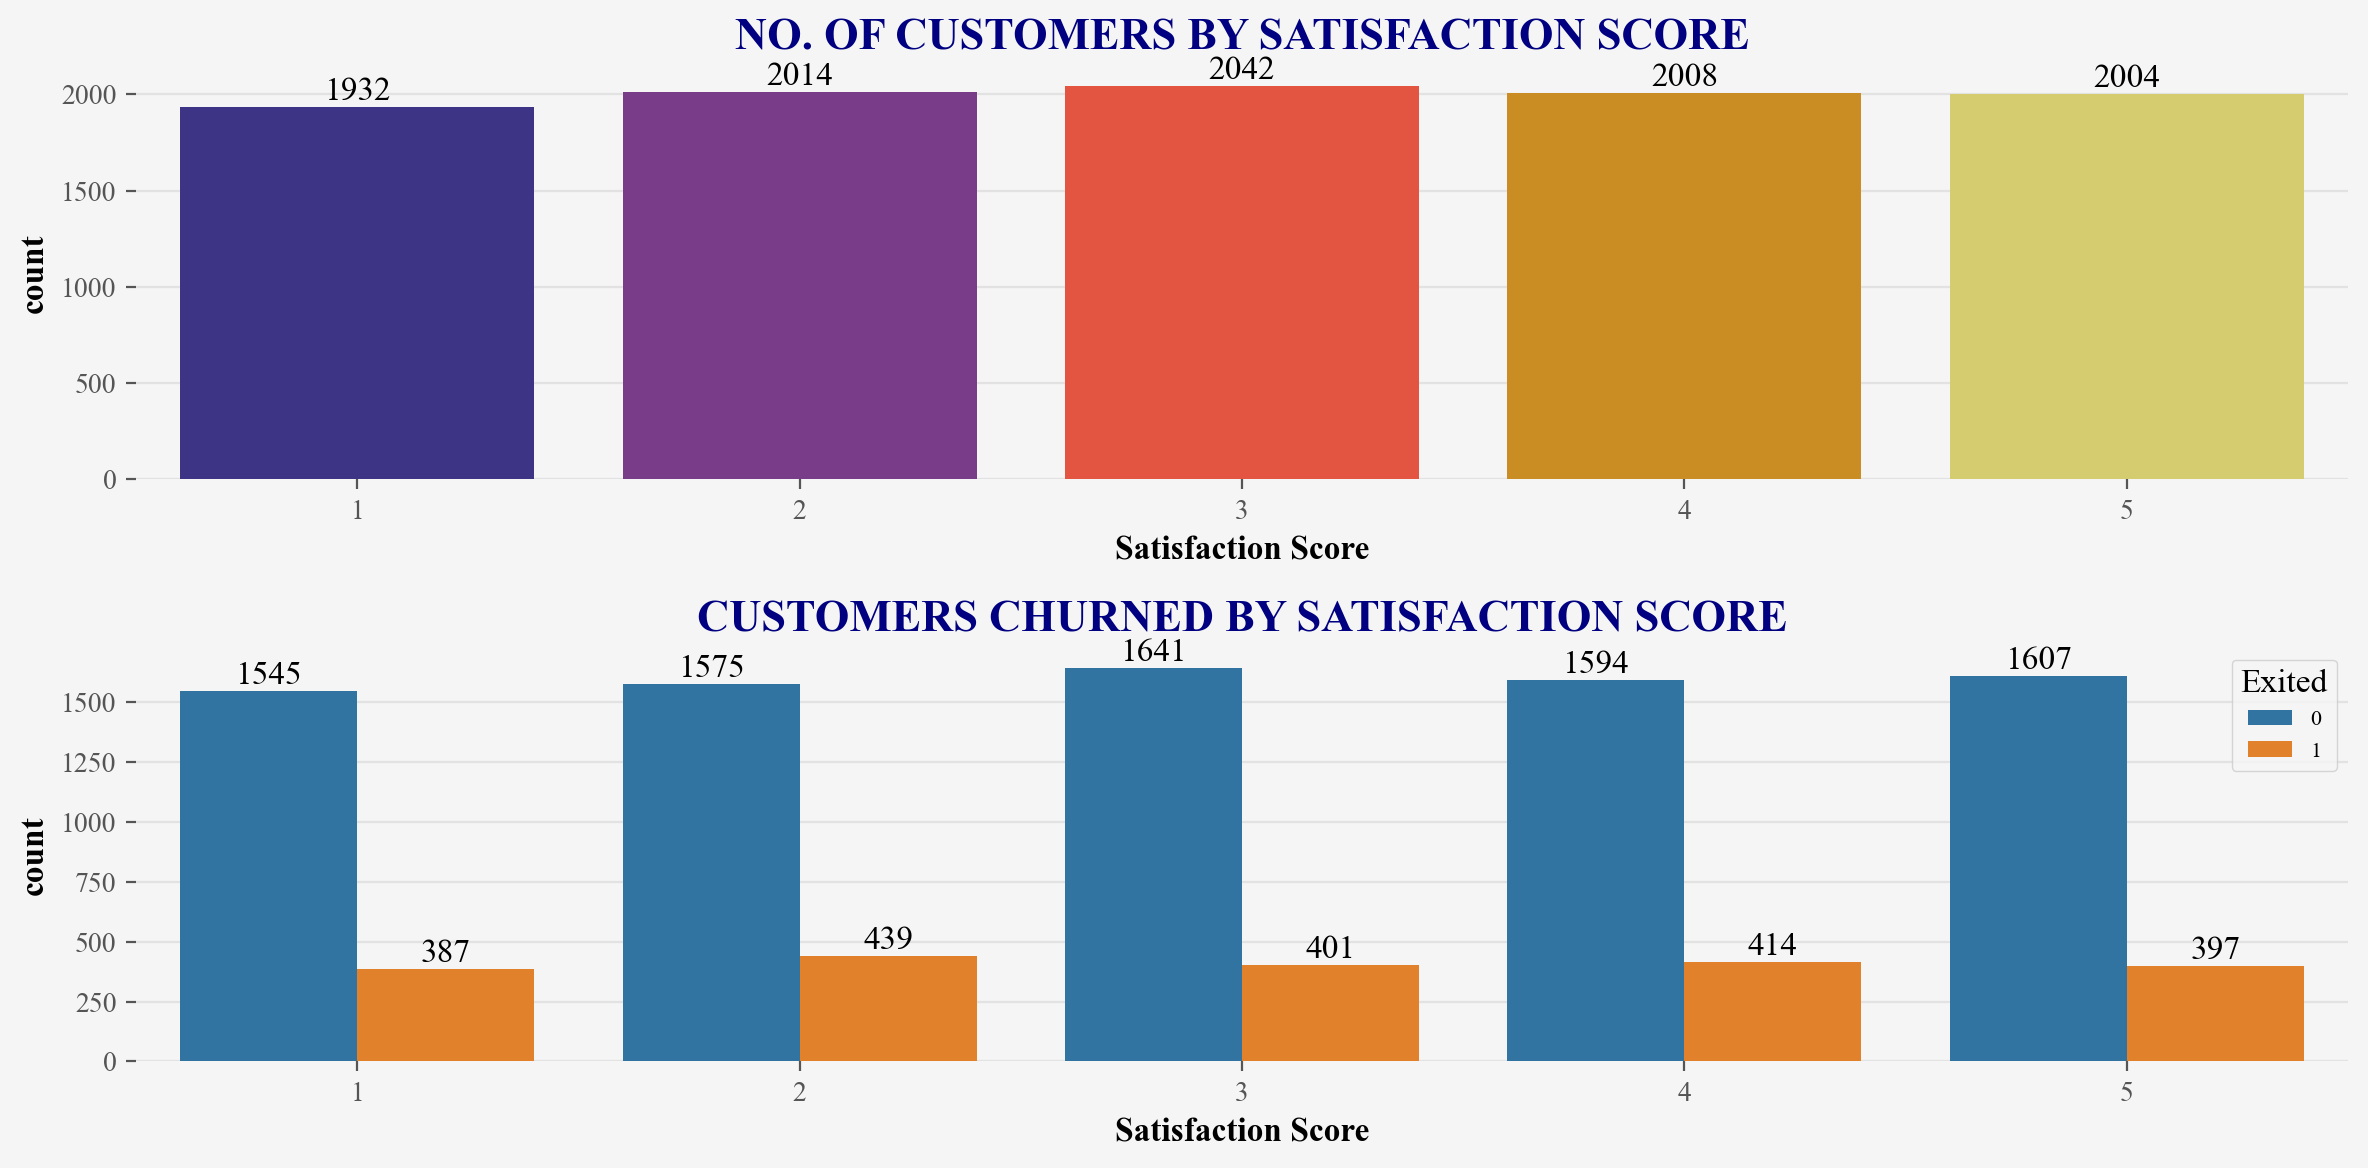

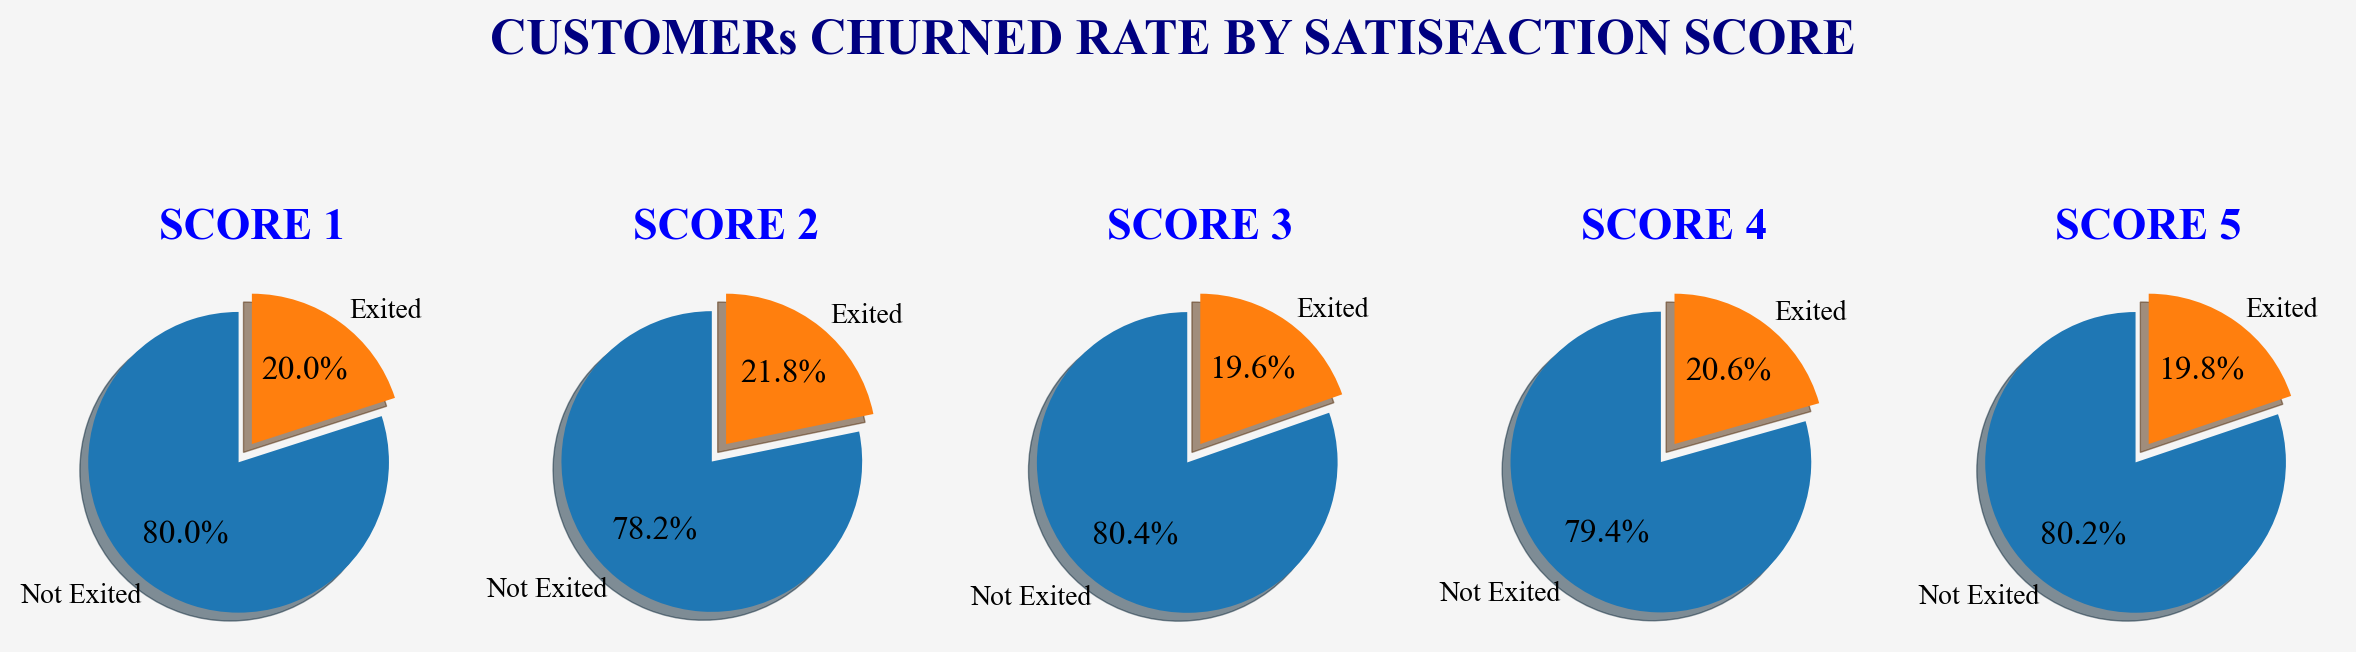

In [97]:
plt.figure(figsize = (12, 6), layout = 'tight')
plt.subplot(2,1,1)
ax = sns.countplot('Satisfaction Score', data = data, palette = 'CMRmap')
for i in ax.containers:
    ax.bar_label(i)
plt.title('NO. OF CUSTOMERS BY SATISFACTION SCORE')
    
plt.subplot(2,1,2)
ax = sns.countplot('Satisfaction Score', hue = 'Exited', data = data,)
for i in ax.containers:
    ax.bar_label(i)
plt.title('CUSTOMERS CHURNED BY SATISFACTION SCORE')
plt.show()    

#---------------------------------------------------------------------------------------------

score1_exited_data = data[data['Satisfaction Score'] == 1]['Exited'].value_counts().sort_index()
score2_exited_data = data[data['Satisfaction Score'] == 2]['Exited'].value_counts().sort_index()
score3_exited_data = data[data['Satisfaction Score'] == 3]['Exited'].value_counts().sort_index()
score4_exited_data = data[data['Satisfaction Score'] == 4]['Exited'].value_counts().sort_index()
score5_exited_data = data[data['Satisfaction Score'] == 5]['Exited'].value_counts().sort_index()

labels = ['Not Exited', 'Exited']

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY SATISFACTION SCORE', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,5,1)
plt.pie(score1_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SCORE 1', color = 'blue')

plt.subplot(1,5,2)
plt.pie(score2_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SCORE 2', color = 'blue')

plt.subplot(1,5,3)
plt.pie(score3_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SCORE 3', color = 'blue')

plt.subplot(1,5,4)
plt.pie(score4_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SCORE 4', color = 'blue')

plt.subplot(1,5,5)
plt.pie(score5_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SCORE 5', color = 'blue')
plt.show()


- The no. of customers per satisfaction score are approximately equal and there is not any huge differnce in churning rate of customers with respect to satisfaction score.

### Card Type

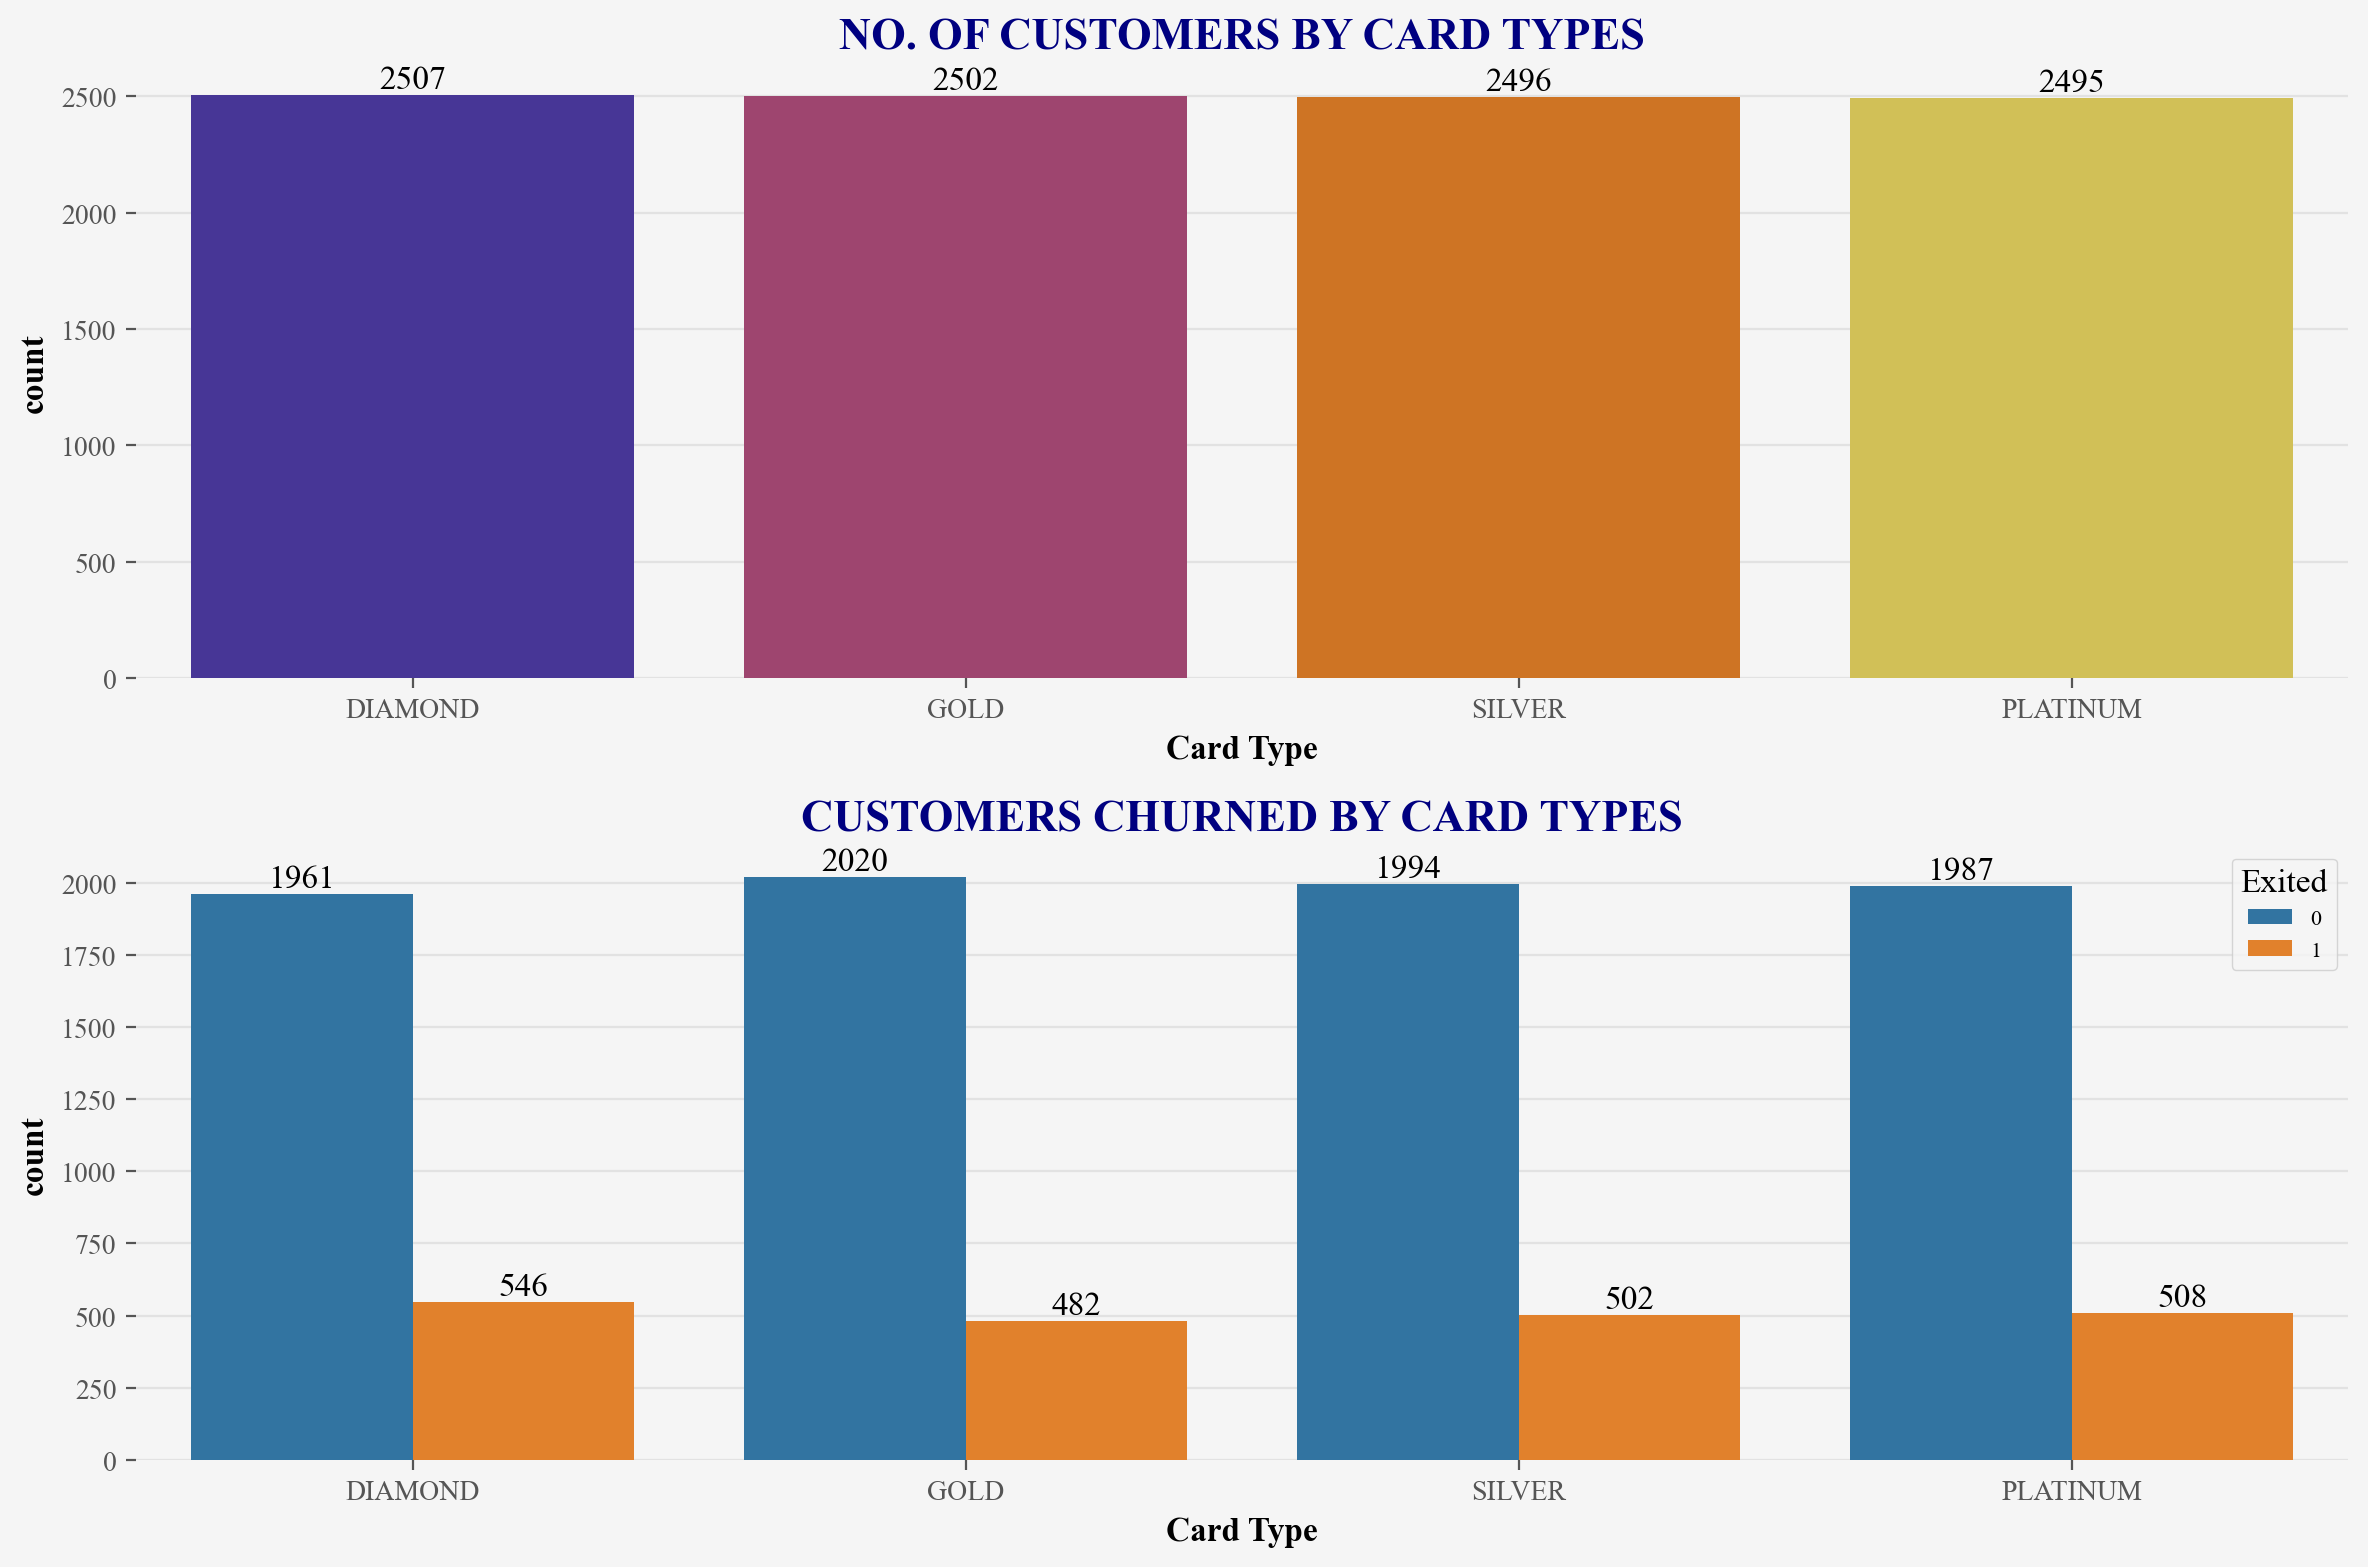

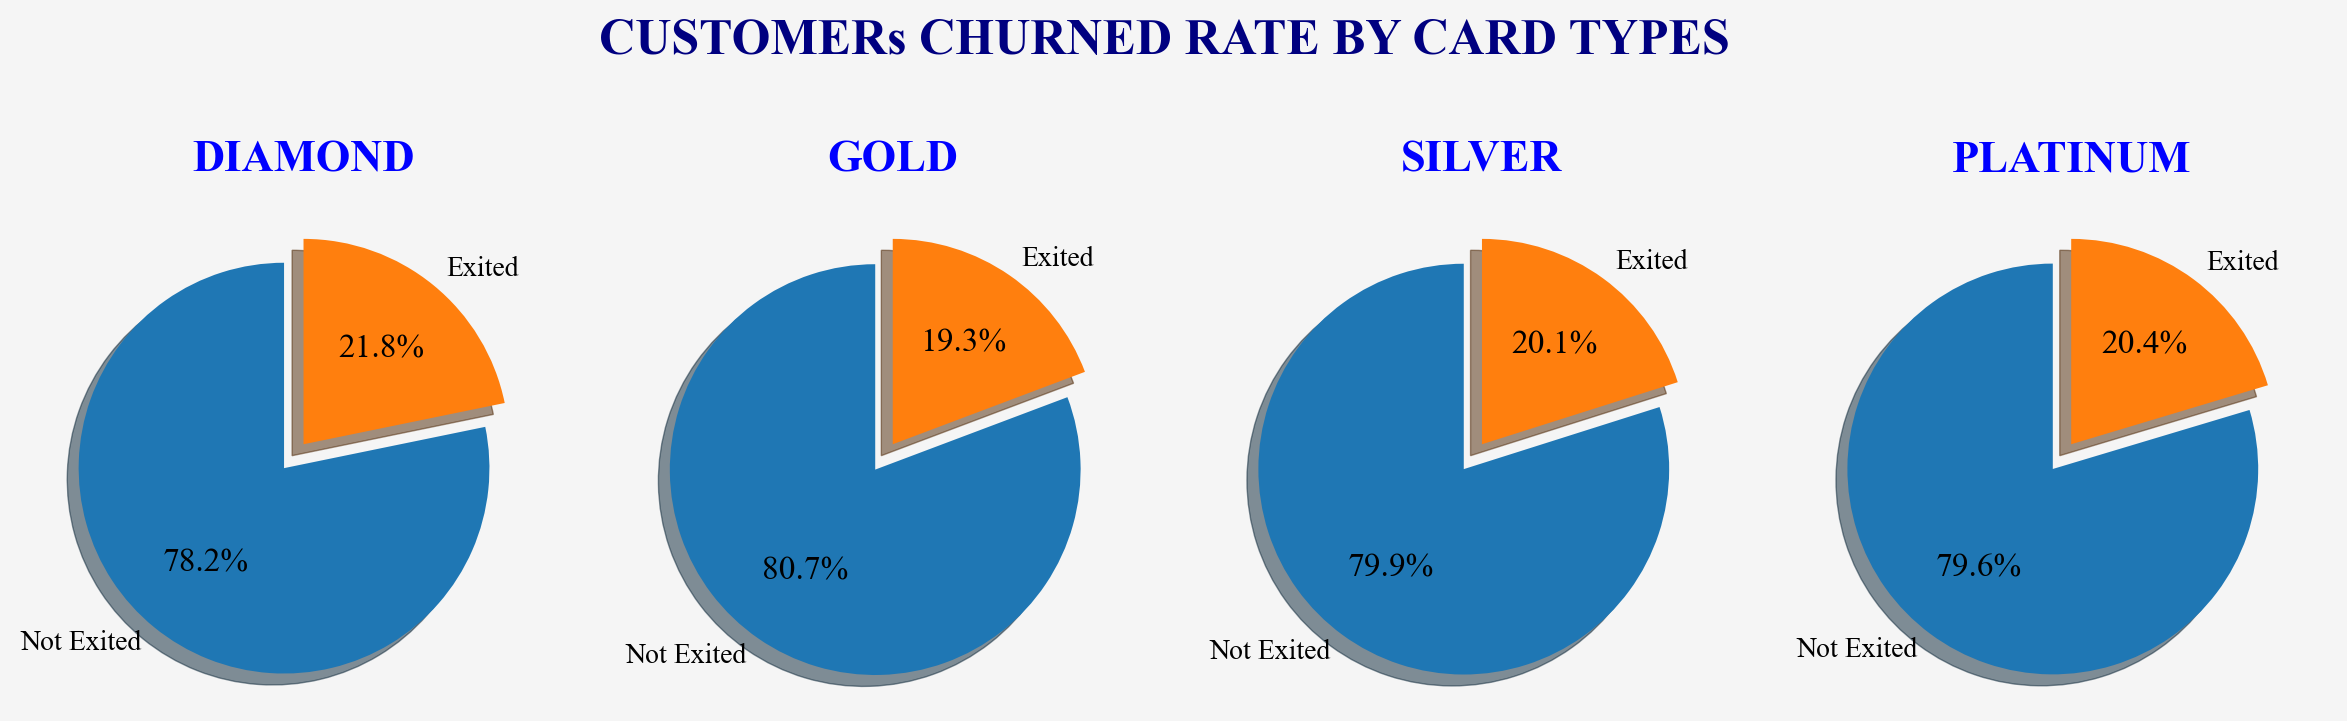

In [98]:
plt.figure(figsize = (12, 8), layout = 'tight')

plt.subplot(2,1,1)
ax = sns.countplot('Card Type', data = data, palette = 'CMRmap')
for i in ax.containers:
    ax.bar_label(i)
plt.title('NO. OF CUSTOMERS BY CARD TYPES')
    
plt.subplot(2,1,2)
ax = sns.countplot('Card Type', hue = 'Exited', data = data,)
for i in ax.containers:
    ax.bar_label(i)
plt.title('CUSTOMERS CHURNED BY CARD TYPES')
plt.show()    

#---------------------------------------------------------------------------------------------

diamond_card_exited_data = data[data['Card Type'] == 'DIAMOND']['Exited'].value_counts().sort_index()
gold_card_exited_data = data[data['Card Type'] == 'GOLD']['Exited'].value_counts().sort_index()
silver_card_exited_data = data[data['Card Type'] == 'SILVER']['Exited'].value_counts().sort_index()
platinum_card_exited_data = data[data['Card Type'] == 'PLATINUM']['Exited'].value_counts().sort_index()

labels = ['Not Exited', 'Exited']

plt.figure(figsize = (12, 4), layout = 'tight')
plt.suptitle('CUSTOMERs CHURNED RATE BY CARD TYPES', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(1,4,1)
plt.pie(diamond_card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('DIAMOND', color = 'blue')

plt.subplot(1,4,2)
plt.pie(gold_card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('GOLD', color = 'blue')

plt.subplot(1,4,3)
plt.pie(silver_card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('SILVER', color = 'blue')

plt.subplot(1,4,4)
plt.pie(platinum_card_exited_data, labels = labels, explode = [0.15, 0], autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('PLATINUM', color = 'blue')

plt.show()


- The no. of customers per card are almost equal and the churned rate of customers with different kind of cards is also approximately equal.
- There is not that much effect of card type on customer's churnednrate

### Point Earned

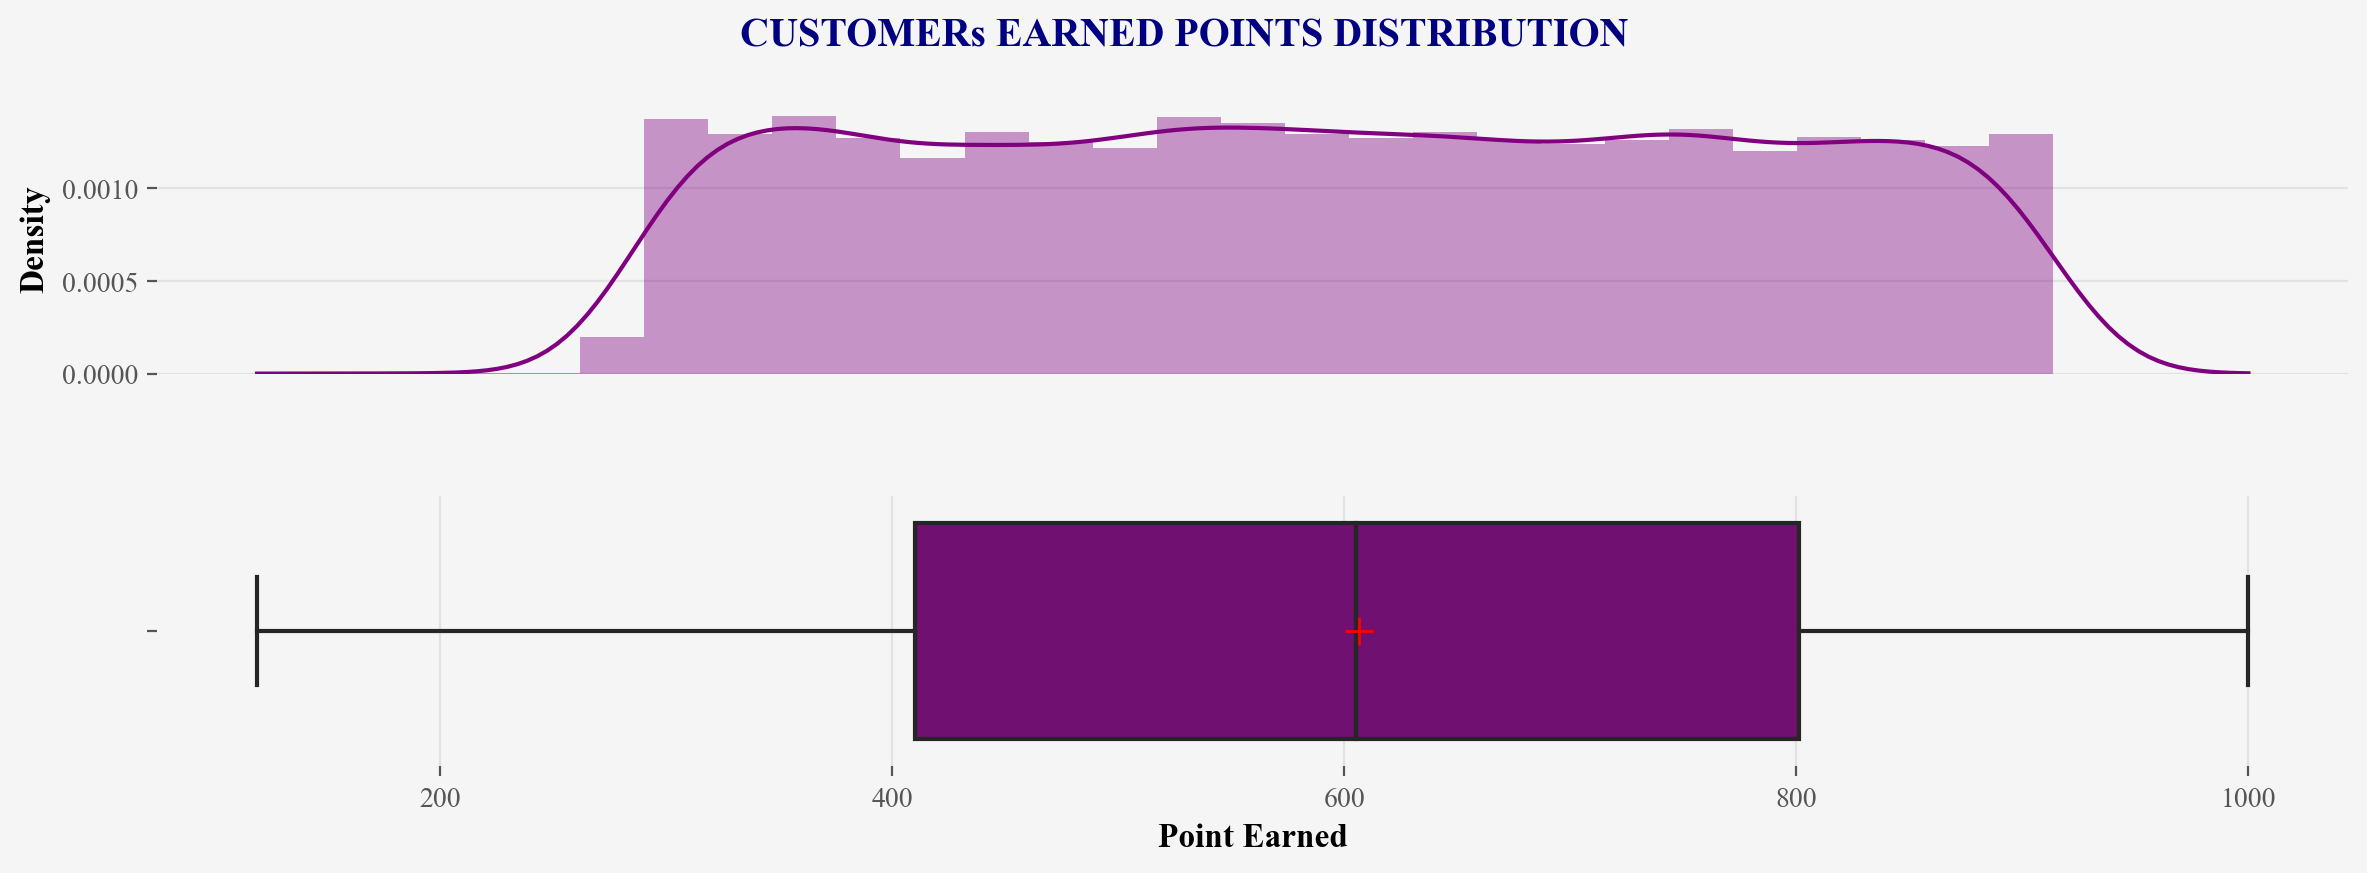

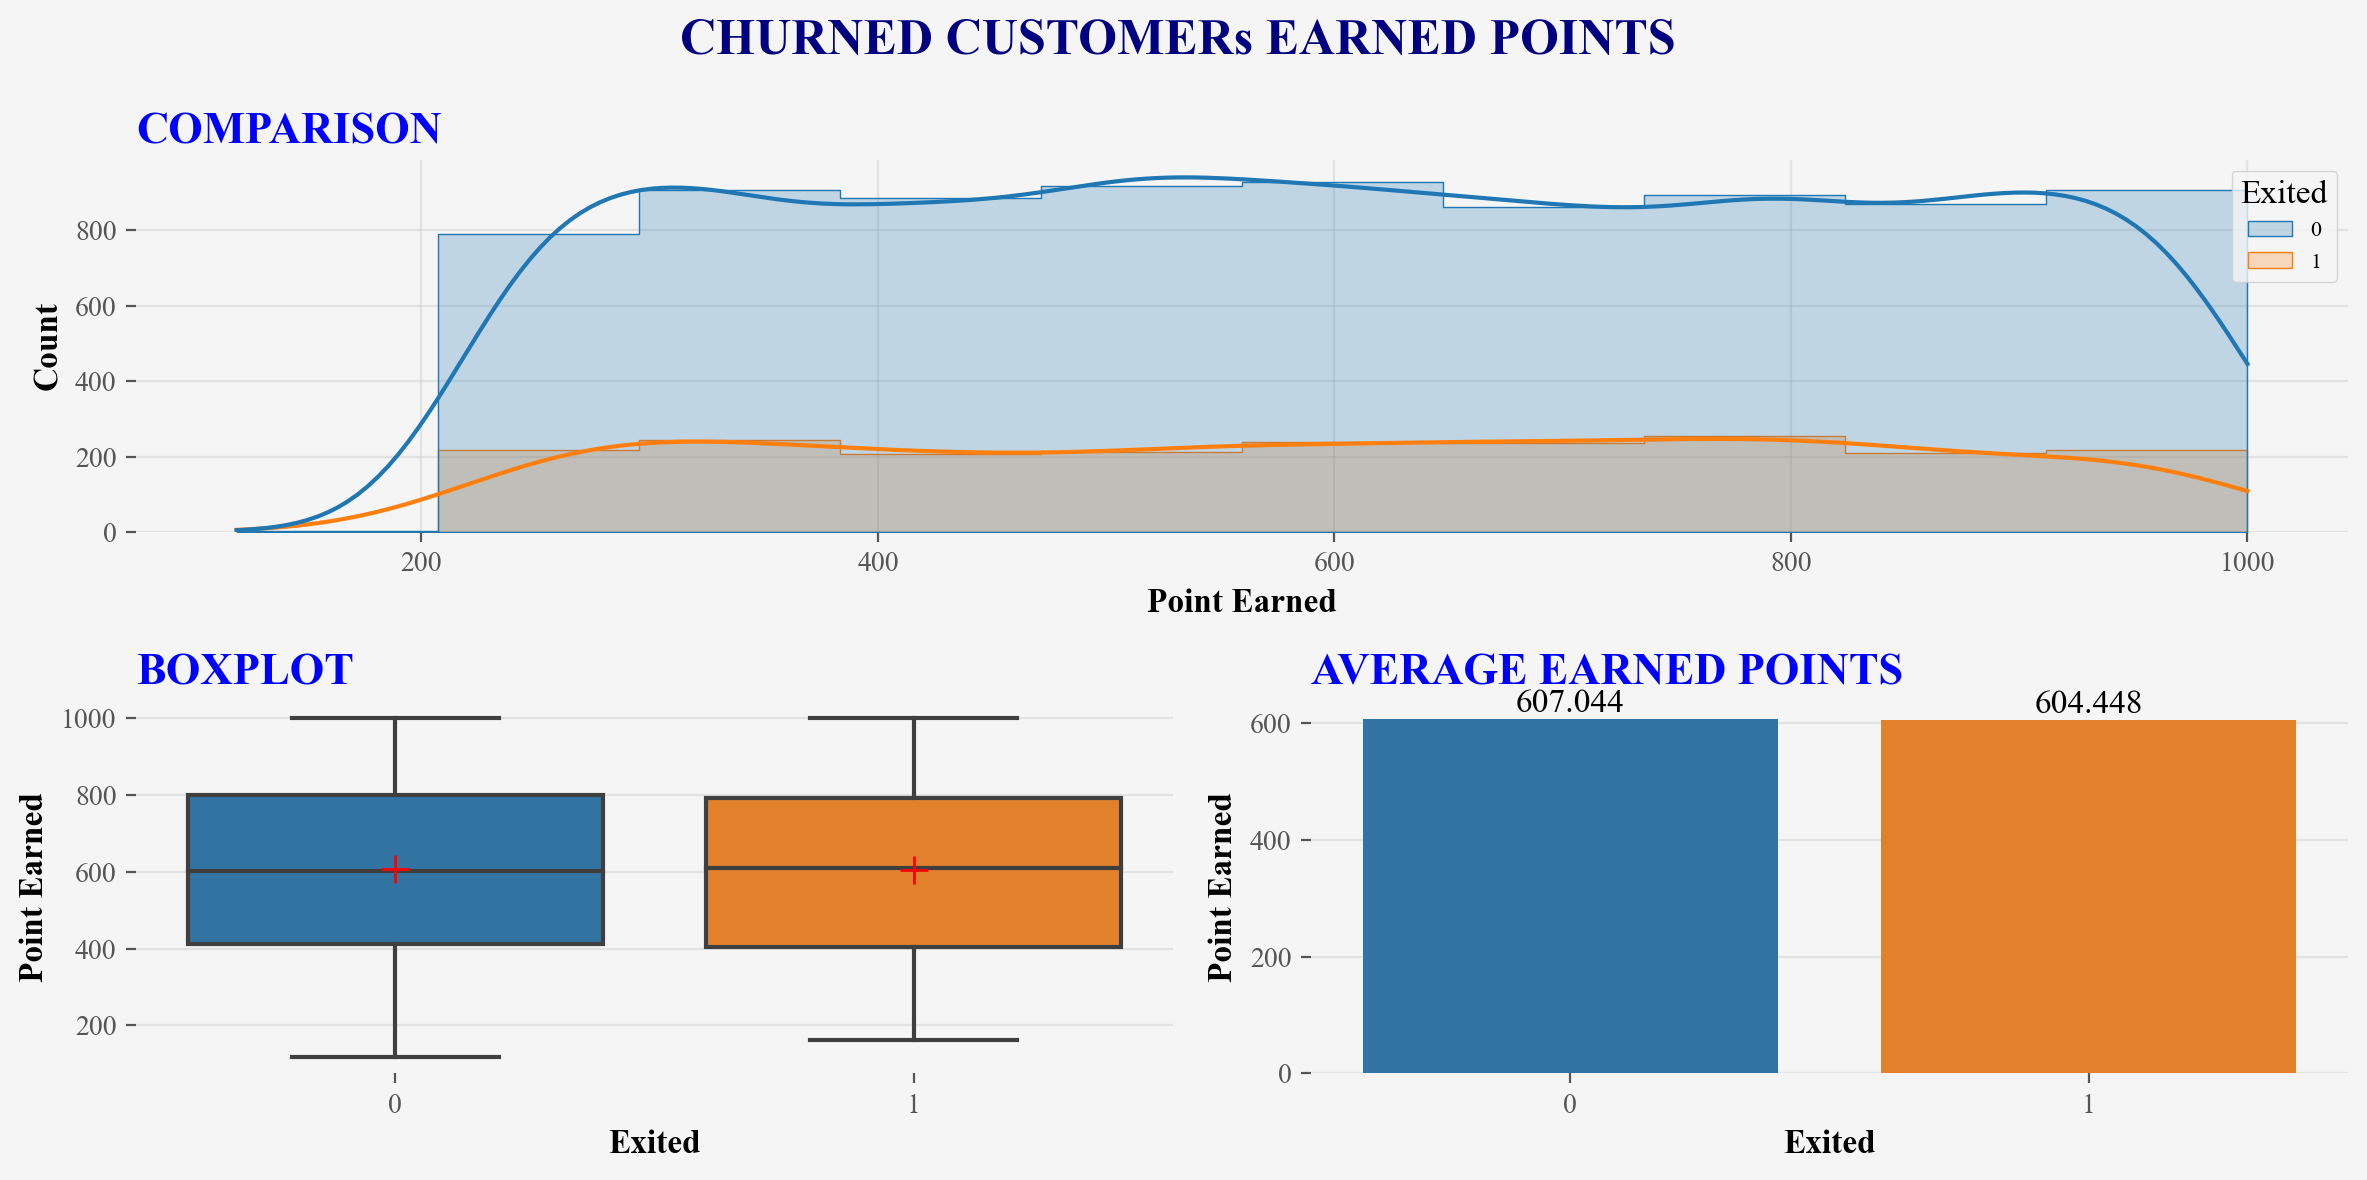

In [99]:
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CUSTOMERs EARNED POINTS DISTRIBUTION', fontweight = 'bold', color = 'navy')

plt.subplot(3,1,1)
ax = sns.distplot(x = data['Point Earned'], color = 'purple',)
plt.xlabel(None)
plt.xticks([])

plt.subplot(3,1,2)
avg_earned_point = data['Point Earned'].mean().round()

sns.boxplot(x = 'Point Earned', data = data, showmeans = True,  color = 'purple',
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})

plt.show()

#---------------------------------------------------------------------------------------------------------

plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CHURNED CUSTOMERs EARNED POINTS ', fontweight = 'bold', fontsize = 18, color = 'navy')

plt.subplot(2,2,(1,2))
ax = sns.histplot(x = 'Point Earned', data = data, hue = 'Exited', element = 'step', kde = True, bins = 10)
plt.title('COMPARISON', loc = 'left', color = 'blue')

plt.subplot(2,2,3)
sns.boxplot('Exited', 'Point Earned', data = data, showmeans = True, 
           meanprops = {'marker' : '+', 'markeredgecolor' : 'red', 'markersize' : 10,})
plt.title('BOXPLOT', loc = 'left', color = 'blue')

plt.subplot(2,2,4)
ax = sns.barplot( 'Exited', 'Point Earned',data = data, ci = None, )
for i in ax.containers:
    ax.bar_label(i)
    plt.title('AVERAGE EARNED POINTS', loc = 'left', color = 'blue')

plt.show()

- The Point Earned variable is normally distributed throughout the data and for the churned customers there is no effect of Earned points. 
- The average of earned points is also same for churned and not churned customers.

In [21]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

## Creating Dependent and Independent Features Datasets

In [138]:
data['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [118]:
# Dropping unwanted columns
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
Y = data['Exited']

In [119]:
# Encoding Categorical columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cols = ['Geography', 'Gender', 'Card Type']
X[cols] = encoder.fit_transform(X[cols])

In [121]:
Y = np.array(Y).reshape(-1, 1)

In [122]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [123]:
print('Training Data Shape  : ', x_train.shape)
print('Training Label Shape : ', y_train.shape)
print('Testing Data Shape   : ', x_test.shape)
print('Testing Label Shape  : ', y_test.shape)

Training Data Shape  :  (8000, 14)
Training Label Shape :  (8000, 1)
Testing Data Shape   :  (2000, 14)
Testing Label Shape  :  (2000, 1)


In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

# Code for plotting Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="whitesmoke" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression
- Starting with the Logistic Regression algorithm for the classification of churned customers.

Training Accuracy :  0.7865
Testing Accuracy  :  0.7985
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization


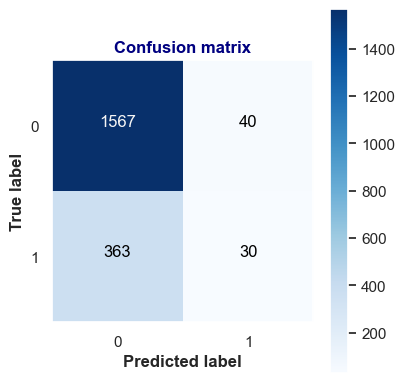

In [150]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

lr_pred_train = lr_classifier.predict(x_train)
lr_pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, lr_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, lr_pred_test))
print('-'*100)

print(classification_report(y_test, lr_pred_test))
print('-'*100)

cm = confusion_matrix(y_test, lr_pred_test)
plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

The logistic regression model performed pretty good on the data but there is still need of improvement in accuracy score and precision to classify the data correctly.

- Let's try the decision tree classification algorithm and see if the accuracy increases or not.
## Decision Tree 

Training Accuracy :  1.0
Testing Accuracy  :  0.998
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization


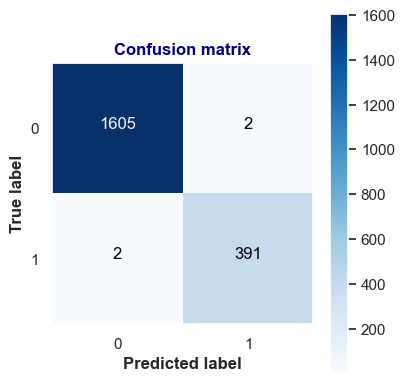

In [156]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 100, random_state = 15)
dt_classifier.fit(x_train, y_train)

dt_pred_train = dt_classifier.predict(x_train)
dt_pred_test = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, dt_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, dt_pred_test))
print('-'*100)

print(classification_report(y_test, dt_pred_test))
print('-'*100)

cm = confusion_matrix(y_test, dt_pred_test)
plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

- Decision tree classifier is giving very good accuracy and the precision score is also good as compare to logistic regression.
- This model can be used as the final model for prediction.


## Random Forest Classifier
Although the decision tree classifier giving very good results, let us also try using random forest classifier


Training Accuracy :  1.0
Testing Accuracy  :  0.999
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization


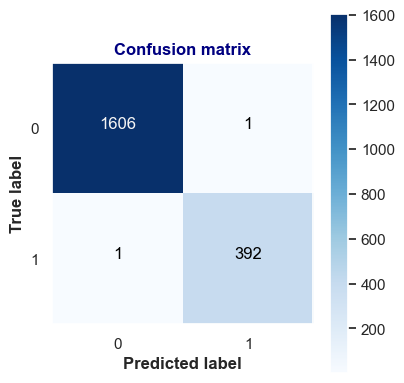

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 150, max_depth = 50)
rf_classifier.fit(x_train, y_train)

rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, rf_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, rf_pred_test))
print('-'*100)

print(classification_report(y_test, rf_pred_test))
print('-'*100)

cm = confusion_matrix(y_test, rf_pred_test)
plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

- The resultsfor random forest are pretty much similar to decision tree. So any of the model can be used for prediction.

## XGBoost Classifier
- Let's check the accuracy with the boosting algorithm 


Training Accuracy :  1.0
Testing Accuracy  :  0.999
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

----------------------------------------------------------------------------------------------------
Confusion matrix, without normalization


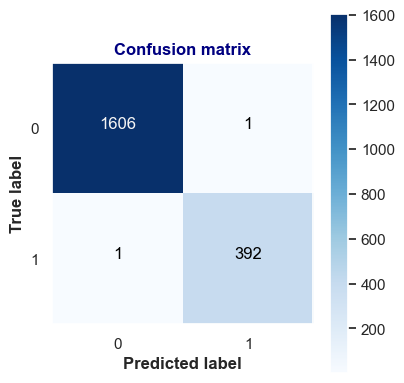

In [158]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 250, max_depth = 150, random_state = 42)
xg_classifier.fit(x_train, y_train)

xg_pred_train = xg_classifier.predict(x_train)
xg_pred_test = xg_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, xg_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, xg_pred_test))
print('-'*100)

print(classification_report(y_test, xg_pred_test))
print('-'*100)

cm = confusion_matrix(y_test, xg_pred_test)

plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

- The results are same for random forest and xgboost classifier. So it can  also be used for prediction.